# Lead Score Case Study

## Table of Content

### 🎧Data understanding
- Importing various libraries
- Read the data
- Analyze the shape
- Analyze the data type

### ✂Data Cleaning and Manipulation
- Check for null value
- Check for null percentage if required
- Deal with null values.
  - Either drop the columns or impute the missing value.

### 🛒Structuring
- Check for number of unique value in each column
- Clubbing the columns in similar bucket depending on its nature
  - Categorical
  - Continuous 
  
### 🔧Data analysis
- Performed univariate and Bivariate analysis on variables.
- Heatmap for Pearson's Correlation Coefficent.

### ⚙ Preparing the data for Modelling
- Preparing data for the model
- Converting the non binary categorical variable to dummy variable
- Scaling the continuous variables.
  - Used StandardScaler
- Spliting the data into train and test in the ratio 7:3

### Model Building
- Building Model using Logistic Regression
- Dropping feature manually depanding on p-value and VIF


### Finding Optimul Cut off value of the Probability 
- Using ROC and Recall Precision Trade off

### Prediction and Evalution on Test data
- All preprocessing on the test data same as train data
- Focusing on the Sensitivity as we are benefited by it's higher value

### Mapping the "Hot Leads " with the Lead Number

### Step 1: Data Loading

In [1]:
# Importing the libraries for reading the data and for calculation
import pandas as pd
import numpy as np

# Importing the libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the libray for ignoring the warnings
import warnings
warnings.filterwarnings(action = "ignore")

In [2]:
# Load the dataset

df = pd.read_csv("Leads.csv")
df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [3]:
# Check the shape of the data frame

df.shape

(9240, 37)

In [4]:
# Inspect the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
# Checking the statistics of the data frame

df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [6]:
# Reading the Data Dictionary for better understanding

dfdic = pd.read_excel("Leads Data Dictionary.xlsx",usecols =[1,2],header =[2],index_col = [0])
for i in dfdic.index:
    print(i,"-",dfdic.loc[i][0])
    print()

Prospect ID - A unique ID with which the customer is identified.

Lead Number - A lead number assigned to each lead procured.

Lead Origin - The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc.

Lead Source - The source of the lead. Includes Google, Organic Search, Olark Chat, etc.

Do Not Email - An indicator variable selected by the customer wherein they select whether of not they want to be emailed about the course or not.

Do Not Call - An indicator variable selected by the customer wherein they select whether of not they want to be called about the course or not.

Converted - The target variable. Indicates whether a lead has been successfully converted or not.

TotalVisits - The total number of visits made by the customer on the website.

Total Time Spent on Website - The total time spent by the customer on the website.

Page Views Per Visit - Average number of pages on the website viewed during the visits.

Last Ac

There are few alteration in the name of features name in df and  dfdic so we will make it similar for smooth  understanding, so just renaming the features in dfdic

In [7]:
# Renaming the feature in dfdic

dfdic.rename({"What matters most to you in choosing this course":"What matters most to you in choosing a course"},inplace=True)
dfdic.rename({"a free copy of Mastering The Interview":"A free copy of Mastering The Interview"},inplace=True)

## Pre-Structuring

In [8]:
# Checking the category in each column for Structuring

for i in df.columns:
    print(i ," ", df[i].nunique() ," ",df[i].dtype)

Prospect ID   9240   object
Lead Number   9240   int64
Lead Origin   5   object
Lead Source   21   object
Do Not Email   2   object
Do Not Call   2   object
Converted   2   int64
TotalVisits   41   float64
Total Time Spent on Website   1731   int64
Page Views Per Visit   114   float64
Last Activity   17   object
Country   38   object
Specialization   19   object
How did you hear about X Education   10   object
What is your current occupation   6   object
What matters most to you in choosing a course   3   object
Search   2   object
Magazine   1   object
Newspaper Article   2   object
X Education Forums   2   object
Newspaper   2   object
Digital Advertisement   2   object
Through Recommendations   2   object
Receive More Updates About Our Courses   1   object
Tags   26   object
Lead Quality   5   object
Update me on Supply Chain Content   1   object
Get updates on DM Content   1   object
Lead Profile   6   object
City   7   object
Asymmetrique Activity Index   3   object
Asymmetrique P

In [9]:
# Clubbing the feature in similar list  based on their category

categorical = ['Lead Origin', 'Lead Source','Do Not Email', 'Do Not Call', 'Converted', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education','What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine','Newspaper Article',
        'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content','Lead Profile', 'City',
        'Asymmetrique Activity Index','Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score','I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity']

continuous = [ 'TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']

# Sanity Check if we have missed any feature

len(categorical)+len(continuous)+2

37

In [10]:
# Changing the plot style for better Visuals

plt.style.use("fivethirtyeight")

Lead Origin   The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc.


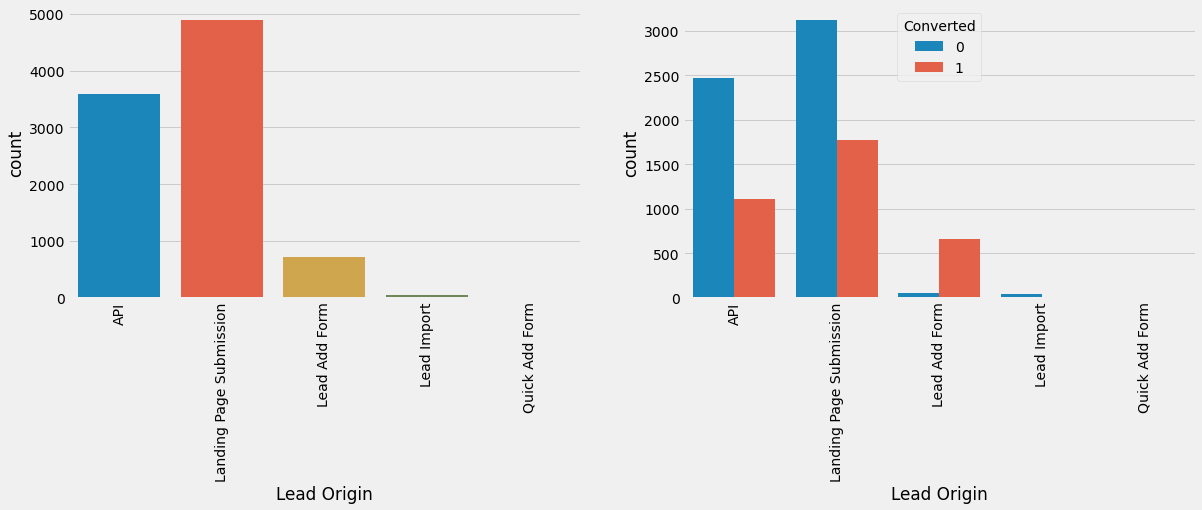

Lead Source   The source of the lead. Includes Google, Organic Search, Olark Chat, etc.


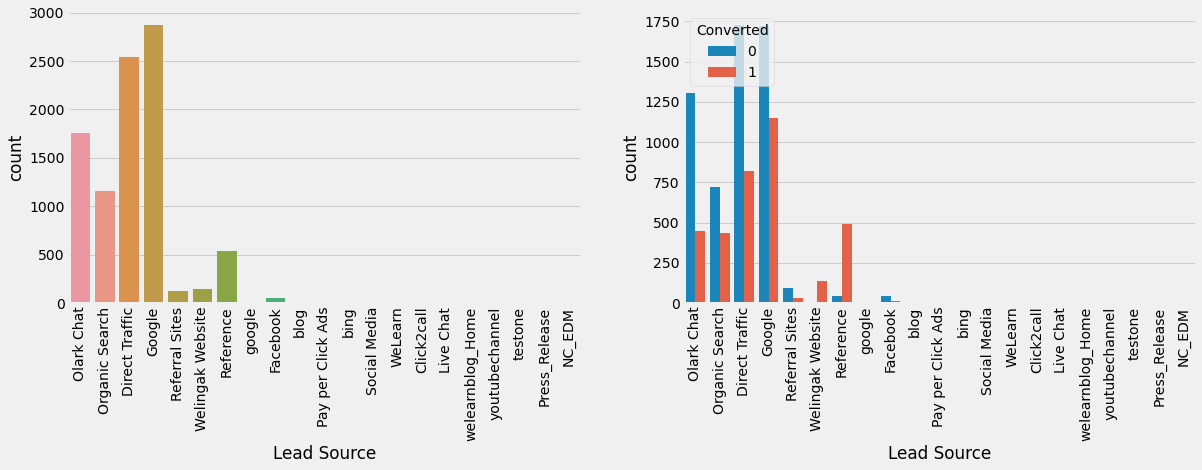

Do Not Email   An indicator variable selected by the customer wherein they select whether of not they want to be emailed about the course or not.


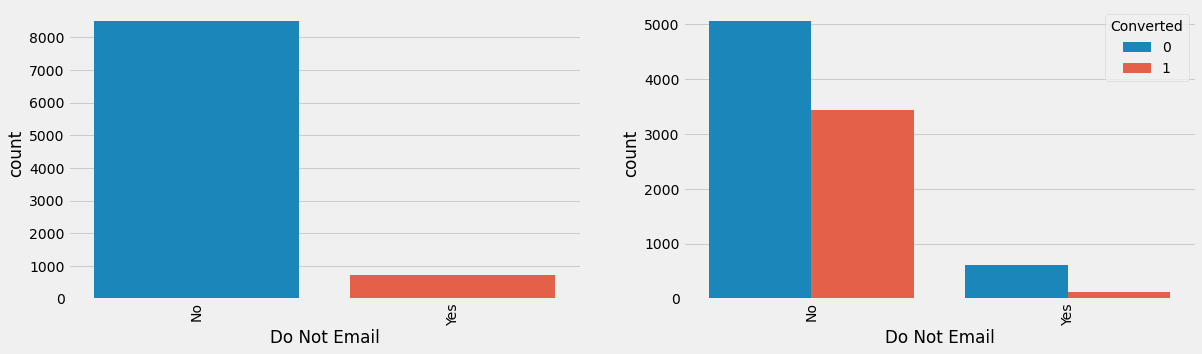

Do Not Call   An indicator variable selected by the customer wherein they select whether of not they want to be called about the course or not.


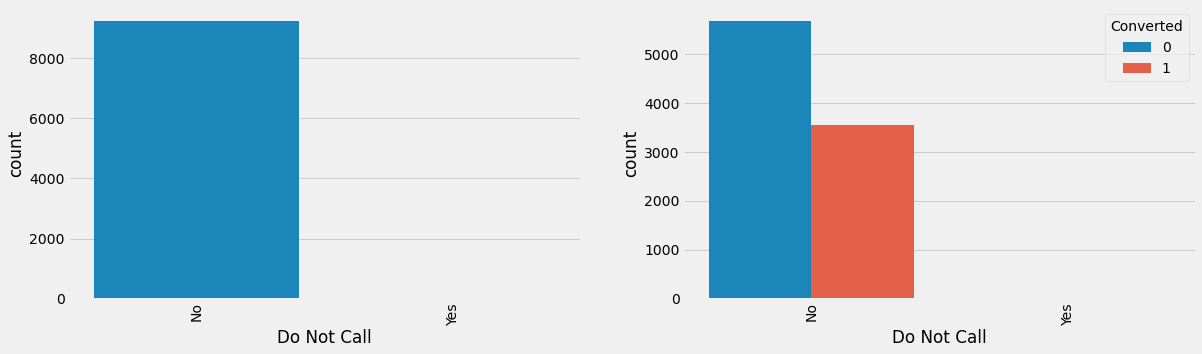

Converted   The target variable. Indicates whether a lead has been successfully converted or not.


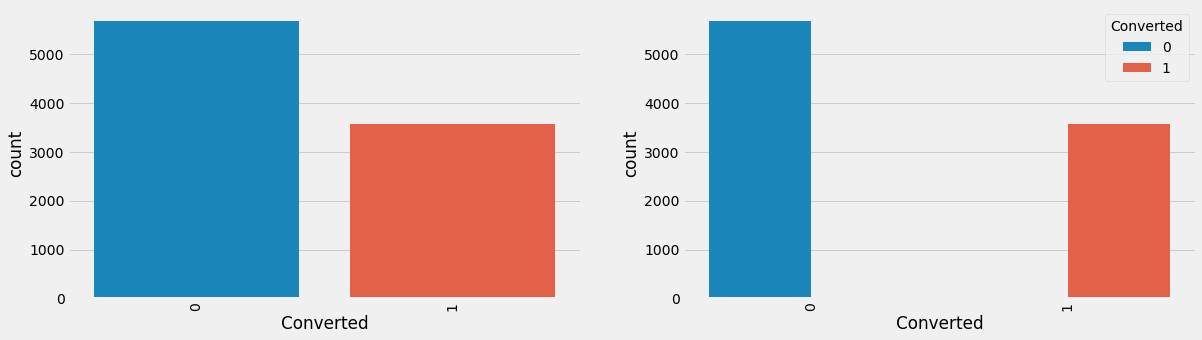

Last Activity   Last activity performed by the customer. Includes Email Opened, Olark Chat Conversation, etc.


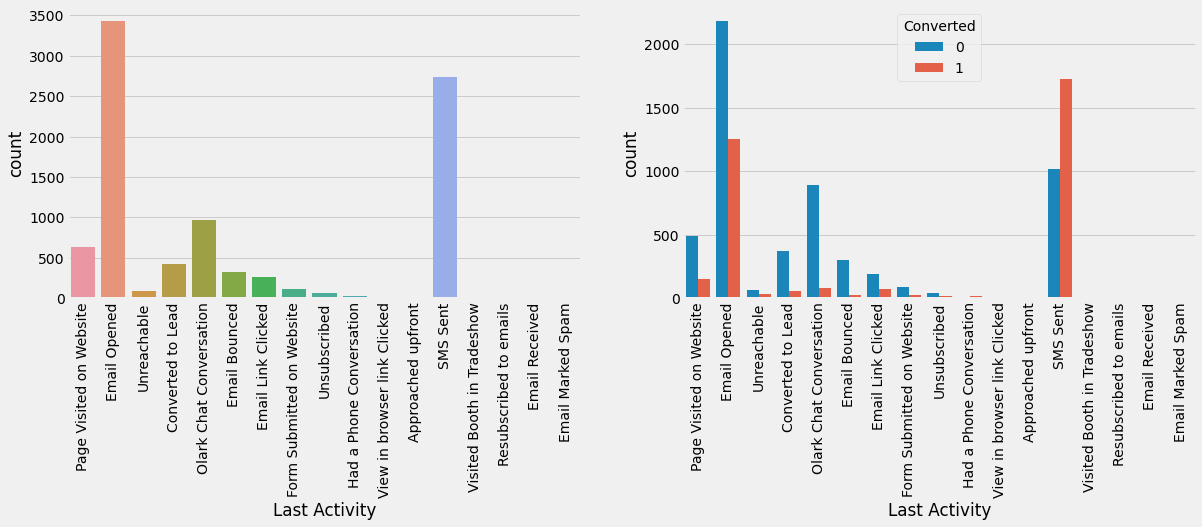

Country   The country of the customer.


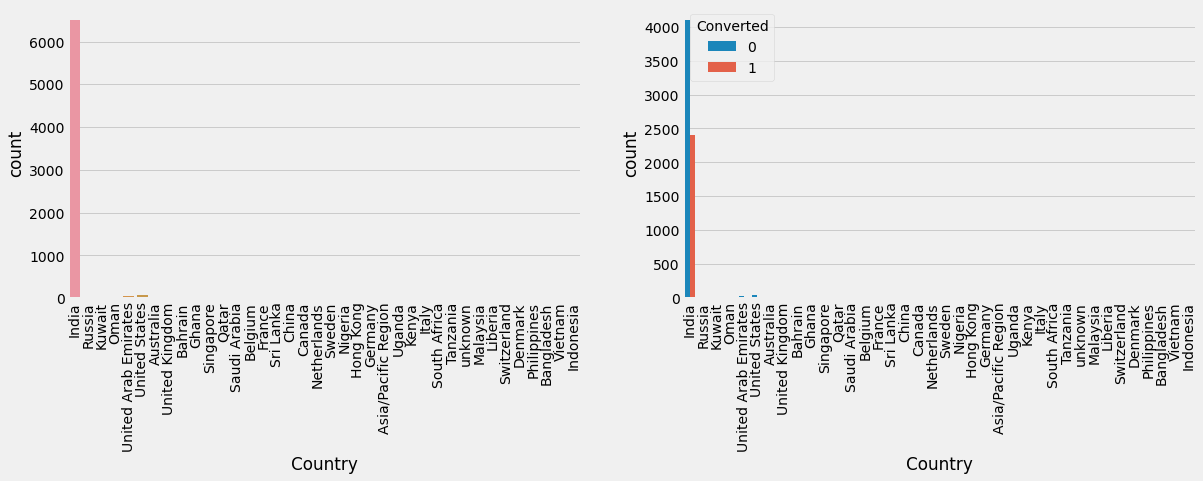

Specialization   The industry domain in which the customer worked before. Includes the level 'Select Specialization' which means the customer had not selected this option while filling the form.


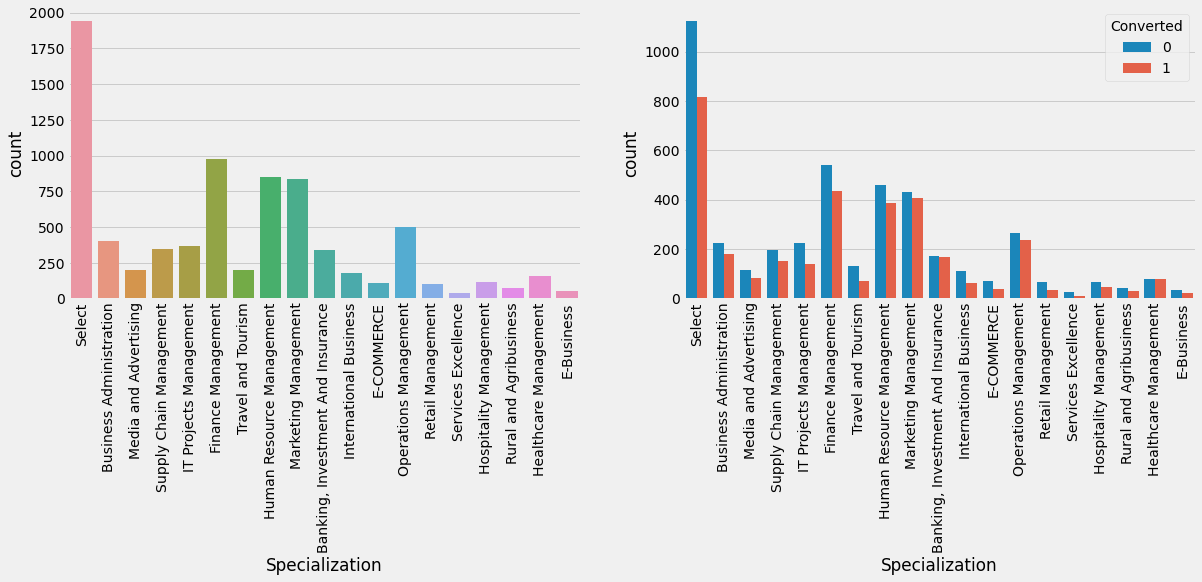

How did you hear about X Education   The source from which the customer heard about X Education.


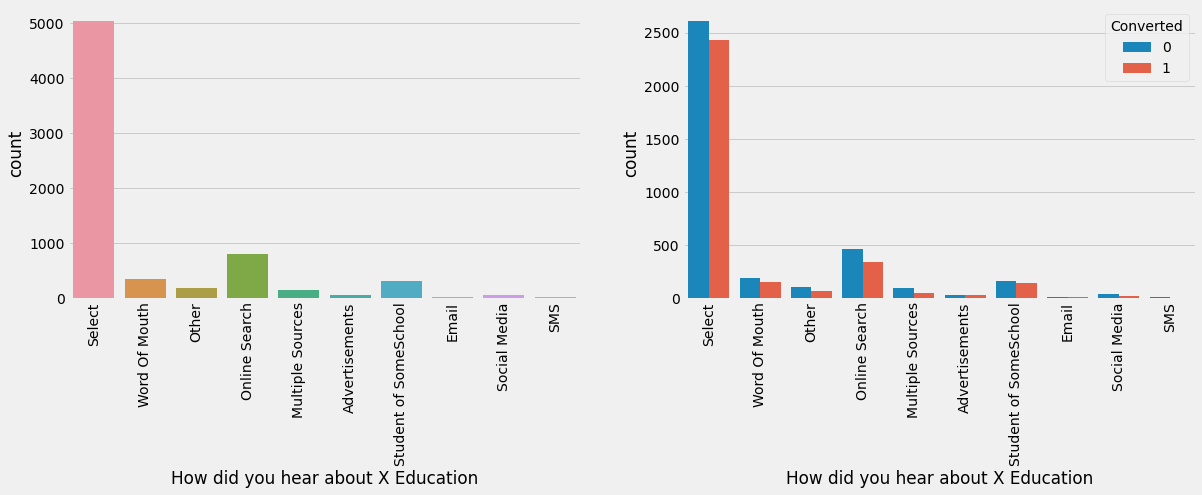

What is your current occupation   Indicates whether the customer is a student, umemployed or employed.


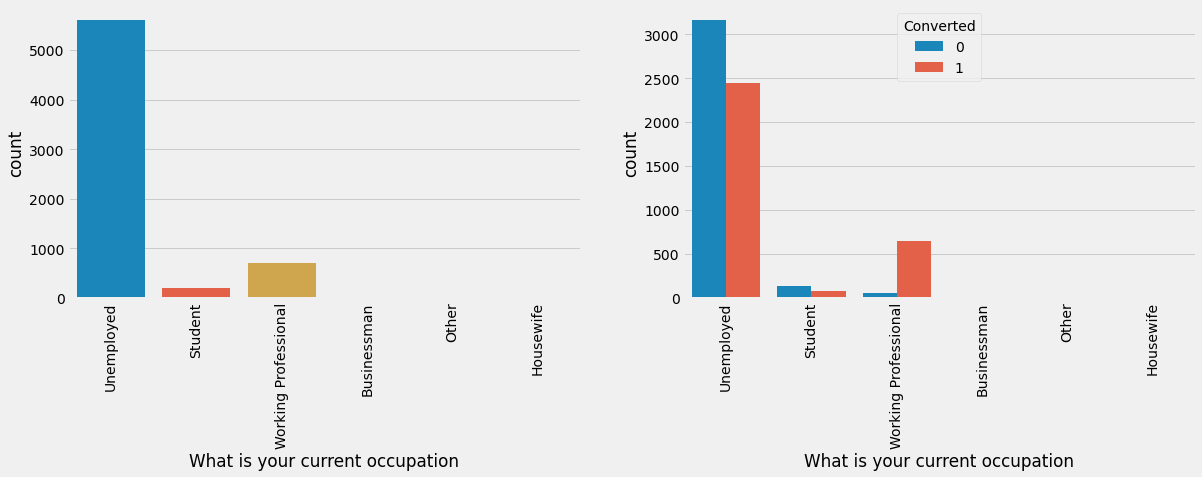

What matters most to you in choosing a course   An option selected by the customer indicating what is their main motto behind doing this course.


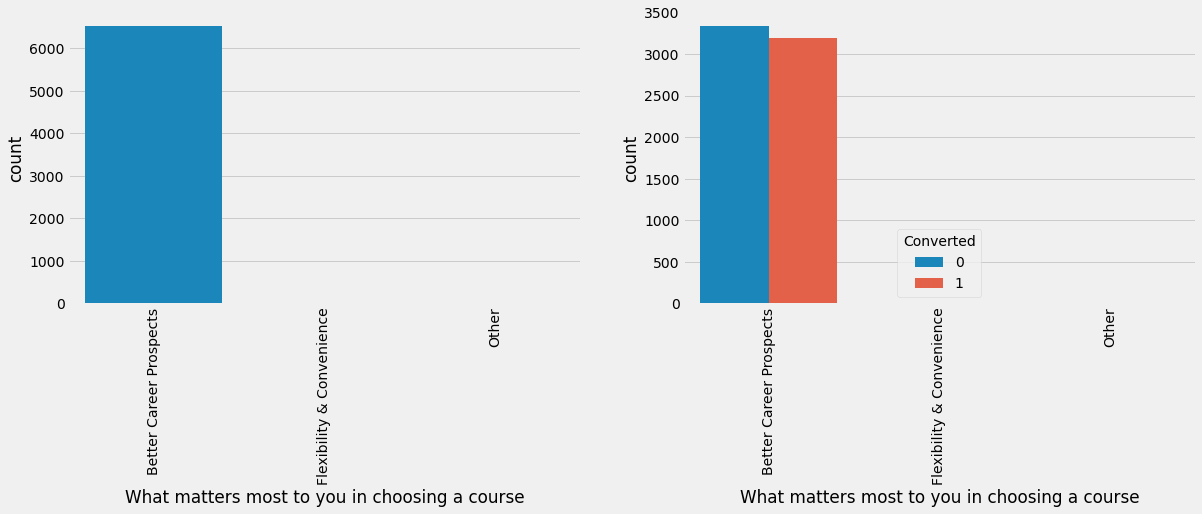

Search   Indicating whether the customer had seen the ad in any of the listed items.


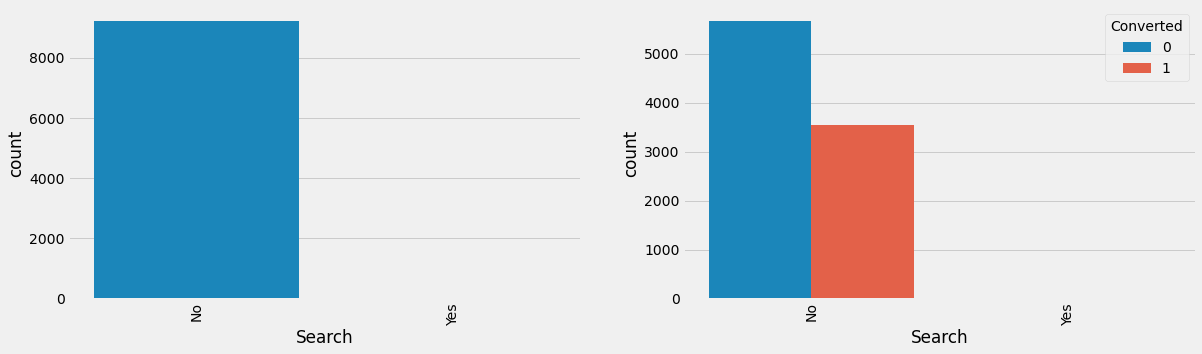

Magazine   nan


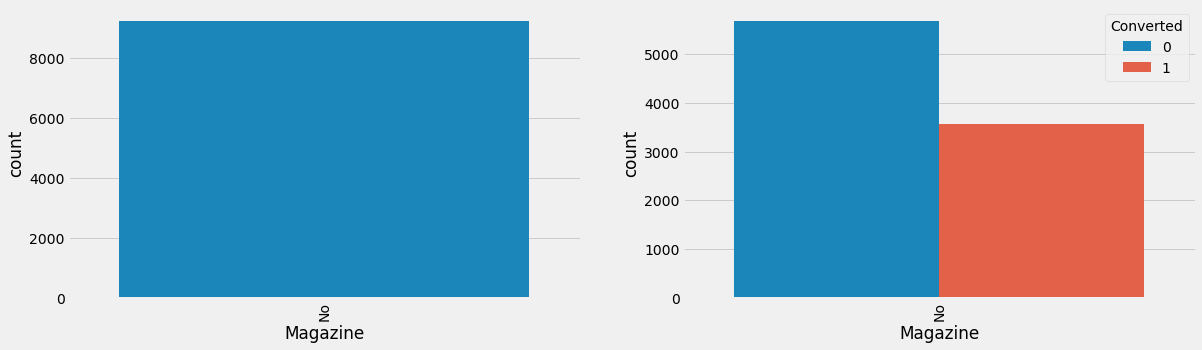

Newspaper Article   nan


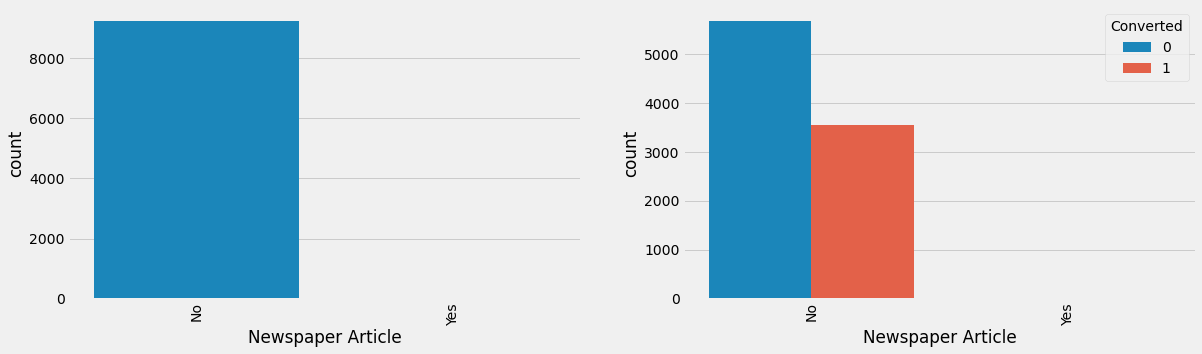

X Education Forums   nan


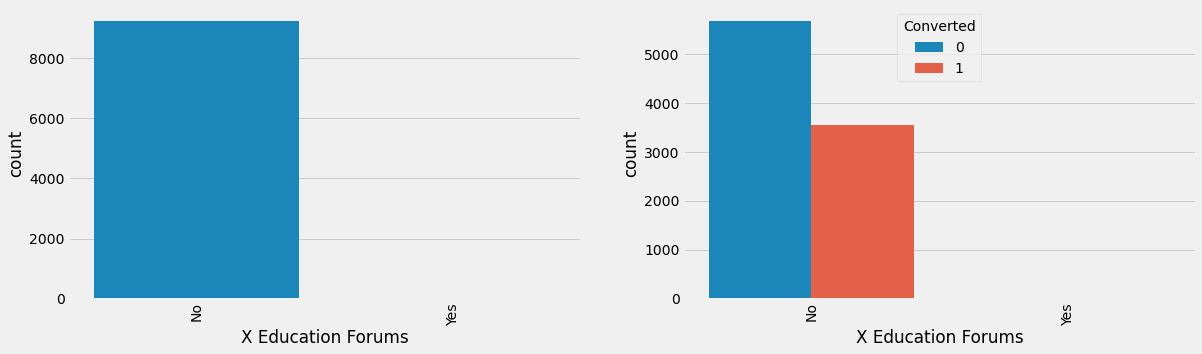

Newspaper   nan


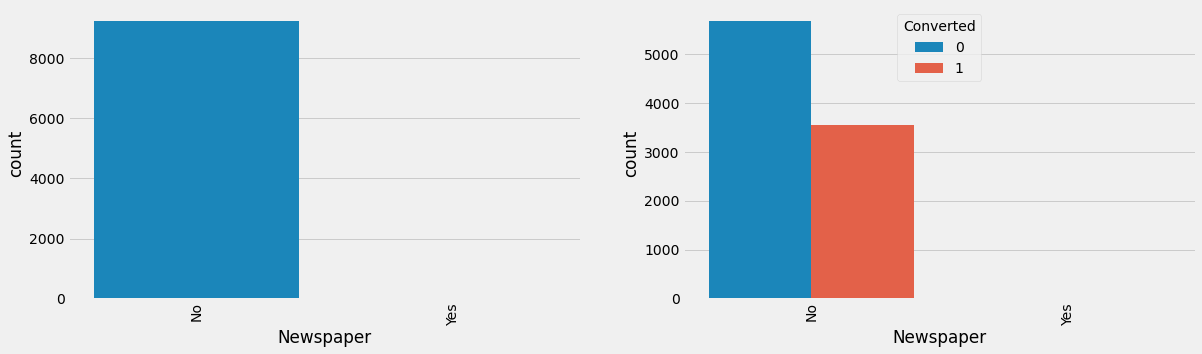

Digital Advertisement   nan


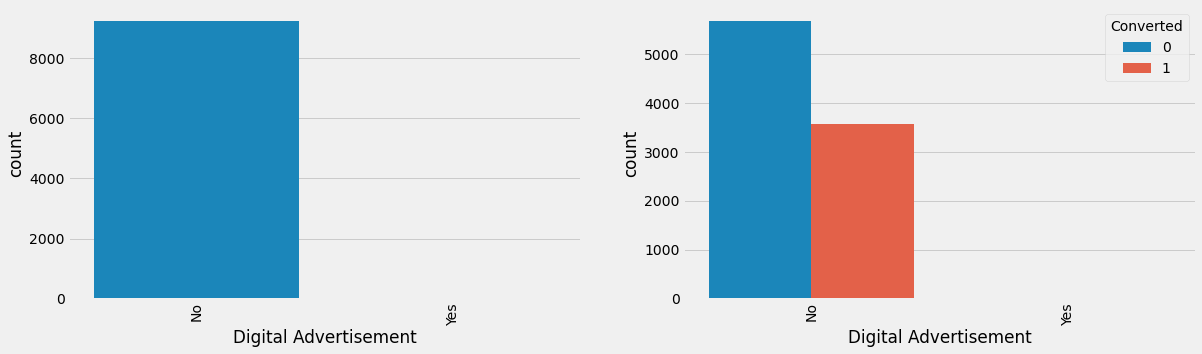

Through Recommendations   Indicates whether the customer came in through recommendations.


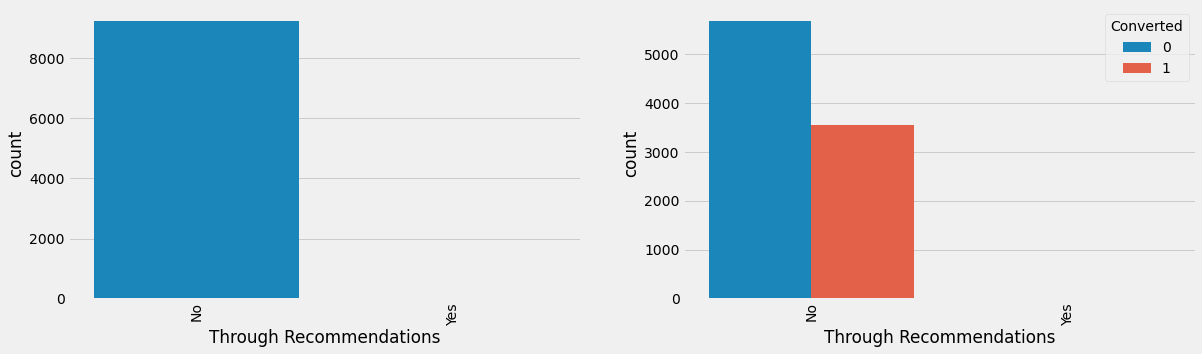

Receive More Updates About Our Courses   Indicates whether the customer chose to receive more updates about the courses.


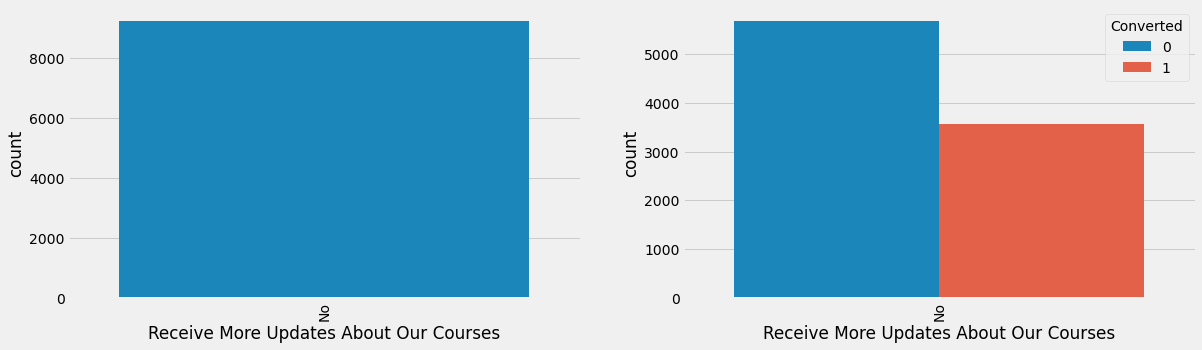

Tags   Tags assigned to customers indicating the current status of the lead.


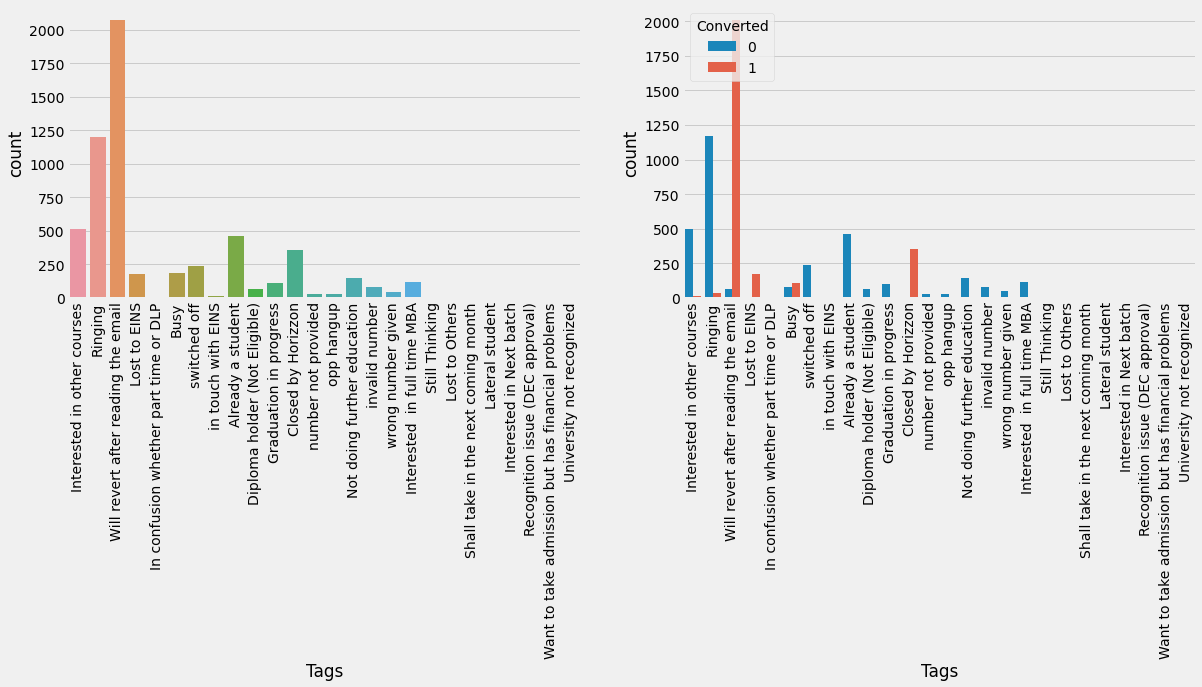

Lead Quality   Indicates the quality of lead based on the data and intuition the the employee who has been assigned to the lead.


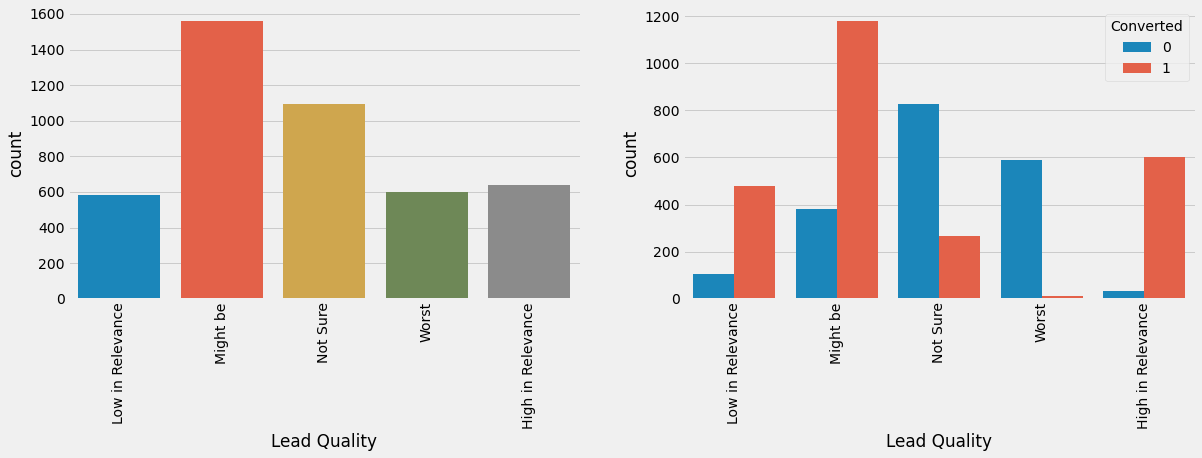

Update me on Supply Chain Content   Indicates whether the customer wants updates on the Supply Chain Content.


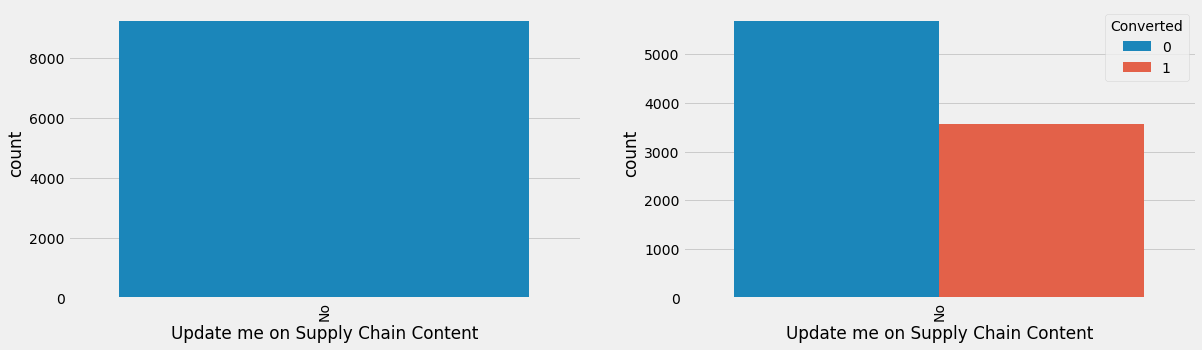

Get updates on DM Content   Indicates whether the customer wants updates on the DM Content.


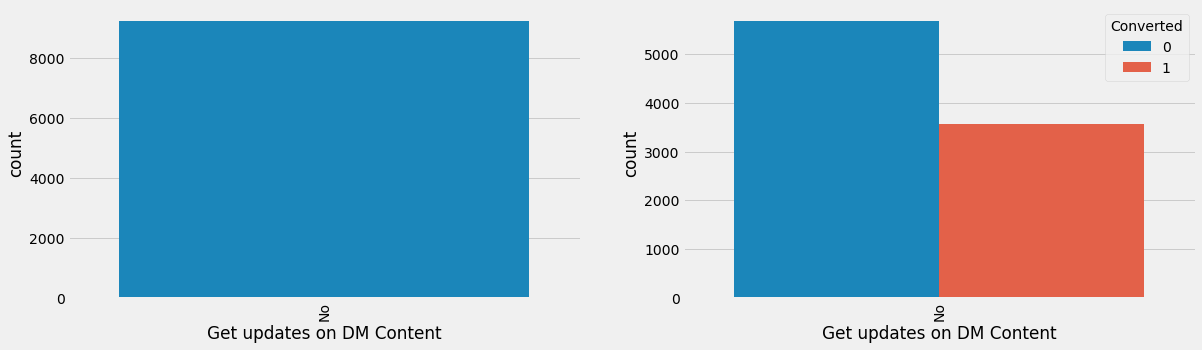

Lead Profile   A lead level assigned to each customer based on their profile.


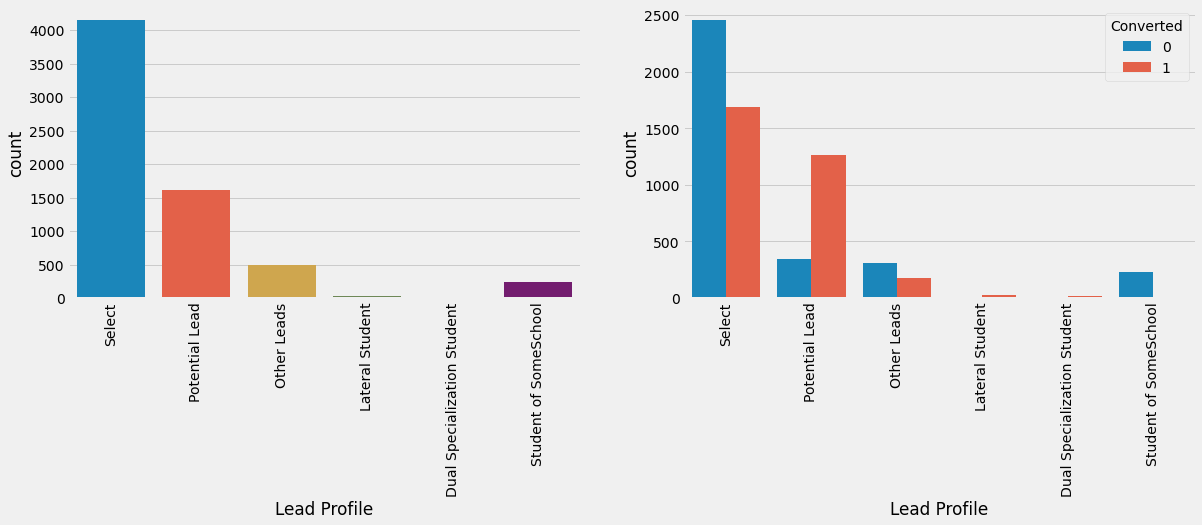

City   The city of the customer.


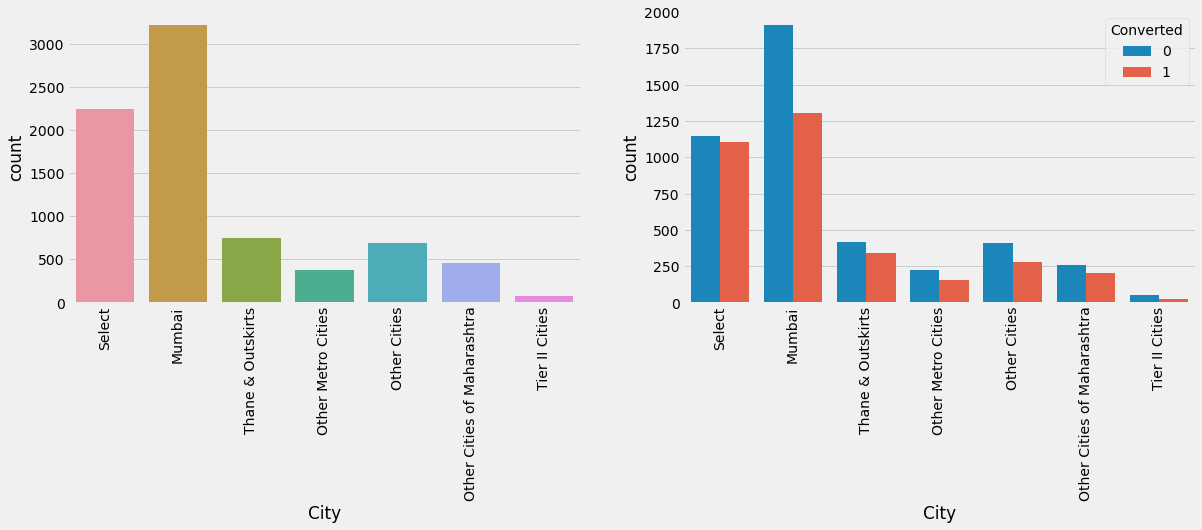

Asymmetrique Activity Index   An index and score assigned to each customer based on their activity and their profile


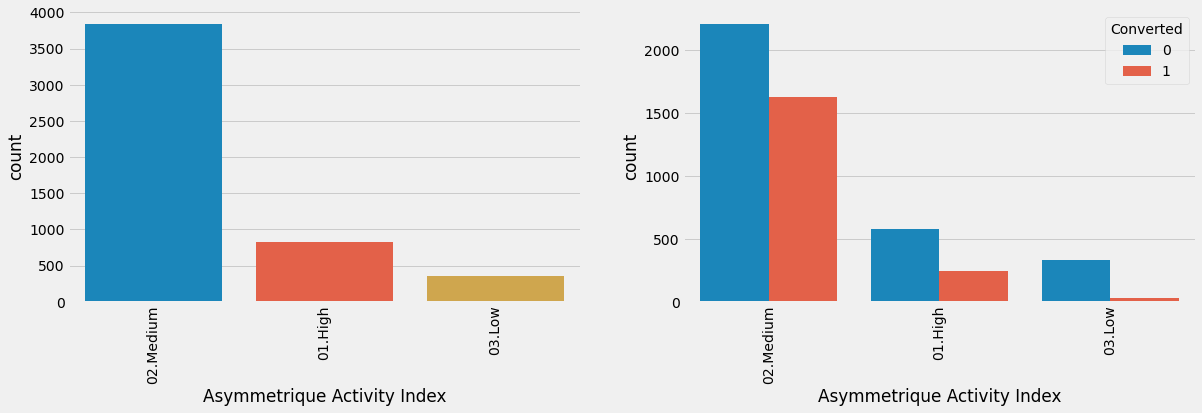

Asymmetrique Profile Index   nan


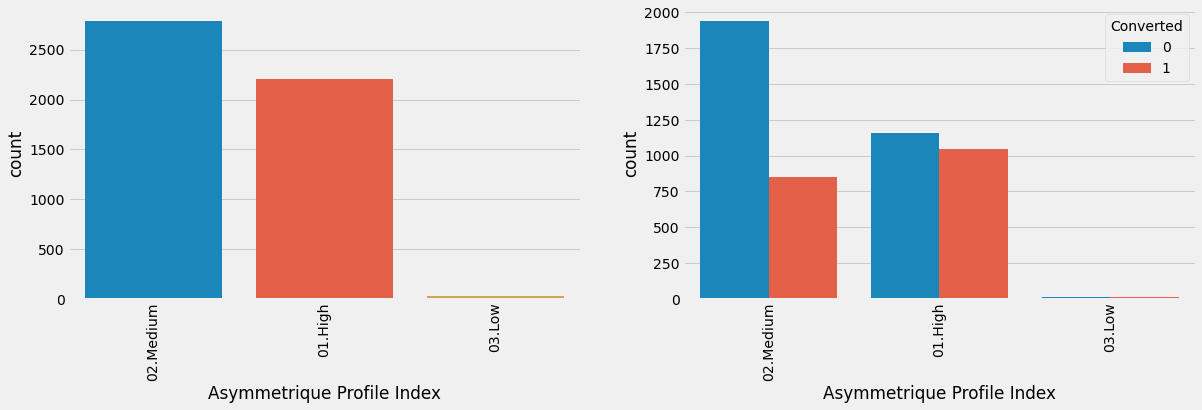

Asymmetrique Activity Score   nan


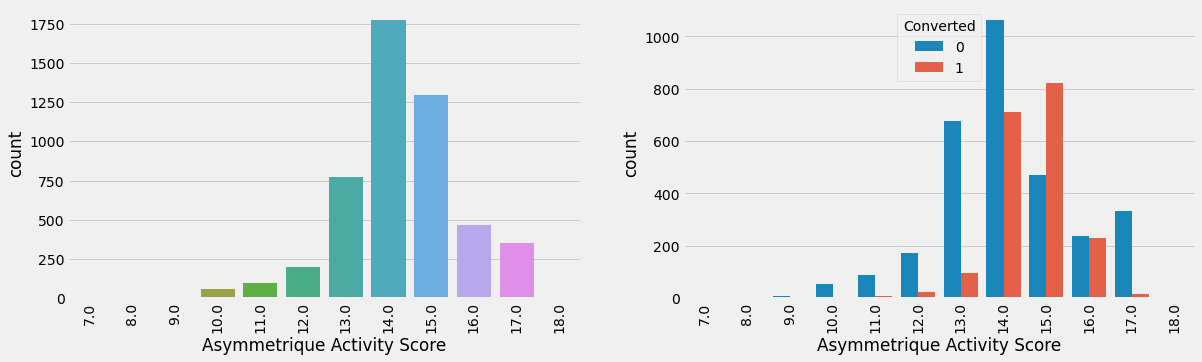

Asymmetrique Profile Score   nan


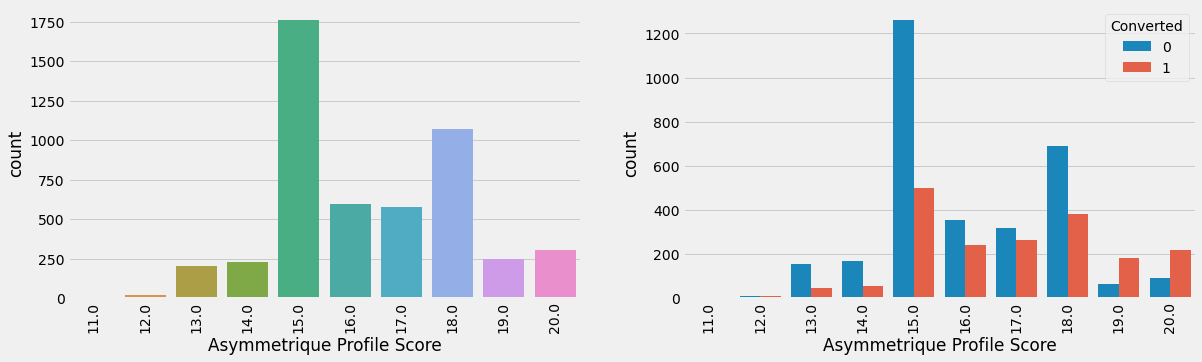

I agree to pay the amount through cheque   Indicates whether the customer has agreed to pay the amount through cheque or not.


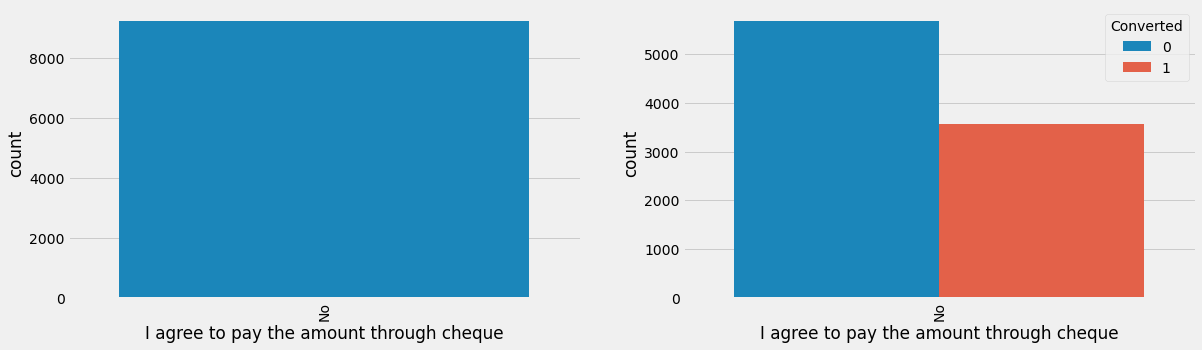

A free copy of Mastering The Interview   Indicates whether the customer wants a free copy of 'Mastering the Interview' or not.


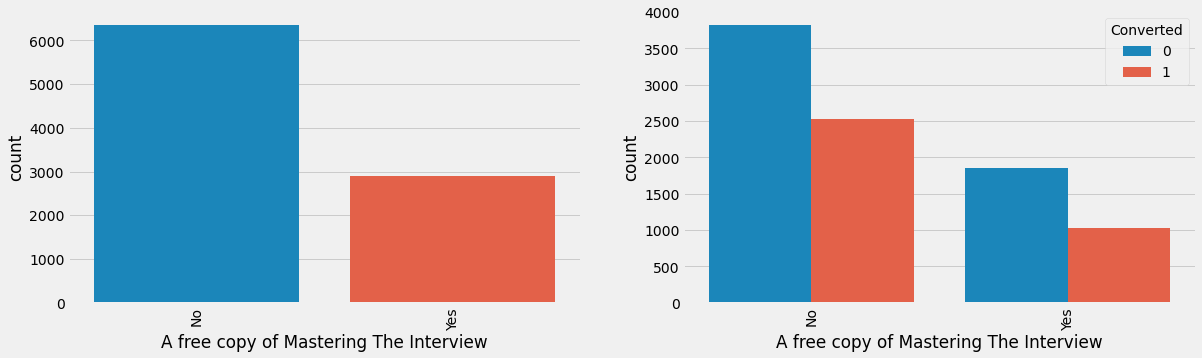

Last Notable Activity   The last notable acitivity performed by the student.


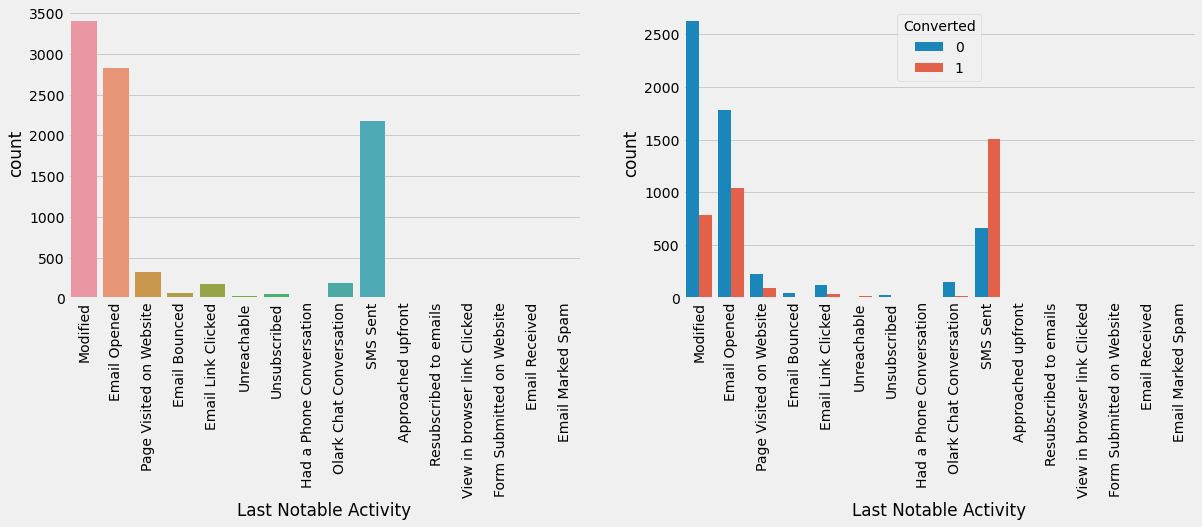

In [11]:
# Just taking a note of all the categorical value present in each column

for i in categorical:
    print(i," ",dfdic.loc[i][0])   # For detailed description of the feature as per data dictionary
    plt.figure(figsize=[18,5])
    plt.subplot(121)
    sns.countplot(df[i])
    plt.xticks(rotation=90)
    plt.subplot(122)
    sns.countplot(df[i],hue=df.Converted)
    plt.xticks(rotation=90)
    plt.show()

### Step 2: Data Cleaning

In [12]:
# Counting the total rows in each column having "Select" as a category

df[df == "Select"].count()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Country                                             0
Specialization                                   1942
How did you hear about X Education               5043
What is your current occupation                     0
What matters most to you in choosing a course       0
Search                                              0
Magazine                                            0
Newspaper Article           

In [13]:
# As per instruction Replacing "Select" Category With "NUll" value

df = df.replace("Select", np.nan)

# Sanity Check for "Select"

df[df == "Select"].count()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums             

In [14]:
# Check for null values of each column in percentage

100 * (df.isnull().mean())

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

### Structuring

In [15]:
# We will just drop the columns with more than 40% of null values

for i in df.columns:
    if df[i].isnull().mean()>=0.4:
        df.drop([i],1,inplace=True)

In [16]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [17]:
# Checking for rows with all null values

df.isna().all(axis = 1).sum()

0

In [18]:
# Checking for total number of rows containing atleast one null values

df.isna().any(axis = 1).sum()

5616

In [19]:
# Checking the count of NaN value in each row

null_df = df.isna().sum(axis = 1)

# Converting into the data Frame 

null_df = null_df.reset_index()
null_df.head()

index  0
0      0  3
1      1  2
2      2  0
3      3  0
4      4  1

In [20]:
# Renaming column for better understanding

null_df.rename(columns = {0 : "Row_wise_null_count"}, inplace = True)
null_df.head()

index  Row_wise_null_count
0      0                    3
1      1                    2
2      2                    0
3      3                    0
4      4                    1

In [21]:
# Fetching the indexes containing more than 7(25 percent of total number of columns)columns with null values in each row

cond = null_df["Row_wise_null_count"] >= 7
index_val = list(null_df[cond].index)
print(len(index_val))

20


In [22]:
# Dropping the rows with more than 25% NaN value in it

df.drop(index = index_val, inplace = True)

In [23]:
# Again checking for percentage of null values in each columns

100 * (df.isnull().mean())

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.336226
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.268980
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.268980
Last Activity                                     1.008677
Country                                          26.475054
Specialization                                   36.442516
What is your current occupation                  29.099783
What matters most to you in choosing a course    29.305857
Search                                            0.000000
Magazine                                          0.0000

In [24]:
# Replacing null of columns(containing less than 5% null values) with mode and median value

# "Lead Source"-mode
df["Lead Source"].fillna(df["Lead Source"].mode()[0], inplace = True)


# "TotalVisits"-median
df["TotalVisits"].fillna(df["TotalVisits"].median(), inplace = True)


#"Page Views Per Visit"-median
df["Page Views Per Visit"].fillna(df["Page Views Per Visit"].median(), inplace = True)


#"Last Activity"-mode
df["Last Activity"].fillna(df["Last Activity"].mode()[0], inplace = True)


Now we will check one by one for each remaining column

- Dealing with the null value of the country column

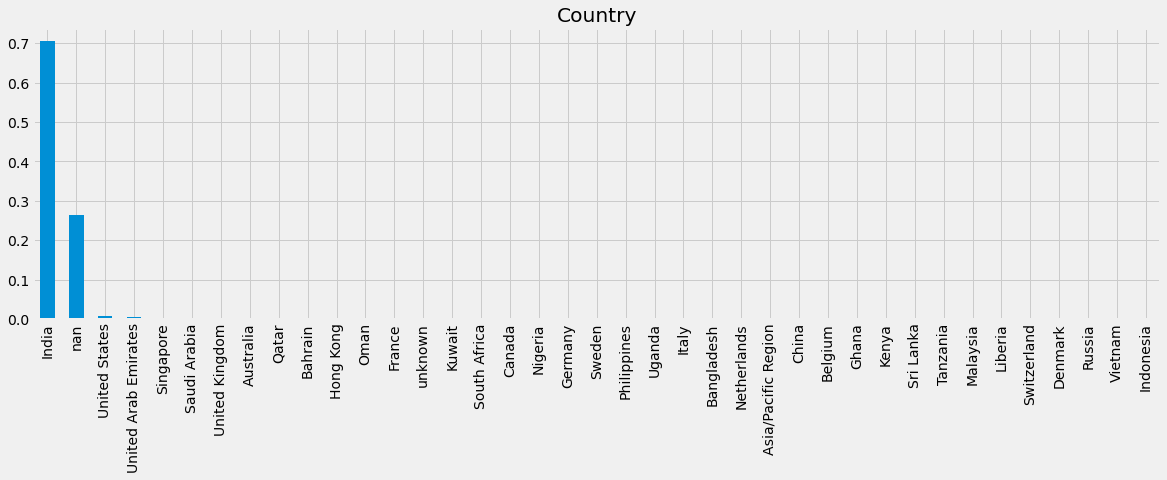

In [25]:
plt.figure(figsize=[18,5])
df.Country.value_counts(normalize=True,dropna=False).plot.bar()
plt.title("Country")
plt.show()

- 71% of the customer are from India if we include NaN value but excluding the NaN value 95% of the rows have India so we will drop the column as it is greatly imbalance and not of any importance for any analysis

In [26]:
# Dropping the Country column
df.drop(columns="Country",axis=1, inplace =True)

##### 2. "Specialization" Column

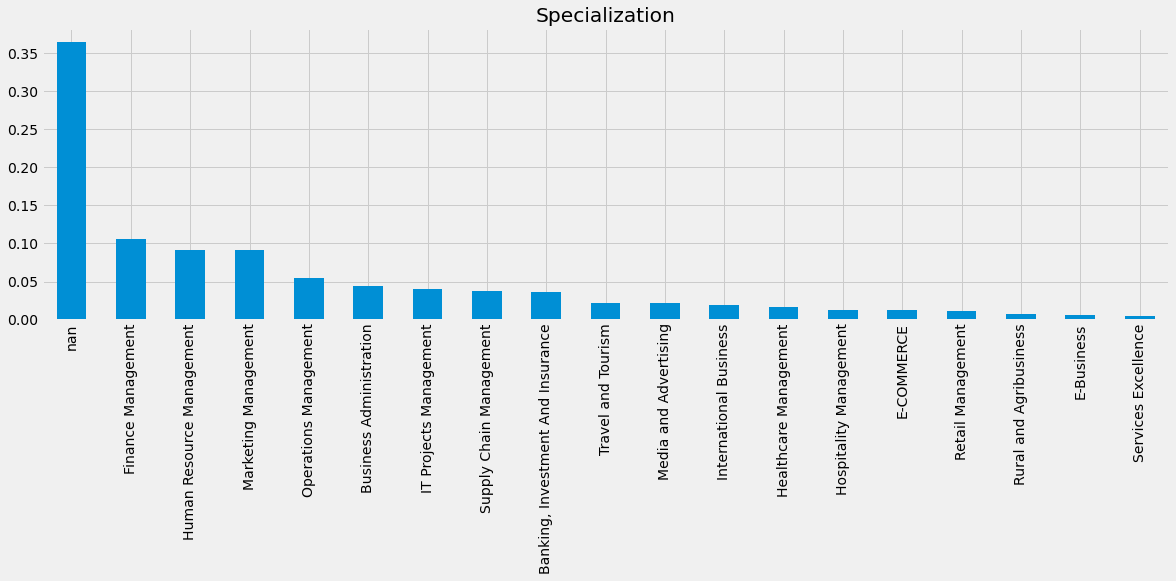

In [27]:
plt.figure(figsize=[18,5])
(df["Specialization"].value_counts(normalize = True,dropna=False)).plot.bar()
plt.title("Specialization")
plt.show()

In [28]:
# Replacing the null values with new category named "Others"

df["Specialization"].fillna("Others", inplace = True)

##### 3. "What is your current occupation" Column

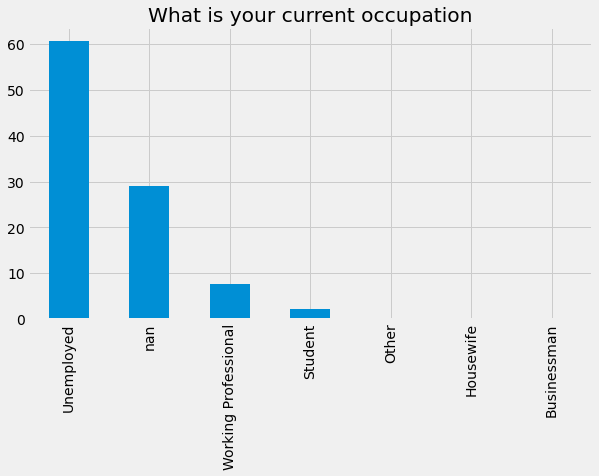

In [29]:
plt.figure(figsize=[9,5])
(100*df["What is your current occupation"].value_counts(normalize = True,dropna=False)).plot.bar()
plt.title("What is your current occupation")
plt.show()

In [30]:
df.shape

(9220, 29)

It has approx 30% NaN value and if we immpute it with any of the given bucket then it may alter the importance of other categorty so it's better to delete the column

In [31]:
df.drop(columns = ["What is your current occupation"], inplace = True)

##### 4. "What matters most to you in choosing a course" Column

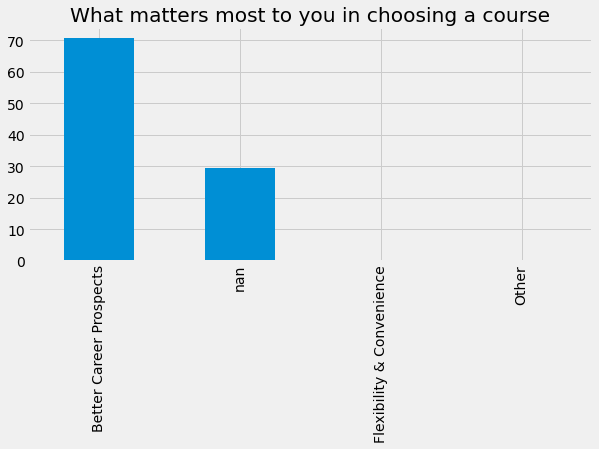

In [32]:
plt.figure(figsize=[9,4])
(100 * df["What matters most to you in choosing a course"].value_counts(normalize = True,dropna=False)).plot.bar()
plt.title("What matters most to you in choosing a course")
plt.show()

As the above column is highly imbalanced so it's better to drop the column as it will not be of any use in model building

In [33]:
# Dropping the column
df.drop(columns = ["What matters most to you in choosing a course"], inplace = True)

##### 6. "City" Column

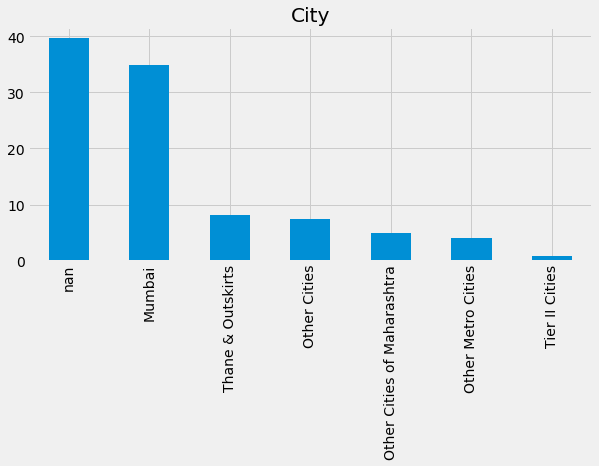

In [34]:
plt.figure(figsize=[9,4])
(100 * df["City"].value_counts(normalize = True,dropna=False)).plot.bar()
plt.title("City")
plt.show()

Dropping the City column as it is a online company So City does not matter in Model Building

In [35]:
# Dropping the column
df.drop(columns = ["City"], inplace = True)

##### 5. "Tags" Column

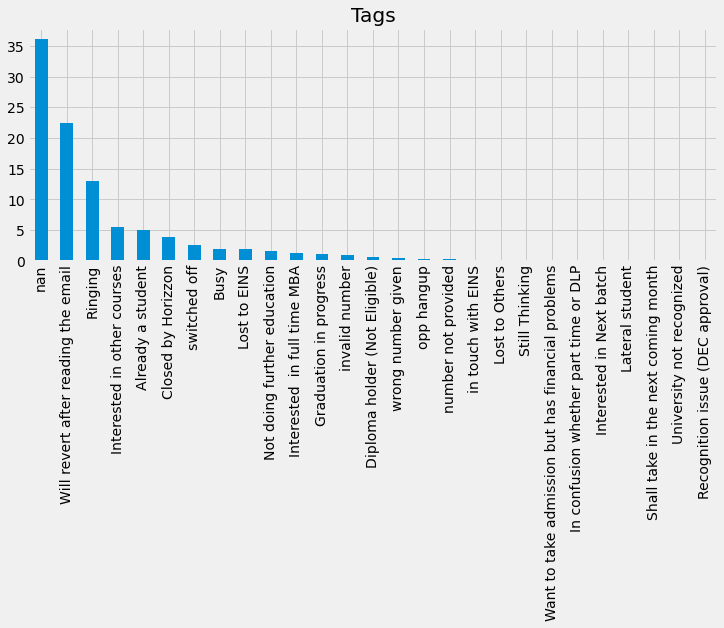

In [36]:
plt.figure(figsize=[11,4])
(100 * df["Tags"].value_counts(normalize = True,dropna=False)).plot.bar()
plt.title("Tags")
plt.show()

In [37]:
# It's better to drop the column as approx 36% data are NaN so 

df.drop("Tags", axis = 1,inplace=True)

In [38]:
# To Check the columns present in the data frame after the operation

df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'Search', 'Magazine', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [39]:
# For prining number of unique values in "Prospect ID" and "Lead Number"
# And comparing with total rows present in the dataframe

print("Prospect ID : ", df["Prospect ID"].nunique())
print("Lead Number: ", df["Lead Number"].nunique())
print("lead_data: ", len(df.index))

Prospect ID :  9220
Lead Number:  9220
lead_data:  9220


In [40]:
# As for both "Prospect ID" and "Lead Number" the number of unique values same as total number of index in dataframe
# So better to delete one of the column

df.drop(columns = ["Prospect ID"], inplace = True)

In [41]:
# After Deleting Rows and columns and also after dealing with null values

100 * (df.isnull().mean())

Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content           0.0
Get updates on DM Content               

In [42]:
df.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'Search', 'Magazine', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

### Final Structuring

In [43]:
# Clubbing the features with similar category
categorical = ['Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'Last Activity',
       'Specialization', 'Search', 'Magazine', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity']

continuous = ['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']

# Sanity Check if some feature is missed or not
print(len(df.columns)==(len(categorical)+len(continuous)+1))

True


In [44]:
# Current Shape of data set

df.shape

(9220, 24)

In [45]:
# Percentage of Rows Retained after Data Cleaning Step

print("Percentage of data retained: ", (len(df.index) / 9240) * 100)

Percentage of data retained:  99.78354978354979


### Step 3: Exploratory Data Analysis

In [46]:
# To Find Current Conversion Rate

converted = (sum(df["Converted"]) / len(df["Converted"].index)) * 100
print("CONVERSION RATE: ", converted)

CONVERSION RATE:  38.52494577006508


### Univariate Analysis

#### Categorical Variable

Lead Origin - The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc.


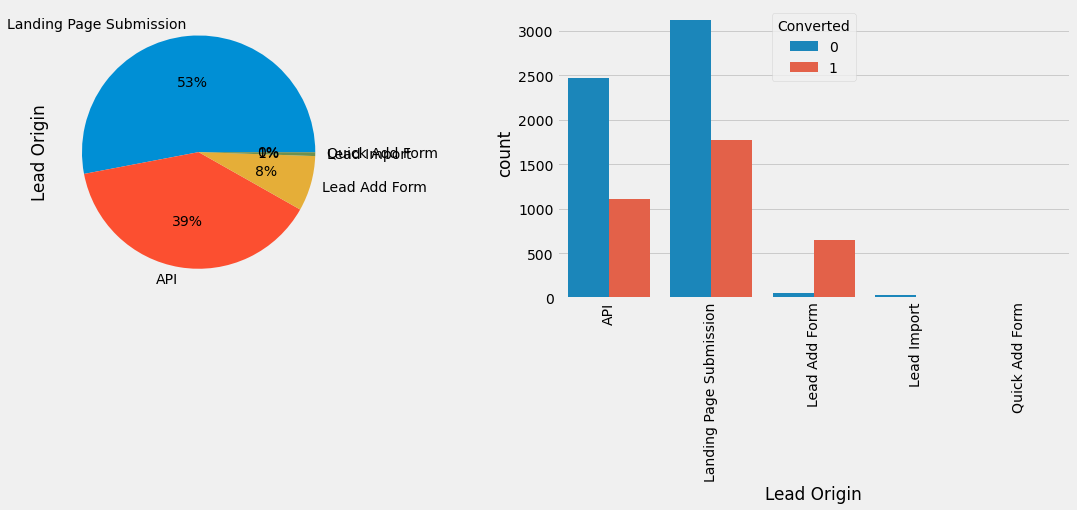

Lead Source - The source of the lead. Includes Google, Organic Search, Olark Chat, etc.


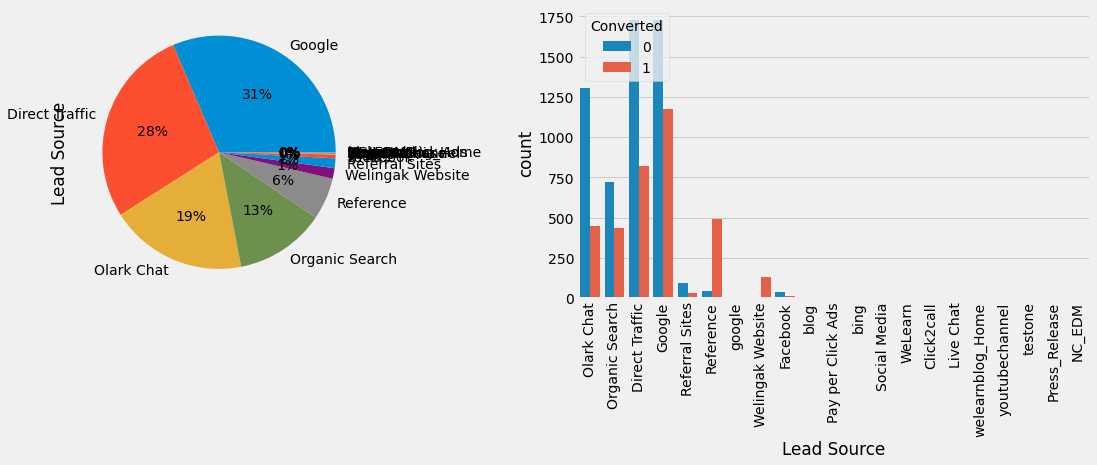

Do Not Email - An indicator variable selected by the customer wherein they select whether of not they want to be emailed about the course or not.


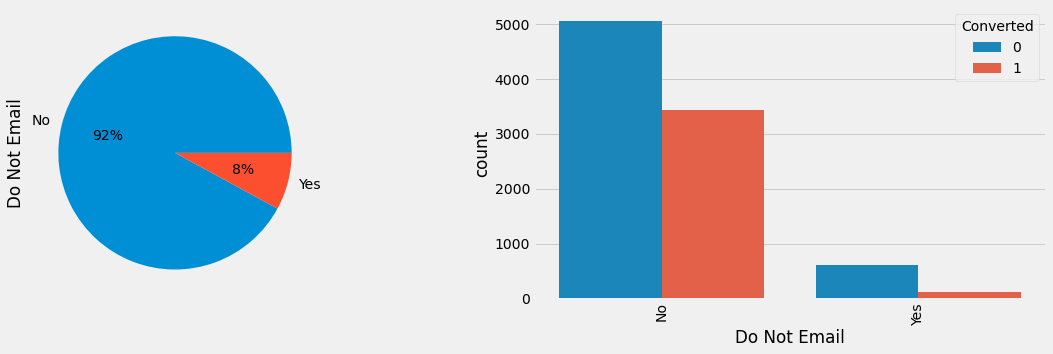

Do Not Call - An indicator variable selected by the customer wherein they select whether of not they want to be called about the course or not.


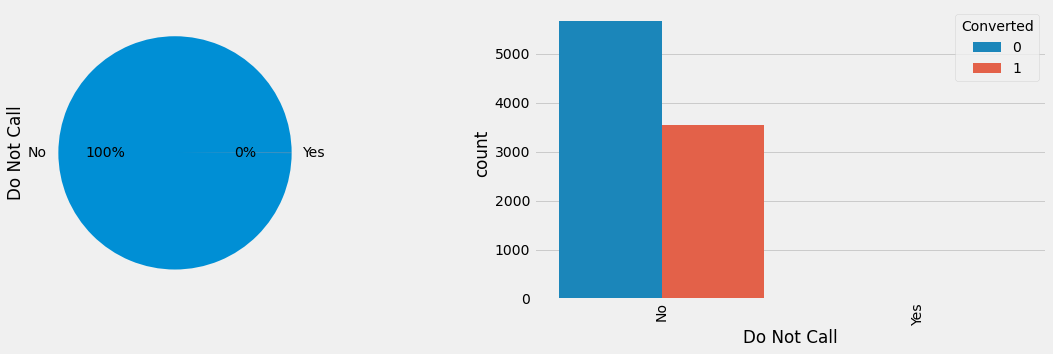

Converted - The target variable. Indicates whether a lead has been successfully converted or not.


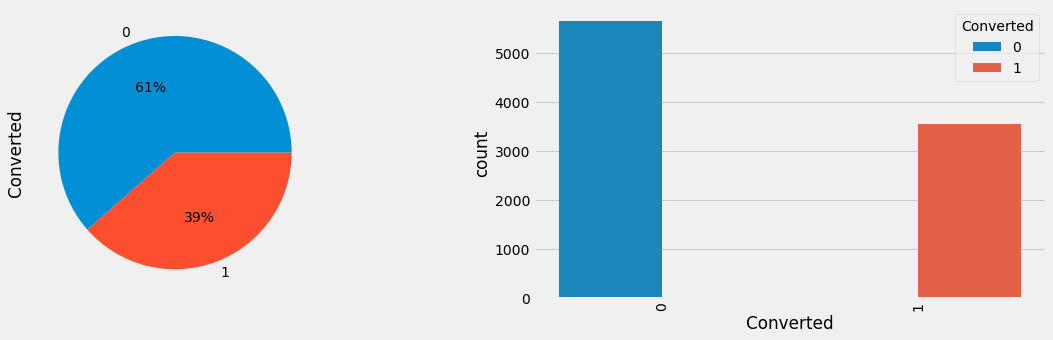

Last Activity - Last activity performed by the customer. Includes Email Opened, Olark Chat Conversation, etc.


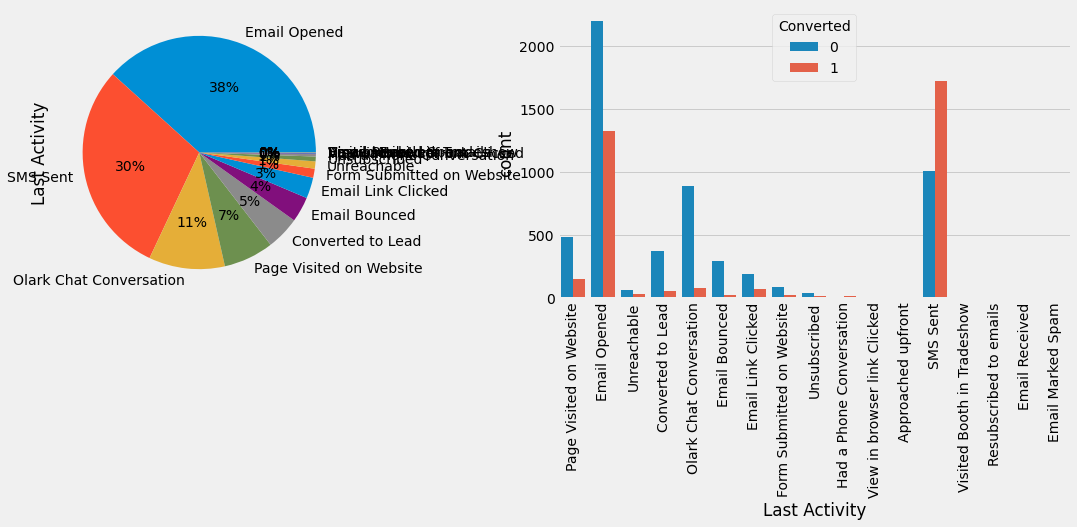

Specialization - The industry domain in which the customer worked before. Includes the level 'Select Specialization' which means the customer had not selected this option while filling the form.


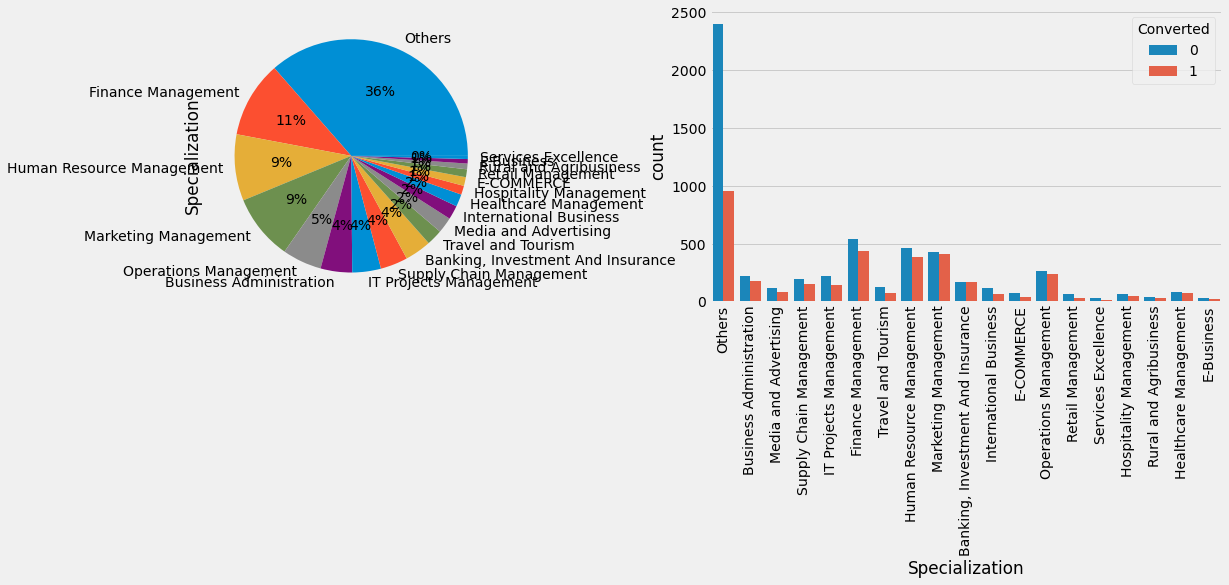

Search - Indicating whether the customer had seen the ad in any of the listed items.


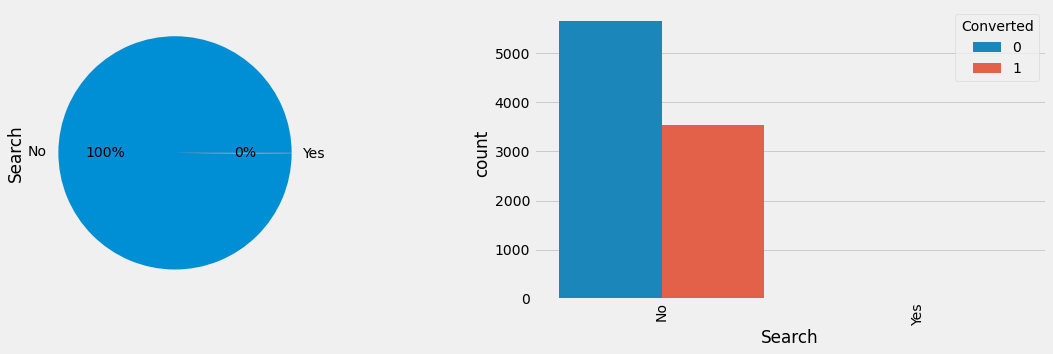

Magazine - nan


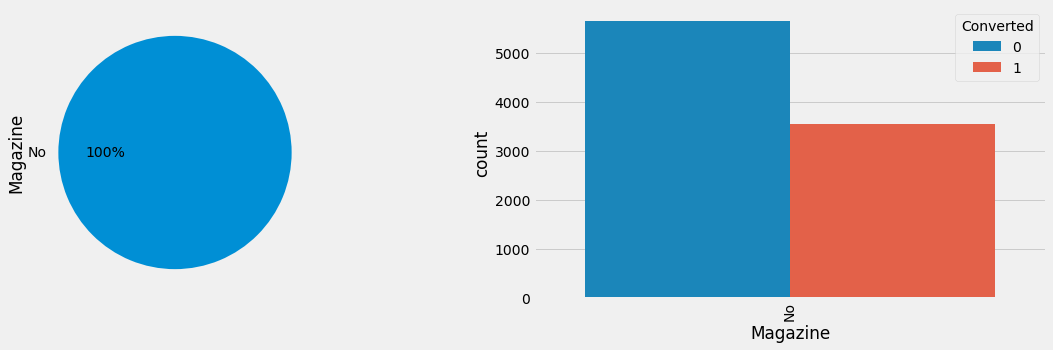

Newspaper Article - nan


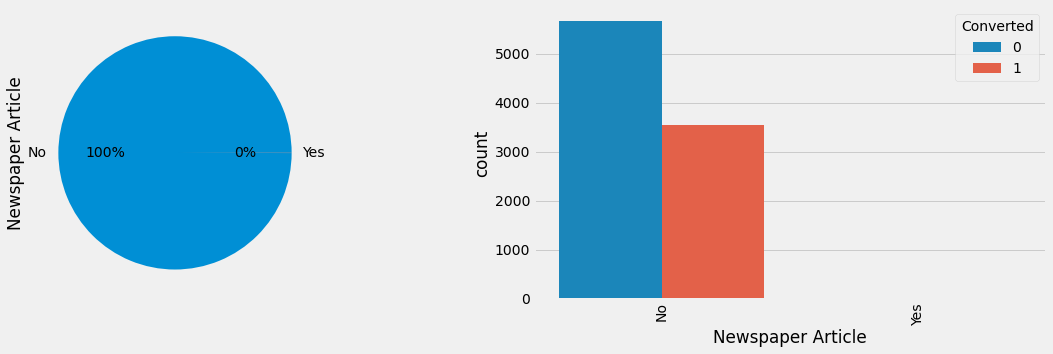

X Education Forums - nan


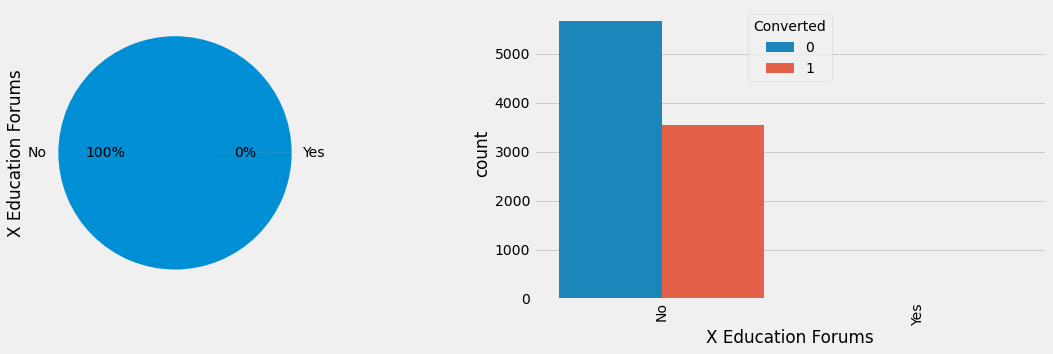

Newspaper - nan


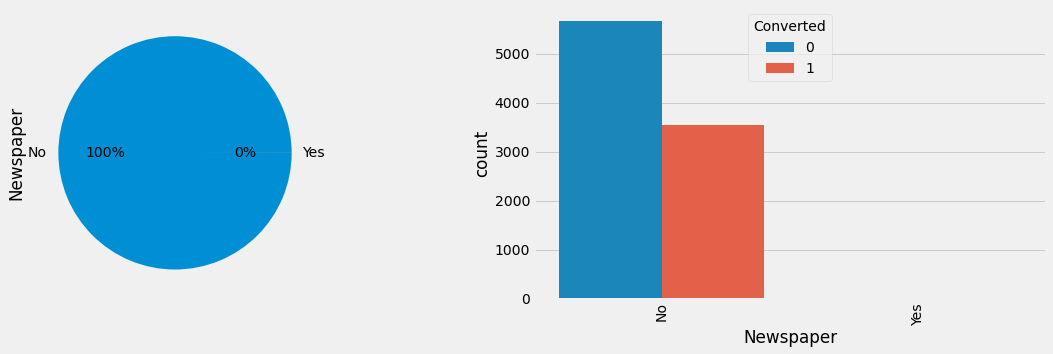

Digital Advertisement - nan


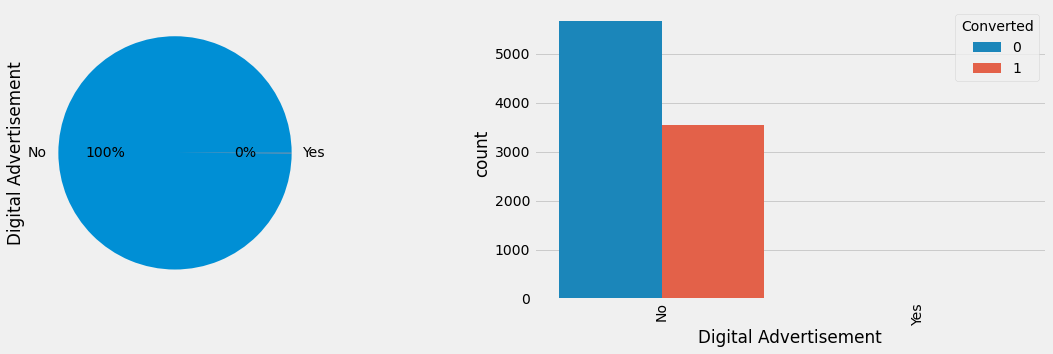

Through Recommendations - Indicates whether the customer came in through recommendations.


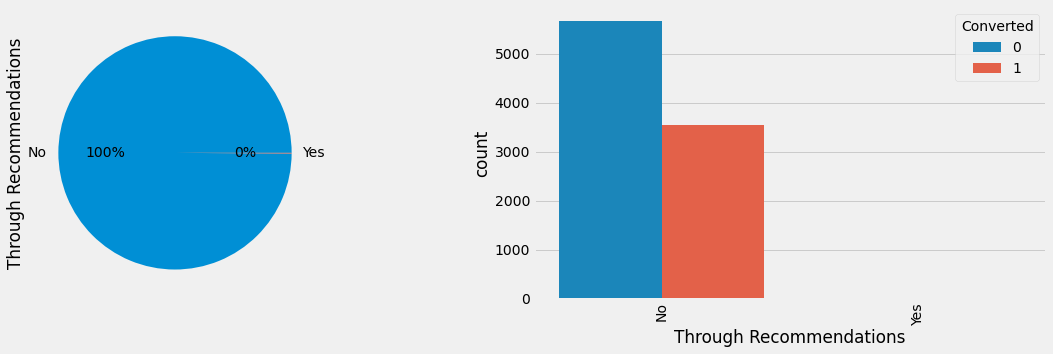

Receive More Updates About Our Courses - Indicates whether the customer chose to receive more updates about the courses.


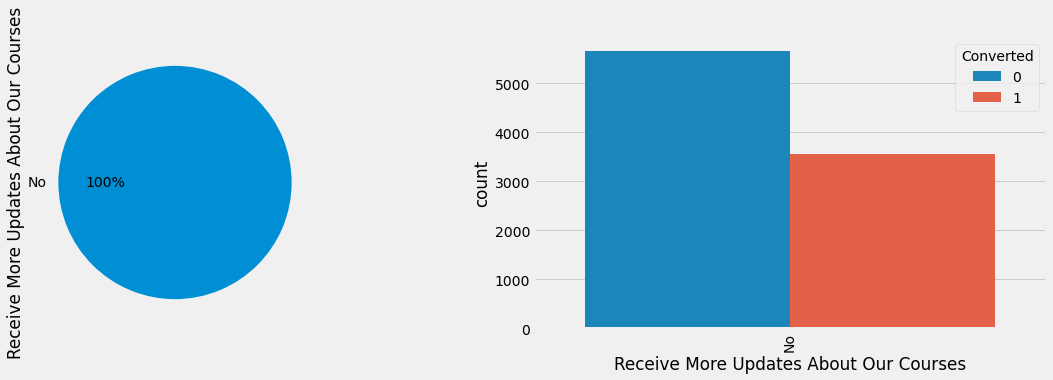

Update me on Supply Chain Content - Indicates whether the customer wants updates on the Supply Chain Content.


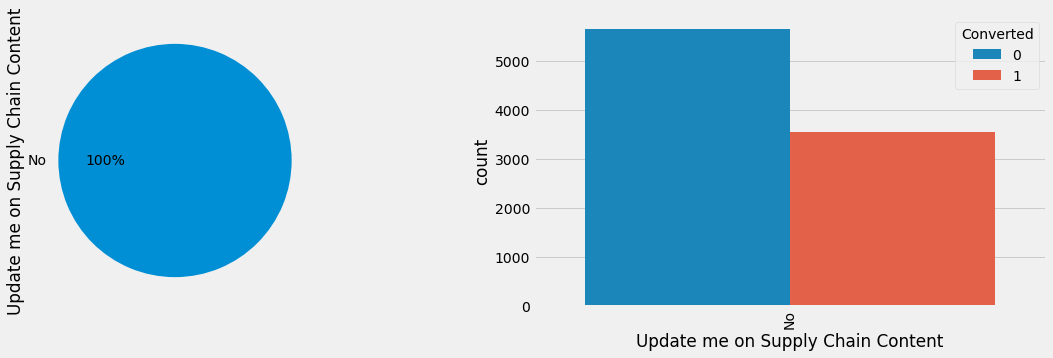

Get updates on DM Content - Indicates whether the customer wants updates on the DM Content.


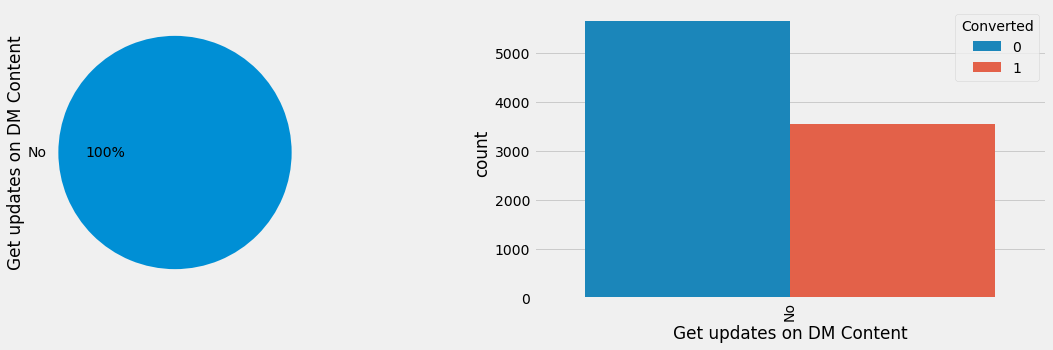

I agree to pay the amount through cheque - Indicates whether the customer has agreed to pay the amount through cheque or not.


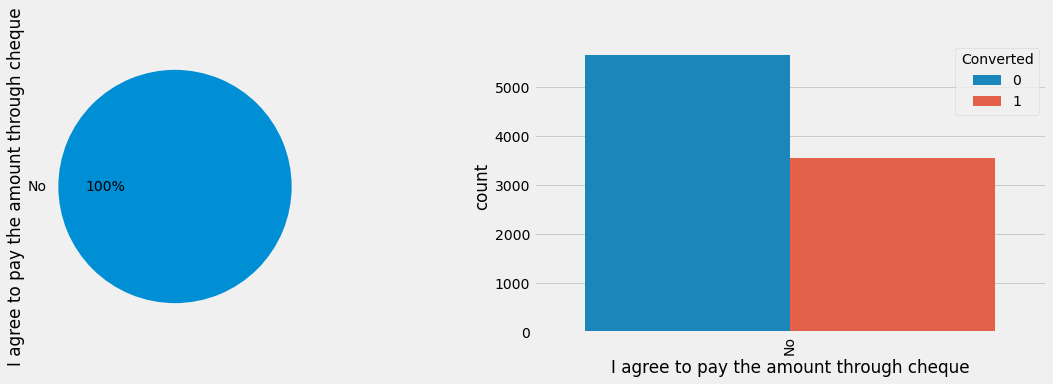

A free copy of Mastering The Interview - Indicates whether the customer wants a free copy of 'Mastering the Interview' or not.


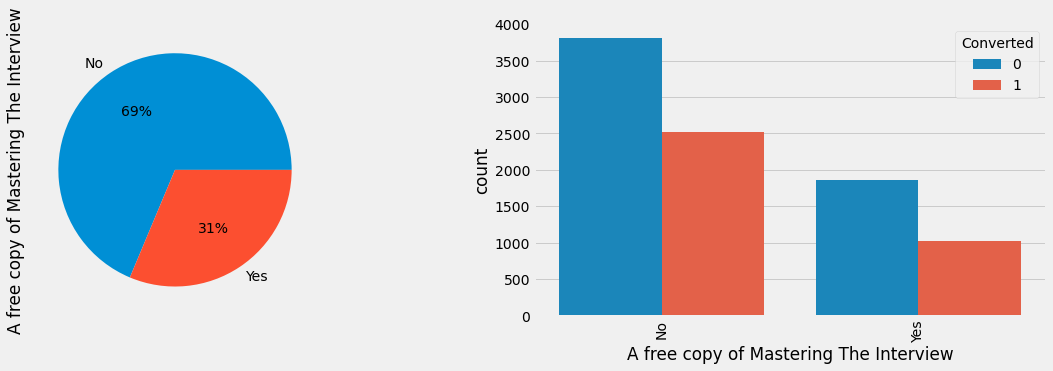

Last Notable Activity - The last notable acitivity performed by the student.


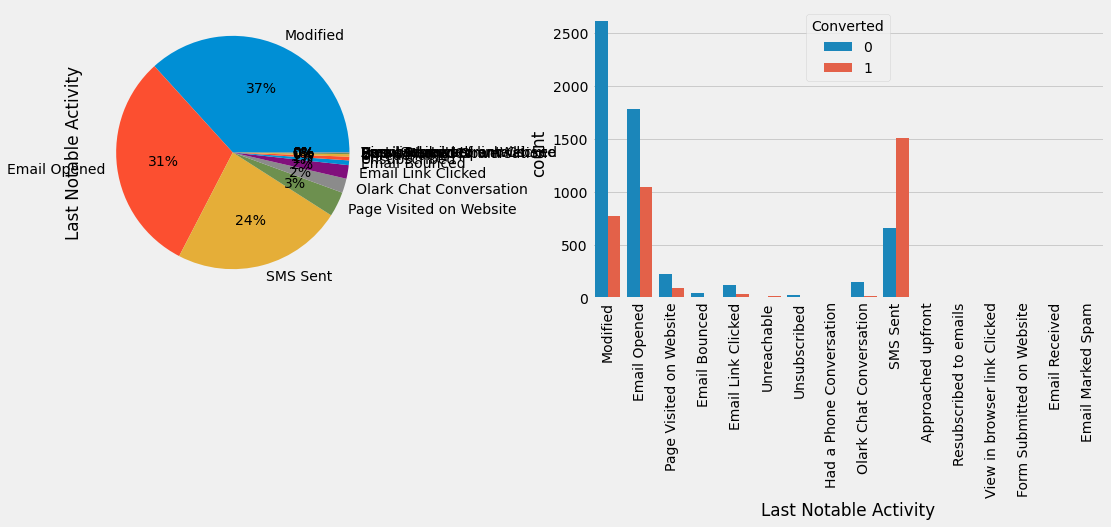

In [47]:
for i in categorical:
    print(i,"-",dfdic.loc[i][0])   # For detailed description of the feature as per data dictionary
    plt.figure(figsize=[18,5])
    
    plt.subplot(121)
    df[i].value_counts().plot.pie(autopct="%.0f%%")   # Plot 1
    
    plt.subplot(122)
    sns.countplot(df[i],hue=df.Converted) # Plot 2
    plt.xticks(rotation=90)
    
    plt.show()

In [48]:
# Initialising a list that will store the list of columns that need to be deleted

del_cols = []

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9220 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Number                               9220 non-null   int64  
 1   Lead Origin                               9220 non-null   object 
 2   Lead Source                               9220 non-null   object 
 3   Do Not Email                              9220 non-null   object 
 4   Do Not Call                               9220 non-null   object 
 5   Converted                                 9220 non-null   int64  
 6   TotalVisits                               9220 non-null   float64
 7   Total Time Spent on Website               9220 non-null   int64  
 8   Page Views Per Visit                      9220 non-null   float64
 9   Last Activity                             9220 non-null   object 
 10  Specialization                      

In [50]:
# Function is created to plot the count plot for categorical features with respect to "Converted" Feature.

def count_plot_graph(var):
    plt.figure(figsize = (18, 5))
    sns.countplot(x = var, hue = "Converted", data = df)
    plt.xticks(rotation = 90)
    plt.show()
    return

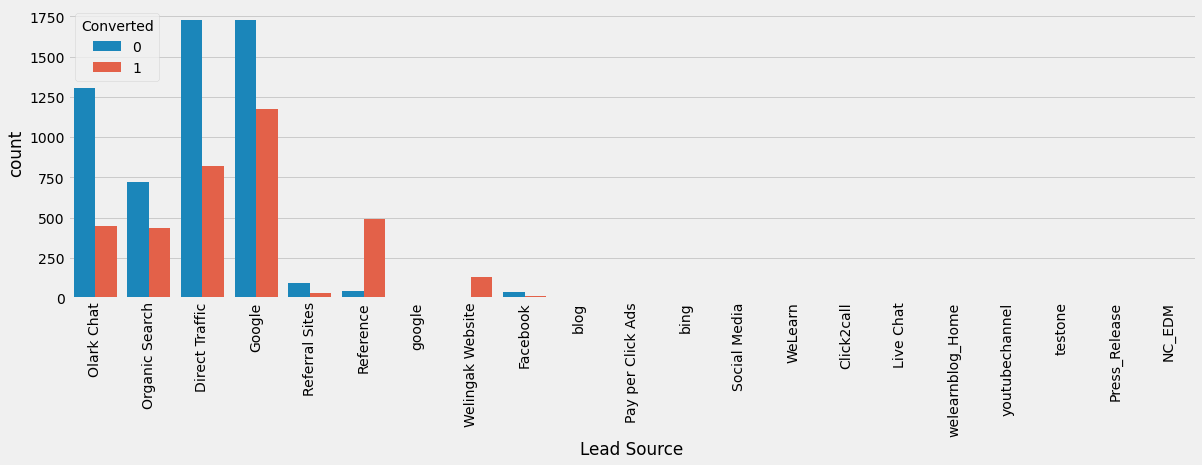

In [51]:
count_plot_graph("Lead Source")

In [52]:
100 * df["Lead Source"].value_counts(normalize = True)

Google               31.442516
Direct Traffic       27.581345
Olark Chat           19.023861
Organic Search       12.516269
Reference             5.780911
Welingak Website      1.464208
Referral Sites        1.355748
Facebook              0.531453
bing                  0.065076
google                0.054230
Click2call            0.043384
Press_Release         0.021692
Social Media          0.021692
Live Chat             0.021692
youtubechannel        0.010846
testone               0.010846
Pay per Click Ads     0.010846
welearnblog_Home      0.010846
WeLearn               0.010846
blog                  0.010846
NC_EDM                0.010846
Name: Lead Source, dtype: float64

In [53]:
# Clubbing categories having less than 0.1 percent of data to one single category named "Others"

df["Lead Source"] = df["Lead Source"].replace(["google"],"Google")
df['Lead Source'] = df['Lead Source'].replace(["bing", "Click2call", "Press_Release", "Social Media", "Live Chat", 
                                               "youtubechannel", "testone", "Pay per Click Ads", "welearnblog_Home", 
                                               "WeLearn", "blog", "NC_EDM"], 'Others')

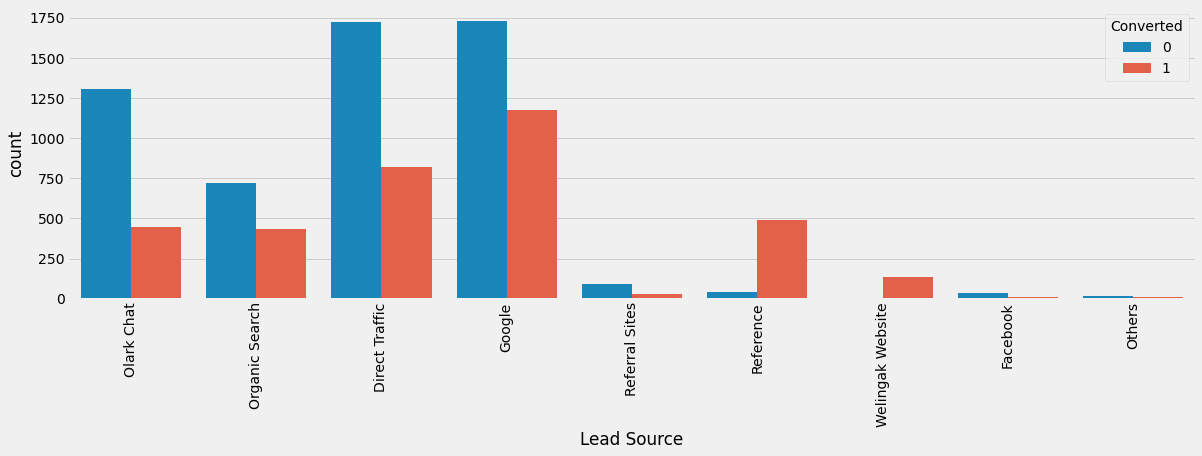

In [54]:
count_plot_graph("Lead Source")

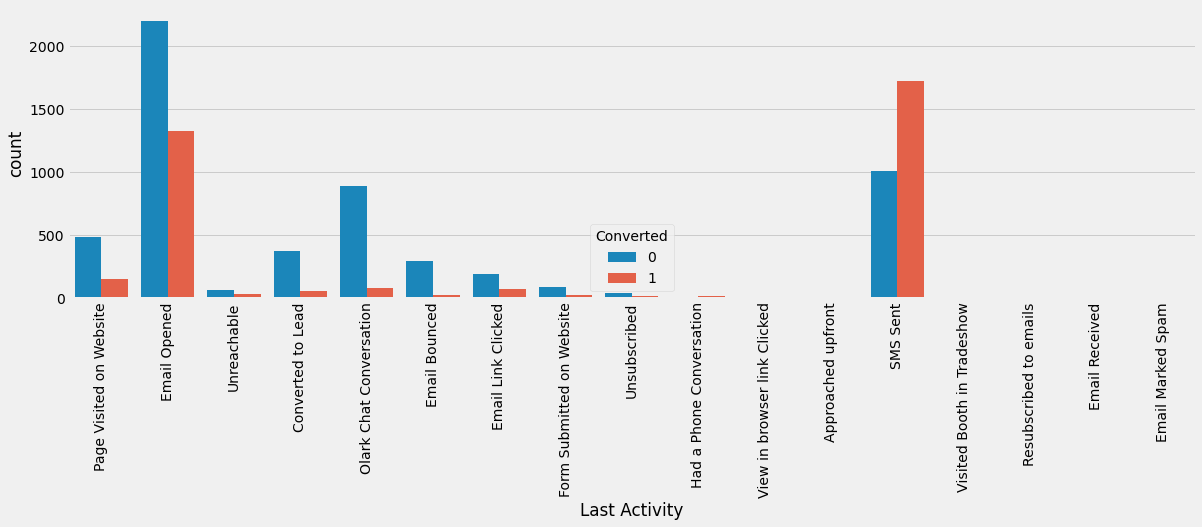

In [55]:
count_plot_graph("Last Activity")

In [56]:
100 * df["Last Activity"].value_counts(normalize = True)

Email Opened                    38.286334
SMS Sent                        29.707158
Olark Chat Conversation         10.542299
Page Visited on Website          6.941432
Converted to Lead                4.642082
Email Bounced                    3.503254
Email Link Clicked               2.895879
Form Submitted on Website        1.258134
Unreachable                      1.008677
Unsubscribed                     0.661605
Had a Phone Conversation         0.325380
Approached upfront               0.097614
View in browser link Clicked     0.065076
Email Received                   0.021692
Email Marked Spam                0.021692
Visited Booth in Tradeshow       0.010846
Resubscribed to emails           0.010846
Name: Last Activity, dtype: float64

In [57]:
# Clubbing categories having less than 0.1 percent of data to one single category named "Others"

df["Last Activity"] = df["Last Activity"].replace(["Approached upfront", "View in browser link Clicked", "Email Received", 
                                                   "Email Marked Spam", "Visited Booth in Tradeshow", 
                                                   "Resubscribed to emails"], "Others")

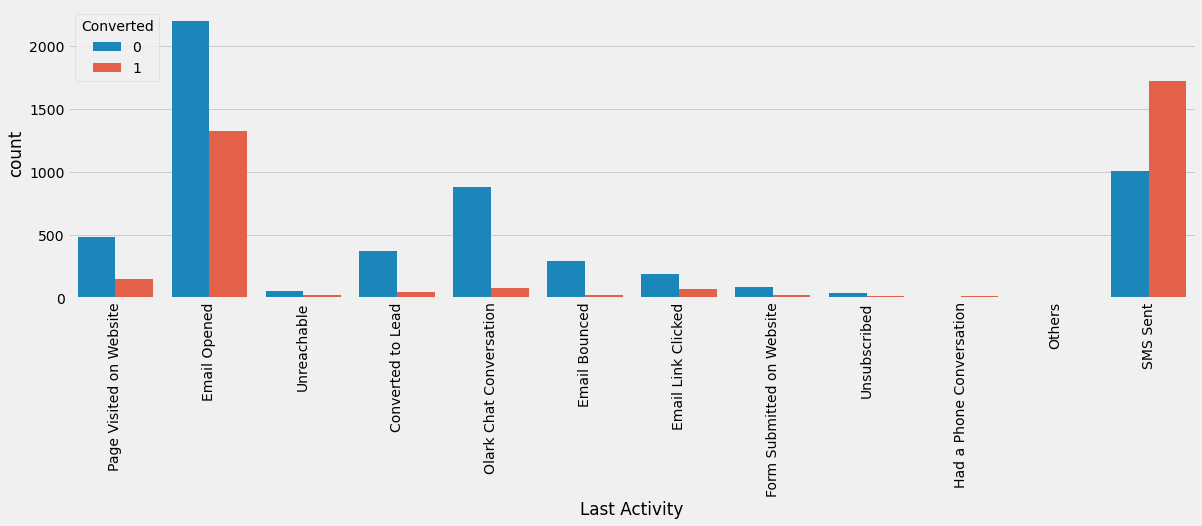

In [58]:
count_plot_graph("Last Activity")

In [59]:
# From the graph plotted above for categorical feature we can observe that
# Data belonging to one particular category i.e "NO" is present so better to delete this column
# So better to add to list of columns those we want to delete

del_cols.append("Do Not Call")

#### Continuous Variable

#### Outlier Check

TotalVisits - The total number of visits made by the customer on the website.
Median  3.0   Mean  3.439587852494577


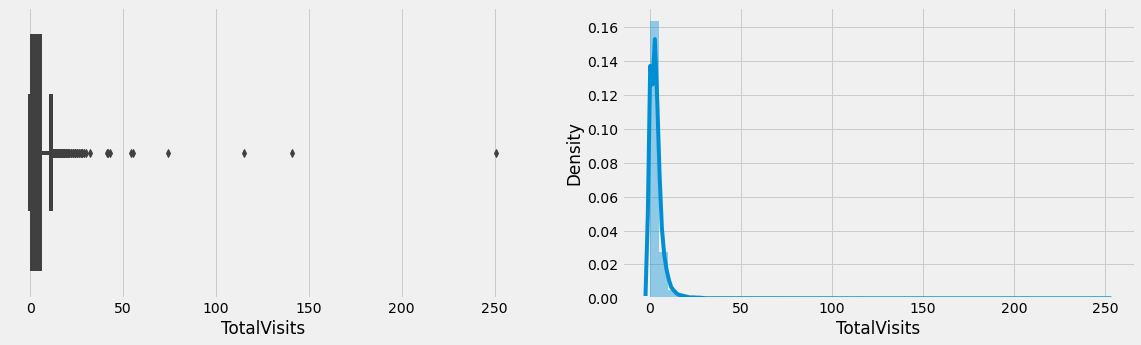

Total Time Spent on Website - The total time spent by the customer on the website.
Median  248.0   Mean  487.5872017353579


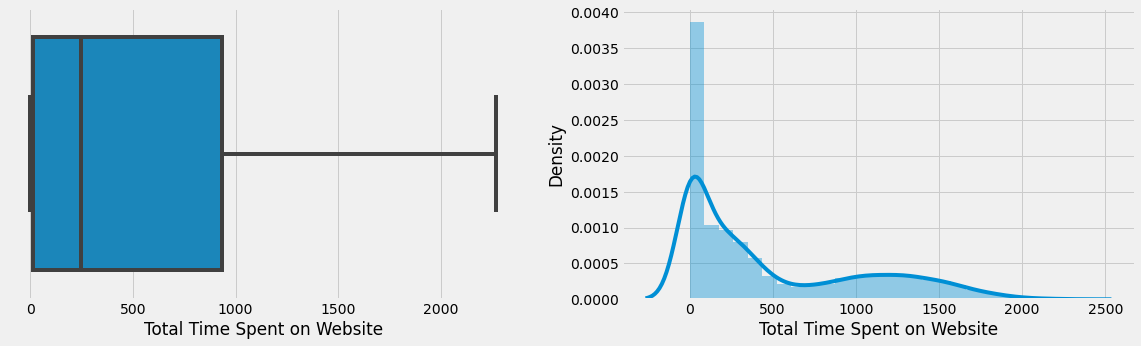

Page Views Per Visit - Average number of pages on the website viewed during the visits.
Median  2.0   Mean  2.3582158351409976


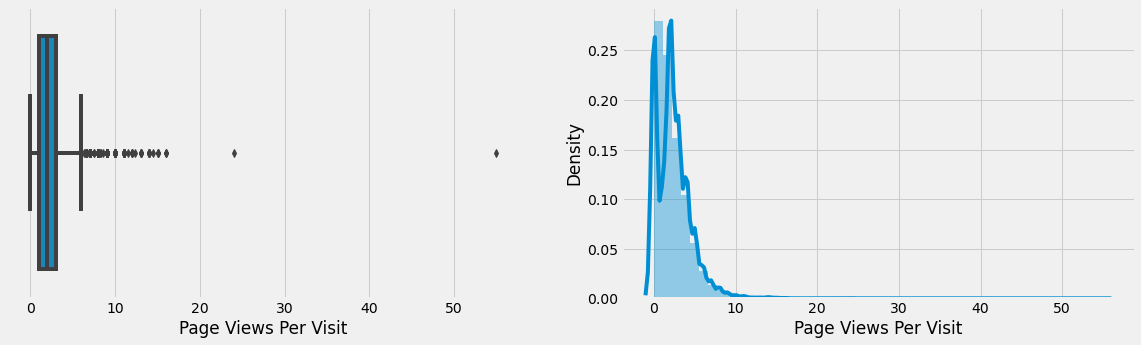

In [60]:
for i in continuous:
    plt.figure(figsize=[18,5])
    print(i,"-",dfdic.loc[i][0])
    print("Median ",df[i].median()," ","Mean ",df[i].mean())
    
    plt.subplot(121)
    sns.boxplot(df[i])    # Plot 1
    
    plt.subplot(122)
    sns.distplot(df[i])  # Plot 2
    
    plt.show()

In [61]:
# Capping and flooring the outliers so that justice can be done to the analysis.
for i in continuous:
    
    q1=np.percentile(df[i],5) # Finding the 5th percentile
    q3=np.percentile(df[i],95) # Finding the 95th percentile
   
    
    df[i]=np.where(df[i]<q1,q1,df[i]) # replacing the lower boundary outliers with 5th percentile value
    df[i]=np.where(df[i]>q3,q3,df[i]) # replacing the upper boundary outliers with 95th percentile value

TotalVisits - The total number of visits made by the customer on the website.
Median  3.0   Mean  3.179609544468547


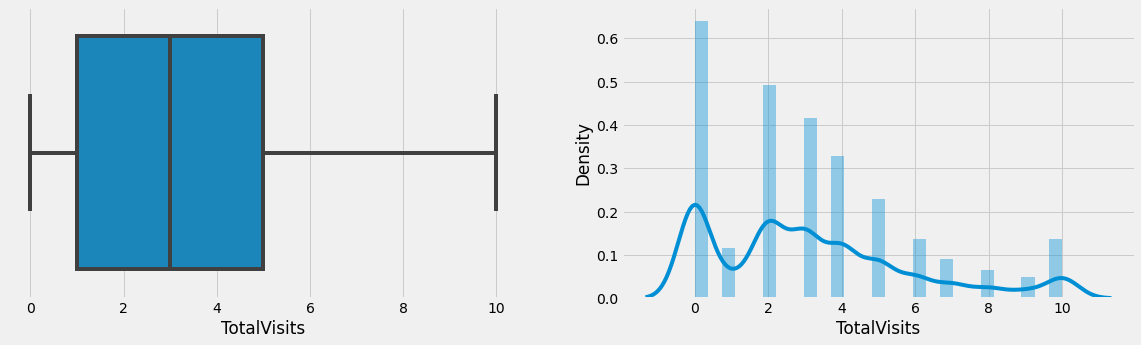

Total Time Spent on Website - The total time spent by the customer on the website.
Median  248.0   Mean  479.11475054229936


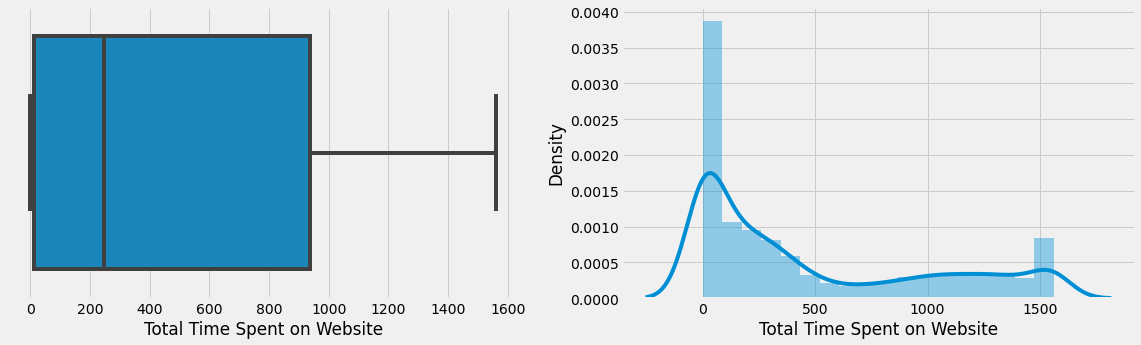

Page Views Per Visit - Average number of pages on the website viewed during the visits.
Median  2.0   Mean  2.255658351409979


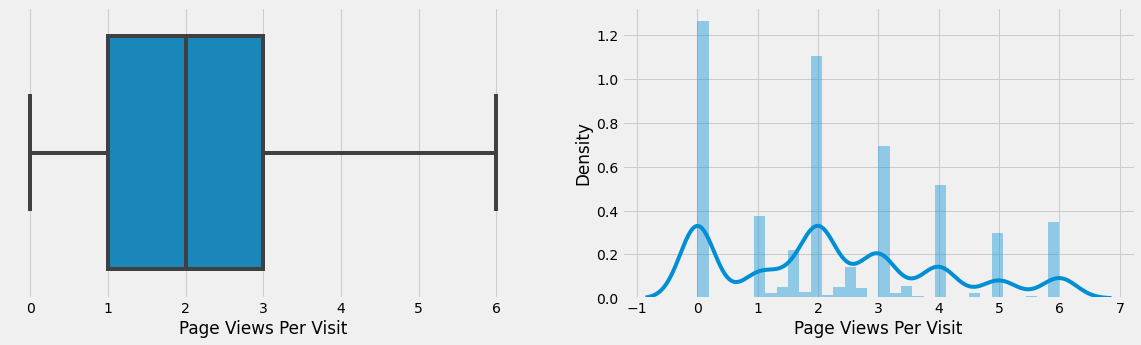

In [62]:
for i in continuous:
    plt.figure(figsize=[18,5])
    print(i,"-",dfdic.loc[i][0])
    print("Median ",df[i].median()," ","Mean ",df[i].mean())
    
    plt.subplot(121)
    sns.boxplot(df[i])    # Plot 1
    
    plt.subplot(122)
    sns.distplot(df[i])  # Plot 2
    
    plt.show()

#### Conclusion
- Most of the customers had visited the site 3 time.
- The median time Spent on Website is around 384.
- Median Page Views Per Visit is 2.5.

### Bivariate Analysis

#### Continuous-Continuous Analysis

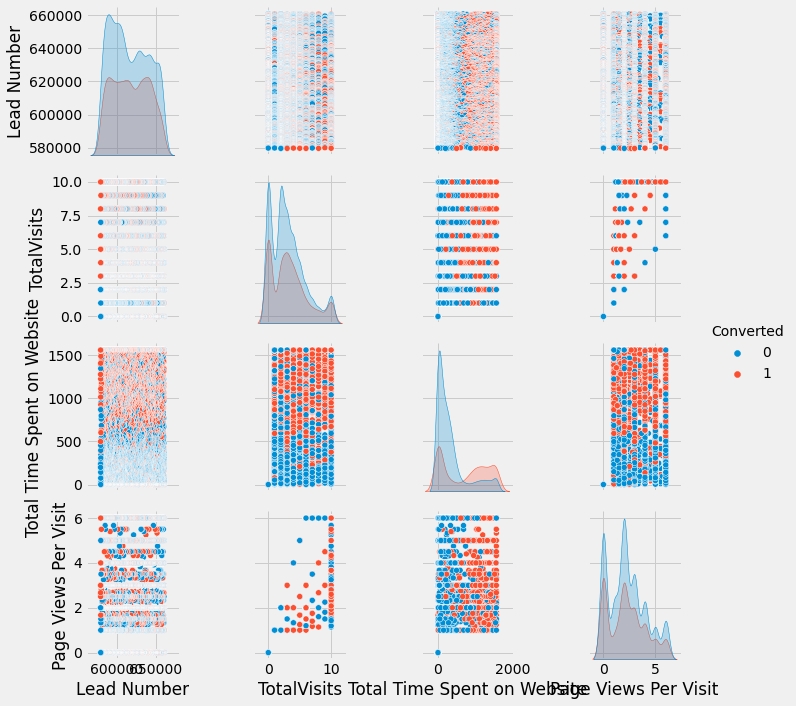

In [63]:
sns.pairplot(df,hue="Converted",diag_kind ="kde")
plt.show()

#### Conclusion
- Most of the customers before taking the course have visited the website and also spent total time >500.

#### Categorical-Continuous Analysis

Lead Origin Vs TotalVisits


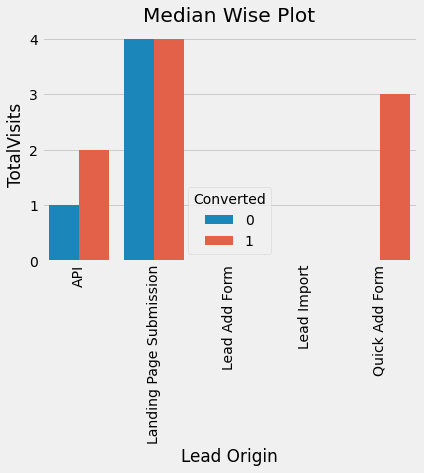

Lead Origin Vs Total Time Spent on Website


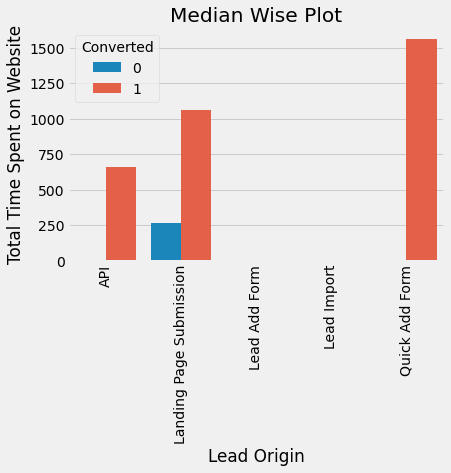

Lead Origin Vs Page Views Per Visit


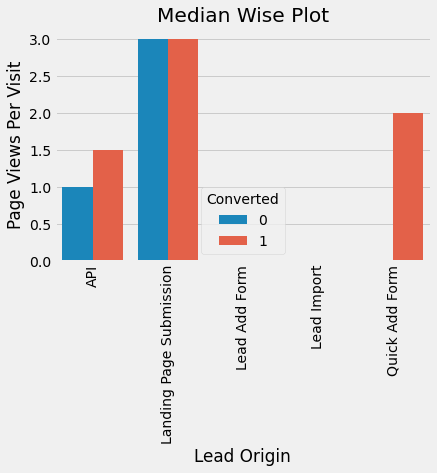

Lead Source Vs TotalVisits


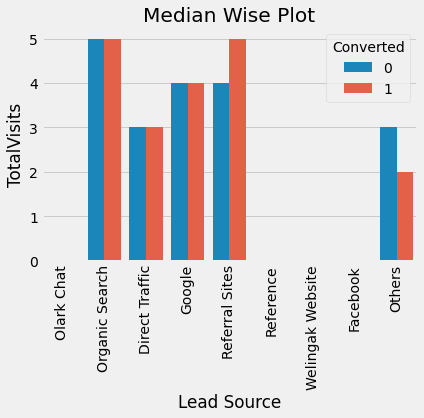

Lead Source Vs Total Time Spent on Website


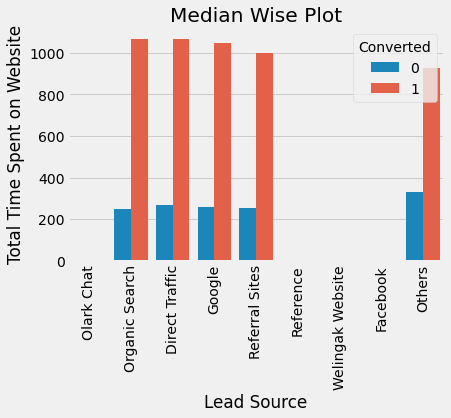

Lead Source Vs Page Views Per Visit


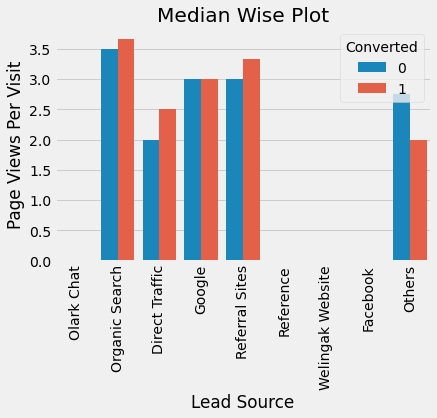

Do Not Email Vs TotalVisits


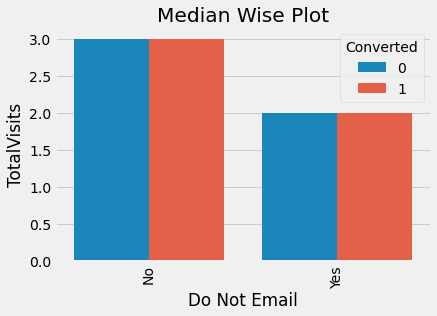

Do Not Email Vs Total Time Spent on Website


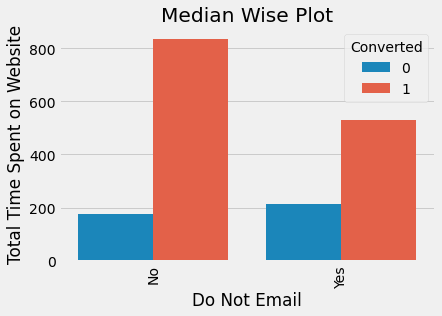

Do Not Email Vs Page Views Per Visit


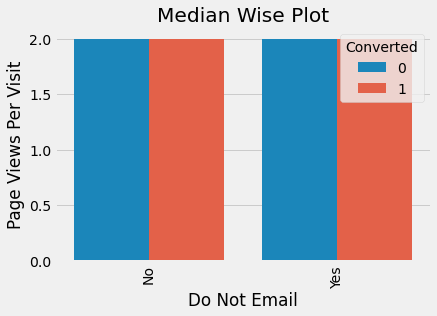

Do Not Call Vs TotalVisits


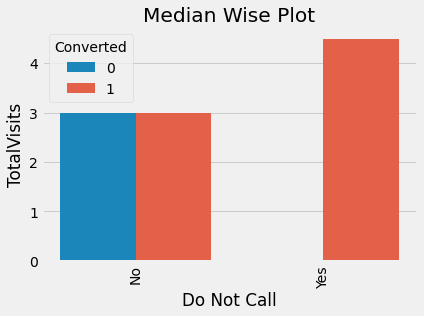

Do Not Call Vs Total Time Spent on Website


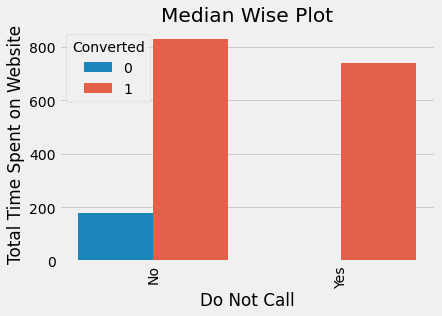

Do Not Call Vs Page Views Per Visit


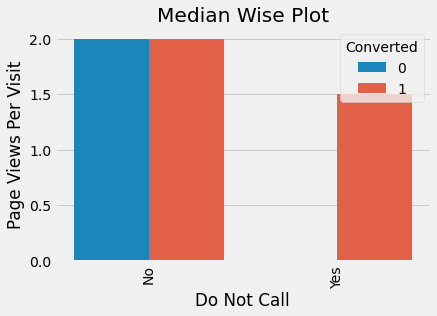

Converted Vs TotalVisits


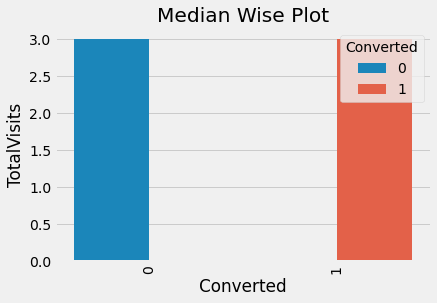

Converted Vs Total Time Spent on Website


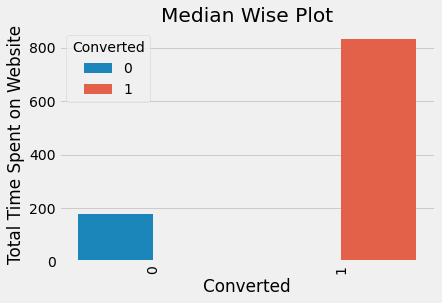

Converted Vs Page Views Per Visit


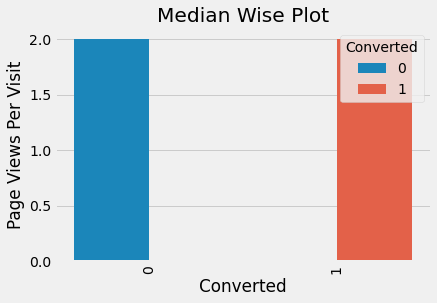

Last Activity Vs TotalVisits


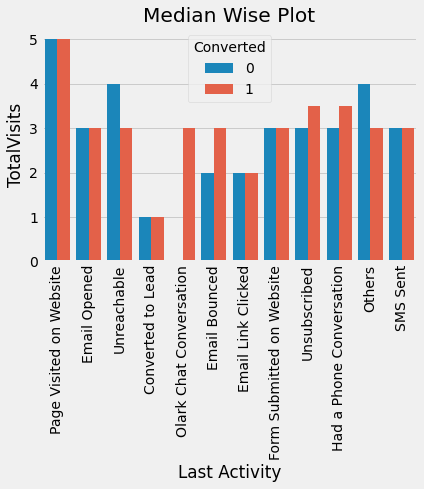

Last Activity Vs Total Time Spent on Website


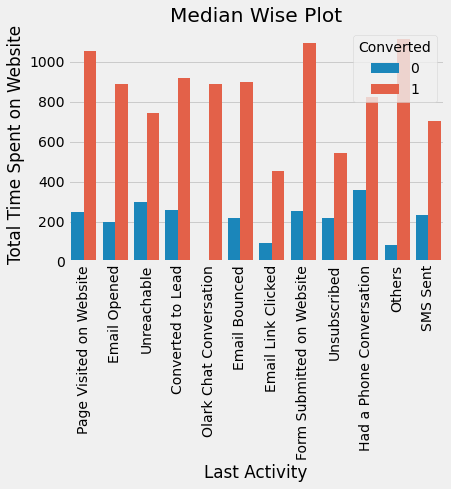

Last Activity Vs Page Views Per Visit


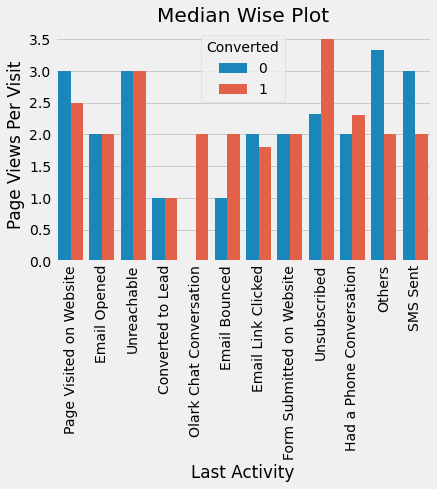

Specialization Vs TotalVisits


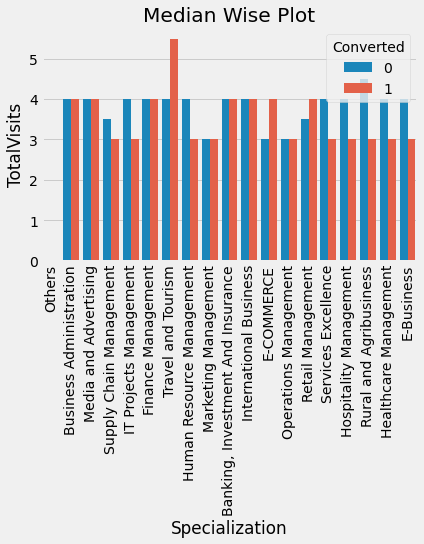

Specialization Vs Total Time Spent on Website


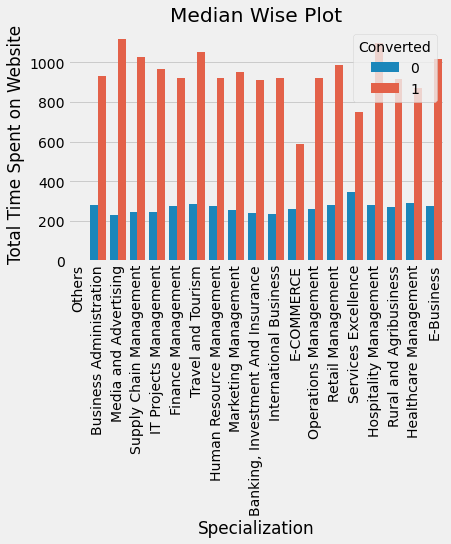

Specialization Vs Page Views Per Visit


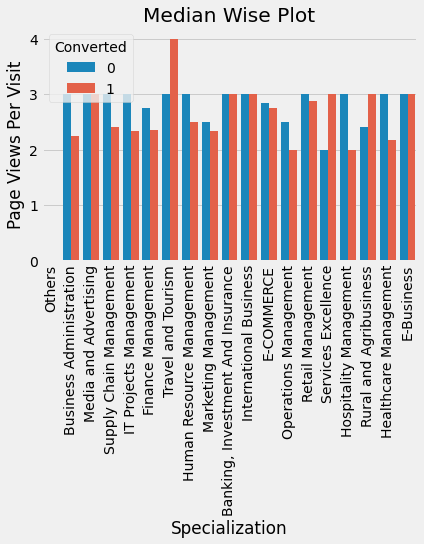

Search Vs TotalVisits


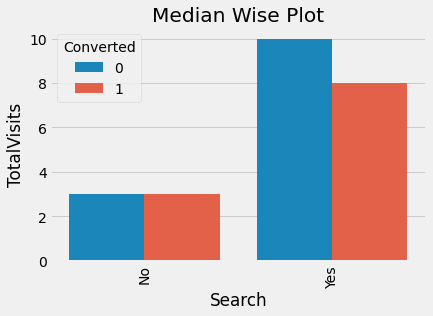

Search Vs Total Time Spent on Website


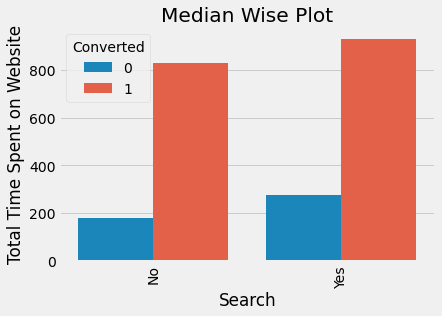

Search Vs Page Views Per Visit


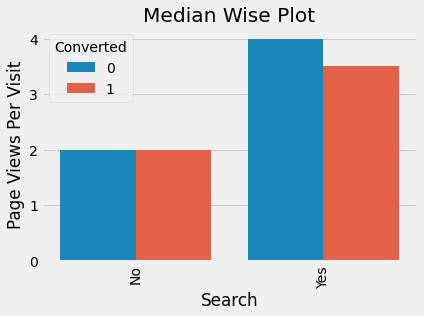

Magazine Vs TotalVisits


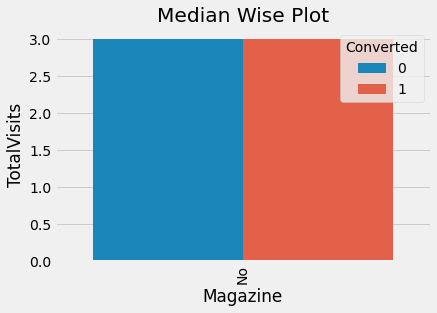

Magazine Vs Total Time Spent on Website


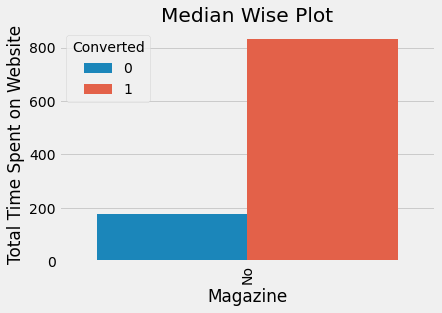

Magazine Vs Page Views Per Visit


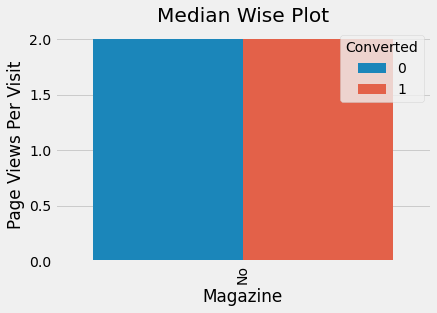

Newspaper Article Vs TotalVisits


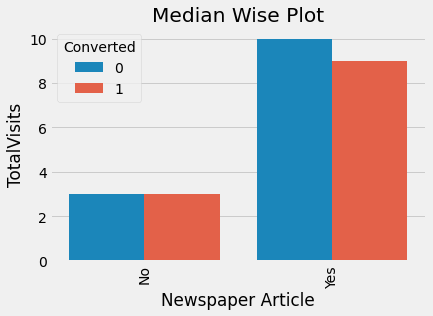

Newspaper Article Vs Total Time Spent on Website


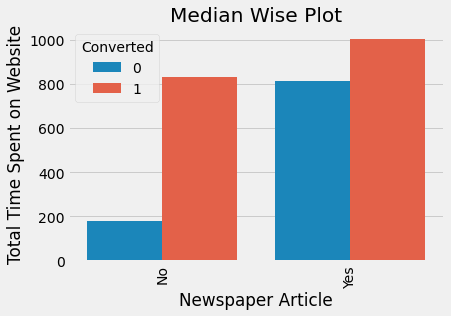

Newspaper Article Vs Page Views Per Visit


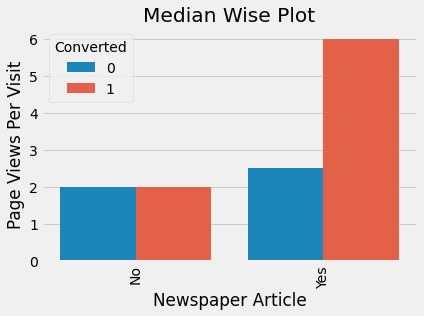

X Education Forums Vs TotalVisits


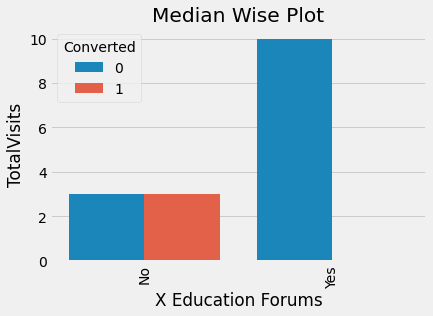

X Education Forums Vs Total Time Spent on Website


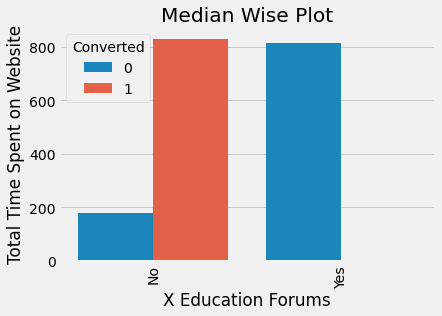

X Education Forums Vs Page Views Per Visit


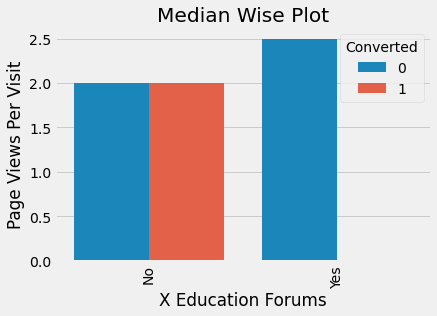

Newspaper Vs TotalVisits


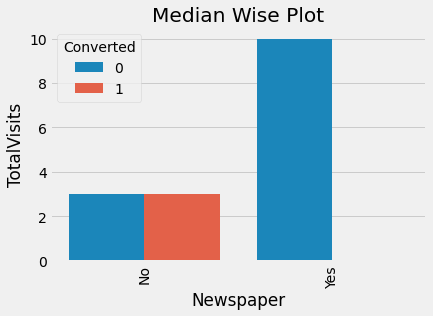

Newspaper Vs Total Time Spent on Website


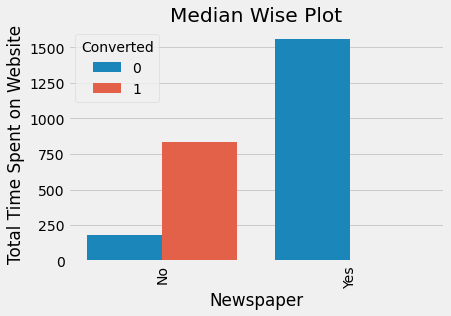

Newspaper Vs Page Views Per Visit


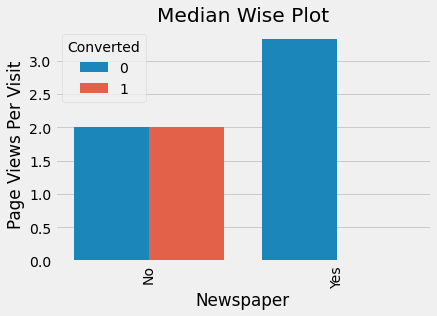

Digital Advertisement Vs TotalVisits


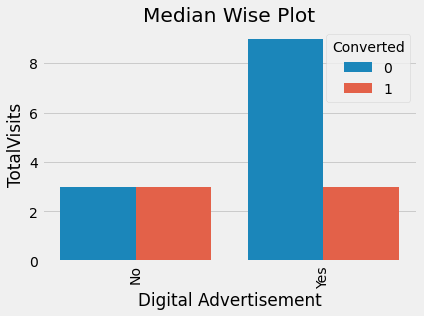

Digital Advertisement Vs Total Time Spent on Website


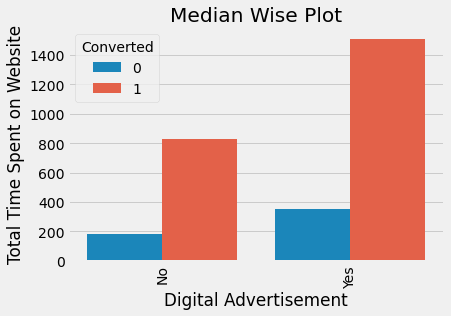

Digital Advertisement Vs Page Views Per Visit


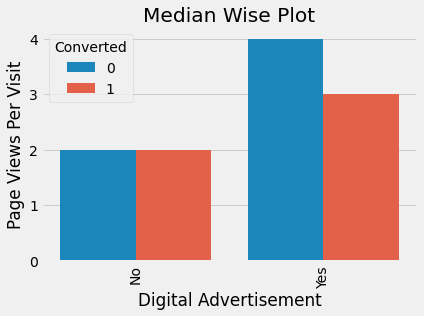

Through Recommendations Vs TotalVisits


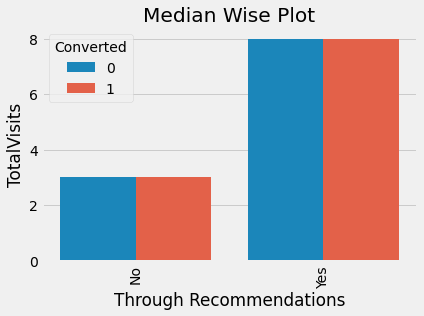

Through Recommendations Vs Total Time Spent on Website


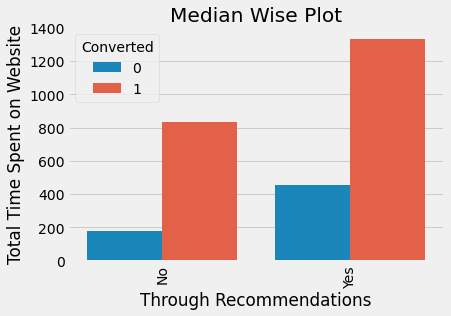

Through Recommendations Vs Page Views Per Visit


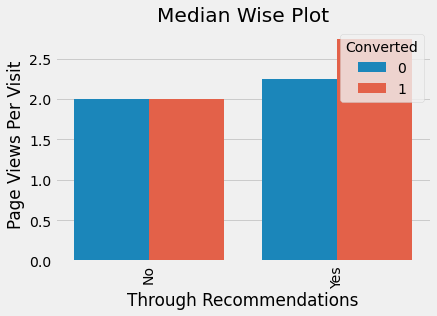

Receive More Updates About Our Courses Vs TotalVisits


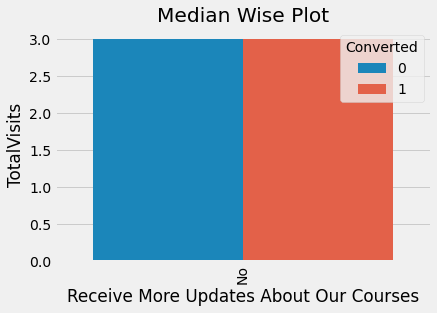

Receive More Updates About Our Courses Vs Total Time Spent on Website


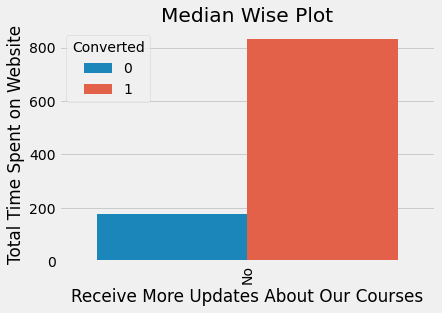

Receive More Updates About Our Courses Vs Page Views Per Visit


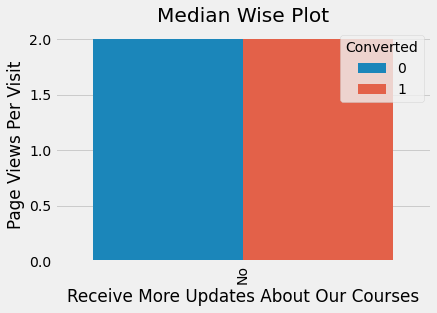

Update me on Supply Chain Content Vs TotalVisits


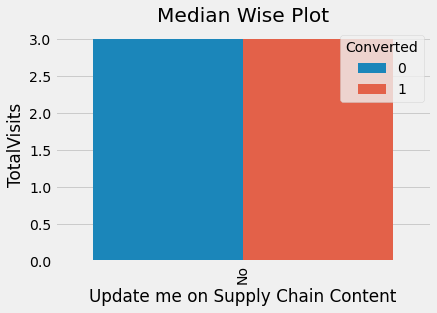

Update me on Supply Chain Content Vs Total Time Spent on Website


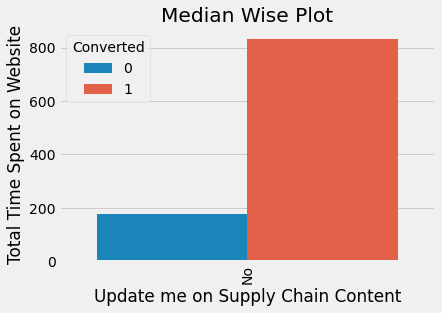

Update me on Supply Chain Content Vs Page Views Per Visit


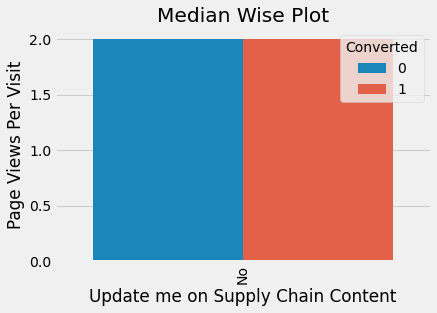

Get updates on DM Content Vs TotalVisits


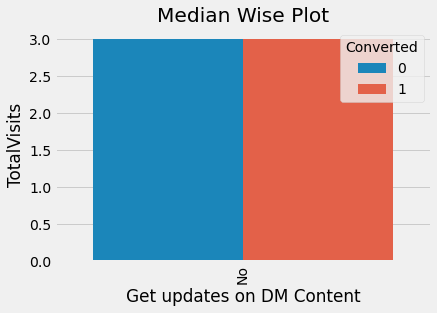

Get updates on DM Content Vs Total Time Spent on Website


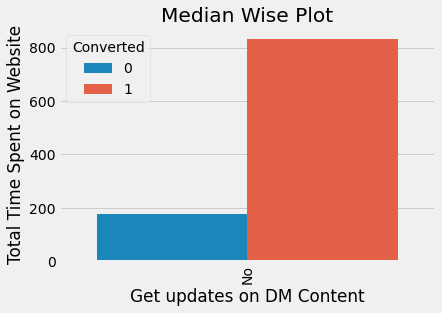

Get updates on DM Content Vs Page Views Per Visit


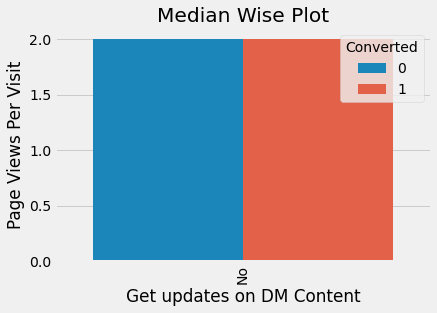

I agree to pay the amount through cheque Vs TotalVisits


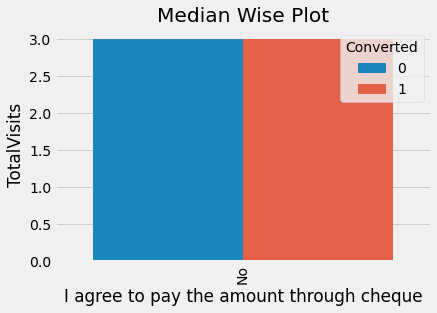

I agree to pay the amount through cheque Vs Total Time Spent on Website


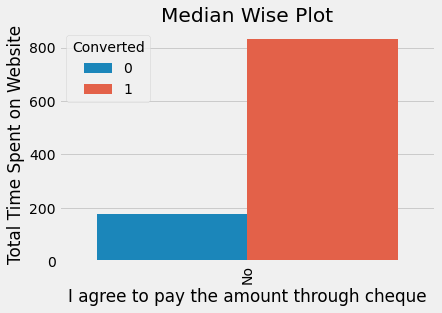

I agree to pay the amount through cheque Vs Page Views Per Visit


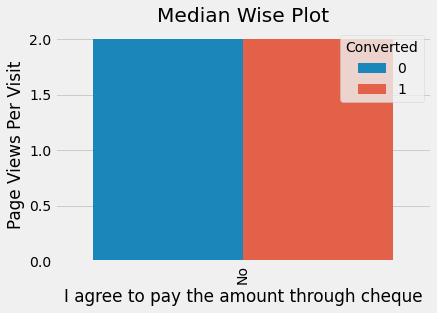

A free copy of Mastering The Interview Vs TotalVisits


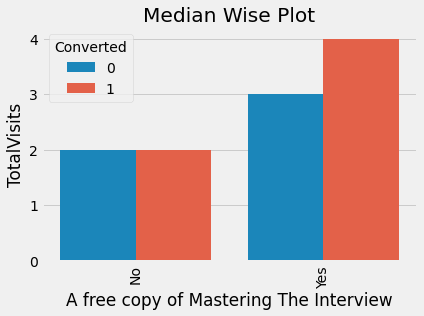

A free copy of Mastering The Interview Vs Total Time Spent on Website


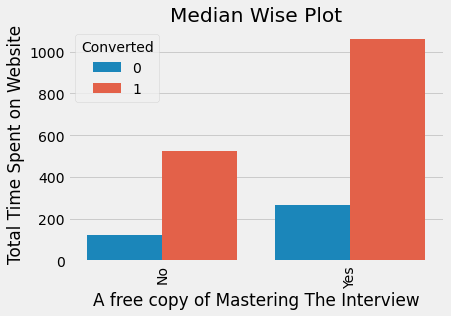

A free copy of Mastering The Interview Vs Page Views Per Visit


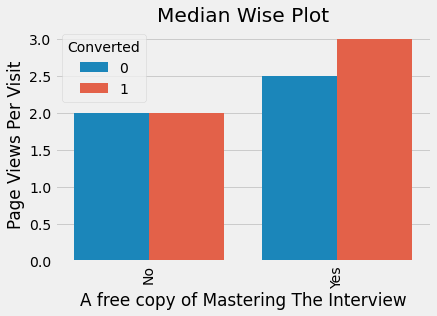

Last Notable Activity Vs TotalVisits


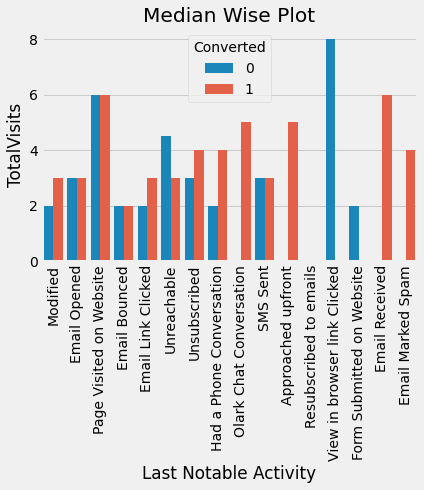

Last Notable Activity Vs Total Time Spent on Website


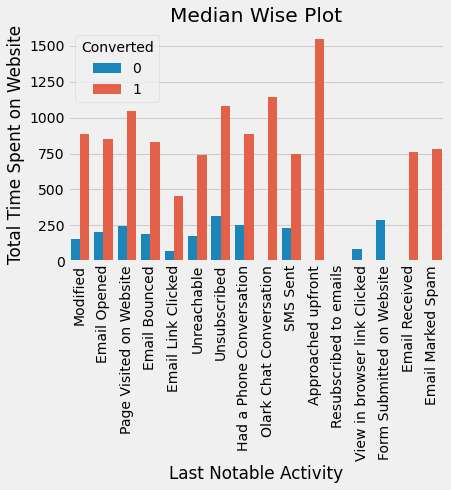

Last Notable Activity Vs Page Views Per Visit


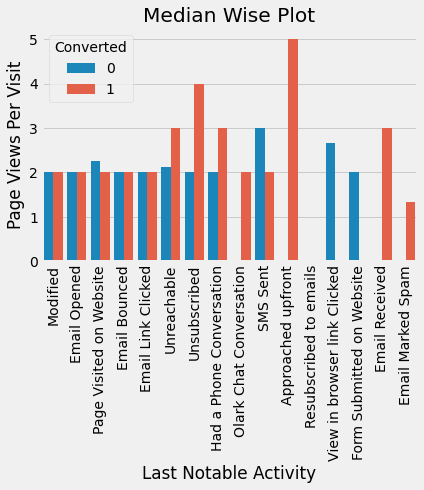

In [64]:
for i in categorical:
    for j in continuous:
        if j!="Converted":
            print(i,"Vs",j)
            
            sns.barplot(df[i],df[j],ci=None,estimator=np.median,hue=df.Converted)
            plt.title("Median Wise Plot")
            plt.xticks(rotation=90)
            
        plt.show()

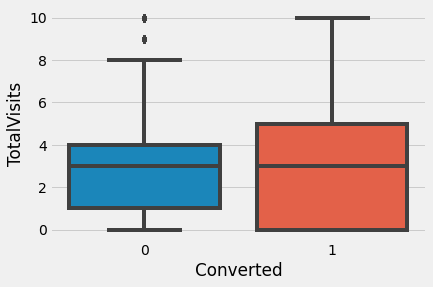

In [65]:
# Ploting with "Converted" Column to draw influence on conversion rate

sns.boxplot(y = "TotalVisits", x = "Converted", data = df)
plt.show()

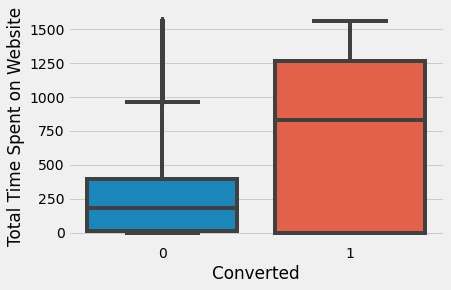

In [66]:
# Ploting with "Converted" Column to draw its influence on conversion rate

sns.boxplot(y = "Total Time Spent on Website", x = "Converted", data = df)
plt.show()

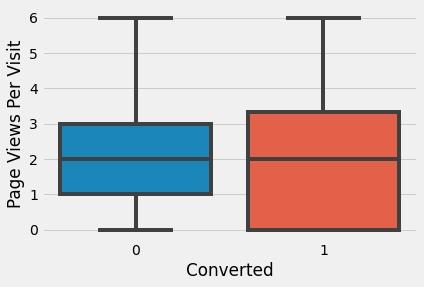

In [67]:
# Ploting with "Converted" Column to draw its influence on conversion rate

sns.boxplot(y = "Page Views Per Visit", x = "Converted", data = df)
plt.show()

#### Observation
- Median values for converted is high than median value for not converted which shows that
- The more time spent by people on the website more is the chance of conversion

#### Let's drop few columns which are redundant and not of much use for our model as they are highly imbalanced .

- As "Last Activity" and "Last Notable Activity" seem to deliver the similar information so we will drop "Last Activity"

In [68]:
# From the graph plotted above for categorical feature we can observe that
# In that data present in that column is heavily biased towards one particular category
# So it it will not help in our analysis.So better to add to list of columns those we want to delete

del_cols.append("Search")

In [69]:
# From the graph plotted above for categorical feature we can observe that
# Data belonging to one particular category i.e "NO" is present so better to delete this column
# So better to add to list of columns those we want to delete

del_cols.append("Magazine")

In [70]:
# From the graph plotted above for categorical feature we can observe that
# Data belonging to one particular category i.e "NO" is present so better to delete this column
# So better to add to list of columns those we want to delete

del_cols.append("Newspaper Article")

In [71]:
# From the graph plotted above for categorical feature we can observe that
# Data belonging to one particular category i.e "NO" is present so better to delete this column
# So better to add to list of columns those we want to delete

del_cols.append("X Education Forums")

In [72]:
# From the graph plotted above for categorical feature we can observe that
# Data belonging to one particular category i.e "NO" is present so better to delete this column
# So better to add to list of columns those we want to delete

del_cols.append("Newspaper")

In [73]:
# From the graph plotted above for categorical feature we can observe that
# Data belonging to one particular category i.e "NO" is present so better to delete this column
# So better to add to list of columns those we want to delete

del_cols.append("Digital Advertisement")

In [74]:
# From the graph plotted above for categorical feature we can observe that
# In that data present in that column is heavily biased towards one particular category
# So it it will not help in our analysis.So better to add to list of columns those we want to delete

del_cols.append("Through Recommendations")

In [75]:
# From the graph plotted above for categorical feature we can observe that
# Data belonging to one particular category i.e "NO" is present so better to delete this column
# So better to add to list of columns those we want to delete

del_cols.append("Receive More Updates About Our Courses")

In [76]:
# From the graph plotted above for categorical feature we can observe that
# Data belonging to one particular category i.e "NO" is present so better to delete this column
# So better to add to list of columns those we want to delete

del_cols.append("Update me on Supply Chain Content")

In [77]:
# From the graph plotted above for categorical feature we can observe that
# Data belonging to one particular category i.e "NO" is present so better to delete this column
# So better to add to list of columns those we want to delete

del_cols.append("Get updates on DM Content")

In [78]:
# From the graph plotted above for categorical feature we can observe that
# Data belonging to one particular category i.e "NO" is present so better to delete this column
# So better to add to list of columns those we want to delete

del_cols.append("I agree to pay the amount through cheque")

In [79]:
# From the graph plotted above for categorical feature we can observe that
# In that data present in that column is heavily biased towards one particular category
# So it it will not help in our analysis.So better to add to list of columns those we want to delete

del_cols.append("Do Not Email")

In [80]:
# From the graph plotted above for categorical feature we can observe that
# Both "Last Activity" and "Last Notable Activity" columns are simillar so Better to keep only one column for analysis
# So add other one to list of columns those we want to delete 

del_cols.append("Last Activity")

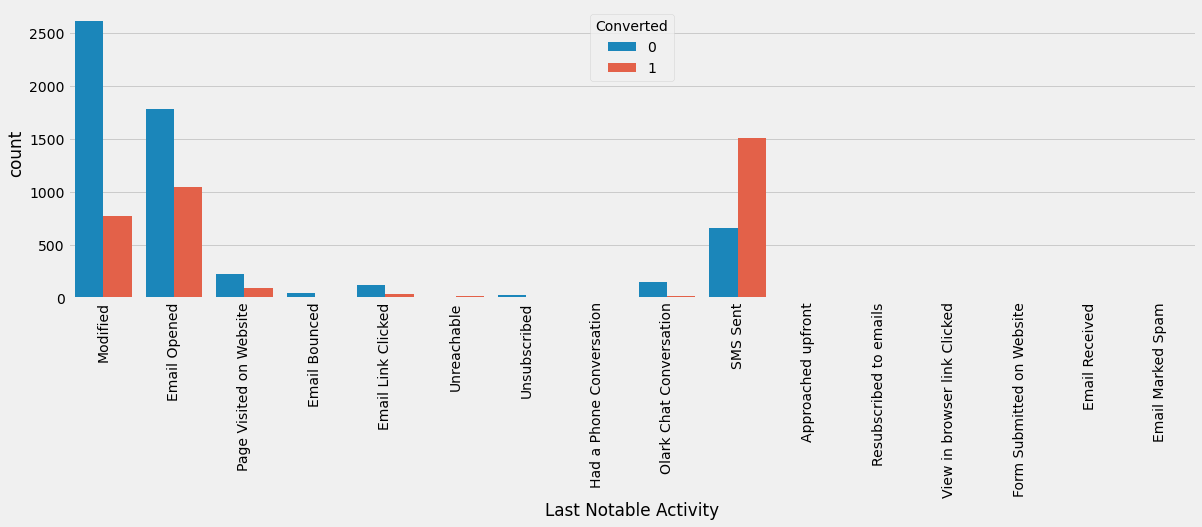

In [81]:
count_plot_graph("Last Notable Activity")

In [82]:
100 * (df["Last Notable Activity"].value_counts(normalize = True))

Modified                        36.735358
Email Opened                    30.661605
SMS Sent                        23.557484
Page Visited on Website          3.449024
Olark Chat Conversation          1.984816
Email Link Clicked               1.876356
Email Bounced                    0.650759
Unsubscribed                     0.509761
Unreachable                      0.347072
Had a Phone Conversation         0.151844
Email Marked Spam                0.021692
Approached upfront               0.010846
Resubscribed to emails           0.010846
View in browser link Clicked     0.010846
Form Submitted on Website        0.010846
Email Received                   0.010846
Name: Last Notable Activity, dtype: float64

In [83]:
# Clubbing categories having less than 0.1 percent of data to one single category named "Others"

df["Last Notable Activity"] = df["Last Notable Activity"].replace(["Email Marked Spam", "Approached upfront", 
                                                                   "Resubscribed to emails", "View in browser link Clicked", 
                                                                   "Form Submitted on Website", 
                                                                   "Email Received"], "Other_Activity")

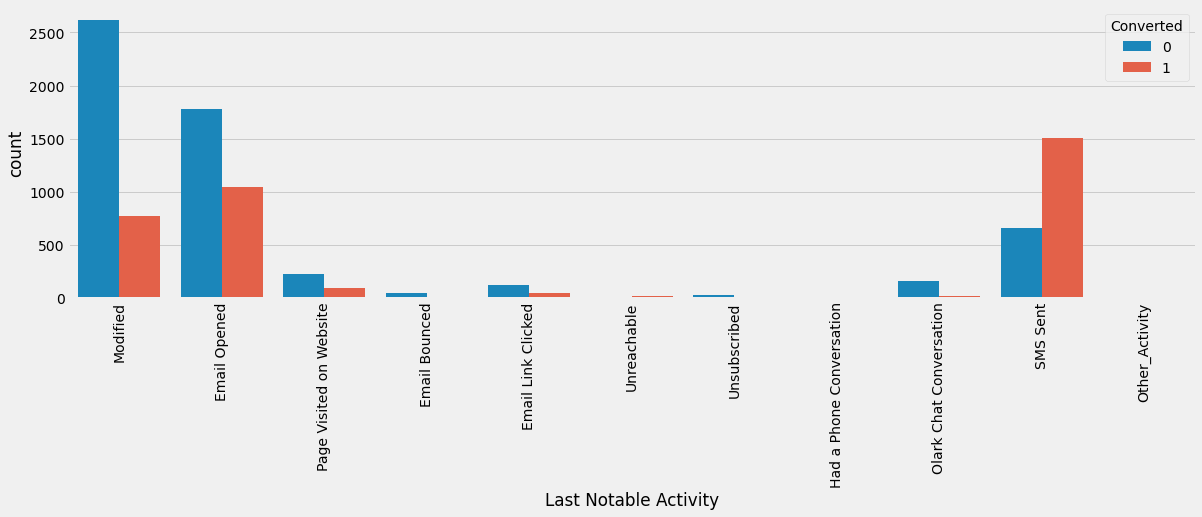

In [84]:
count_plot_graph("Last Notable Activity")

##### Actions based on above univariate and bivariate analysis

In [85]:
# Deleting unnecesssary features those we stored in the list of features named "del_cols"

df.drop(columns = del_cols, inplace = True)

In [86]:
# Showing list of features those are present in the dataframe

df.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Specialization',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

### Multivariate Analysis

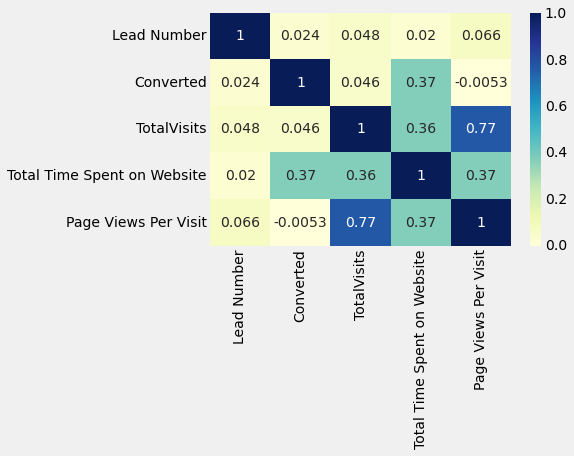

In [87]:
# Finding Correlation between numeric features

sns.heatmap(df.corr(), annot = True, cmap = "YlGnBu")
plt.show()

### Prepraring the data for Model Building

In [88]:
# Updating the categorical list

categorical=['Lead Number', 'Lead Origin', 'Lead Source', 'Converted',
       'Specialization', 'A free copy of Mastering The Interview',
       'Last Notable Activity']

# Sanity Check

print(len(df.columns)==(len(categorical)+len(continuous)+2))

False


Lead Origin - The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc.
Landing Page Submission    4886
API                        3579
Lead Add Form               705
Lead Import                  49
Quick Add Form                1
Name: Lead Origin, dtype: int64


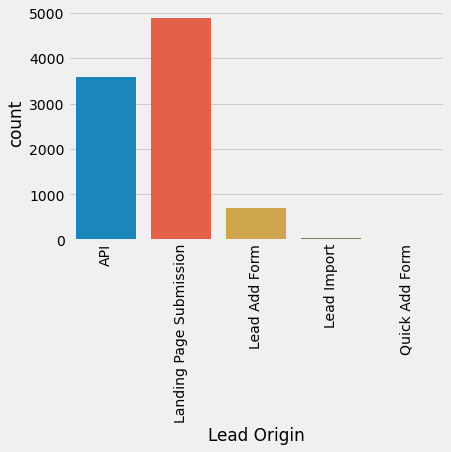

Lead Source - The source of the lead. Includes Google, Organic Search, Olark Chat, etc.
Google              2904
Direct Traffic      2543
Olark Chat          1754
Organic Search      1154
Reference            533
Welingak Website     135
Referral Sites       125
Facebook              49
Others                23
Name: Lead Source, dtype: int64


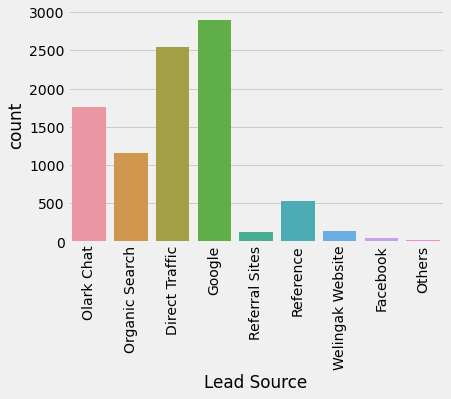

Specialization - The industry domain in which the customer worked before. Includes the level 'Select Specialization' which means the customer had not selected this option while filling the form.
Others                               3360
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: S

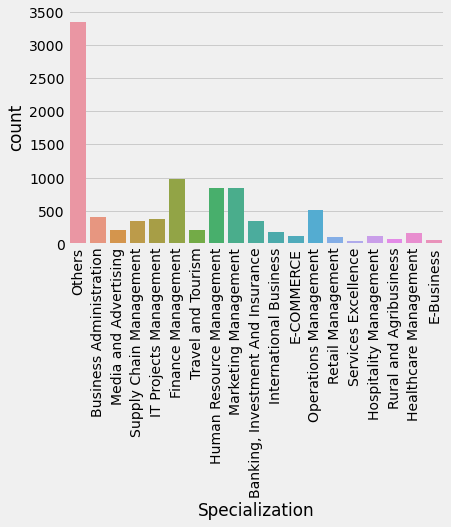

A free copy of Mastering The Interview - Indicates whether the customer wants a free copy of 'Mastering the Interview' or not.
No     6332
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64


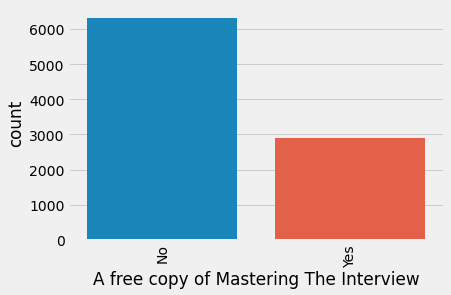

Last Notable Activity - The last notable acitivity performed by the student.
Modified                    3387
Email Opened                2827
SMS Sent                    2172
Page Visited on Website      318
Olark Chat Conversation      183
Email Link Clicked           173
Email Bounced                 60
Unsubscribed                  47
Unreachable                   32
Had a Phone Conversation      14
Other_Activity                 7
Name: Last Notable Activity, dtype: int64


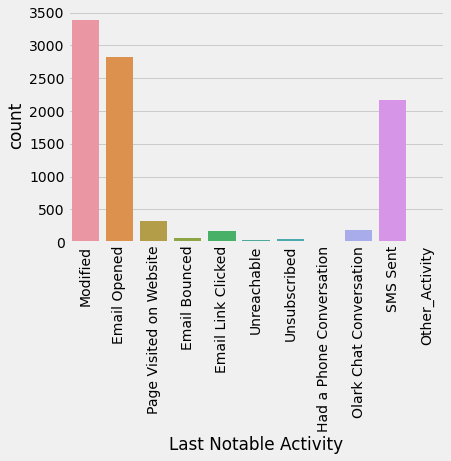

In [89]:
# Checking the redundany of the features based on the input in them and the description of the feature

for i in categorical:
    if i!="Converted" and i!="Lead Number":
        print(i,"-",dfdic.loc[i][0]) # For detailed description of the feature as per data dictionary
        print(df[i].value_counts())
        sns.countplot(df[i])
        plt.xticks(rotation=90)
        plt.show()

### Step 4: Data Preparation

### Dummy Creation

Let's check for all binary categorical features

In [90]:
variable=[]
for i in df.columns:
    if df[i].nunique()==2 and i!="Converted":
        print(i," ",df[i].nunique()," ",df[i].unique())
        variable.append(i)

A free copy of Mastering The Interview   2   ['No' 'Yes']


In [91]:
# Converting the Yes and No to 1 and 0 respectively

df["A free copy of Mastering The Interview"]=df["A free copy of Mastering The Interview"].map({"Yes":1,"No":0})

In [92]:
df.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Specialization',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [93]:
# Updating the categorical feature list

categorical=['Lead Number', 'Lead Origin', 'Lead Source', 'Converted',
       'Specialization', 'A free copy of Mastering The Interview',
       'Last Notable Activity']

# Sanity Check

print(len(df.columns)==(len(categorical)+len(continuous)+2))

False


In [94]:
# Checking the features with the value counts > 2 and the respective value in it 

for i in categorical:
    if df[i].nunique()>2 and i!="Converted":
        print(i," ",df[i].nunique()," ",df[i].unique())

Lead Number   9220   [660737 660728 660727 ... 579545 579538 579533]
Lead Origin   5   ['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import'
 'Quick Add Form']
Lead Source   9   ['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Reference' 'Welingak Website' 'Facebook' 'Others']
Specialization   19   ['Others' 'Business Administration' 'Media and Advertising'
 'Supply Chain Management' 'IT Projects Management' 'Finance Management'
 'Travel and Tourism' 'Human Resource Management' 'Marketing Management'
 'Banking, Investment And Insurance' 'International Business' 'E-COMMERCE'
 'Operations Management' 'Retail Management' 'Services Excellence'
 'Hospitality Management' 'Rural and Agribusiness' 'Healthcare Management'
 'E-Business']
Last Notable Activity   11   ['Modified' 'Email Opened' 'Page Visited on Website' 'Email Bounced'
 'Email Link Clicked' 'Unreachable' 'Unsubscribed'
 'Had a Phone Conversation' 'Olark Chat Conversation' 'SMS Sent'
 'Other_Acti

In [95]:
# For Cateorical feature with multiple categories create dummy variables(one-hot-encoded)

# Creating dummy variable for some of the cateorical feature and droping the first one
dummy1 = pd.get_dummies(df[["Lead Origin", "Lead Source", "Specialization", "Last Notable Activity"]], drop_first = True)

# Adding the results to master dataframe
df = pd.concat([df, dummy1], axis = 1)

print("After concating dummy dataframe the shape of master dataframe: ", df.shape)

After concating dummy dataframe the shape of master dataframe:  (9220, 50)


In [96]:
# We have created dummies for the below variables, so we can drop them

df.drop(df[["Lead Origin", "Lead Source", "Specialization", "Last Notable Activity"]], axis = 1, inplace = True)
df.shape

(9220, 46)

In [97]:
df.head()

Lead Number  Converted  TotalVisits  Total Time Spent on Website  \
0       660737          0          0.0                          0.0   
1       660728          0          5.0                        674.0   
2       660727          1          2.0                       1532.0   
3       660719          0          1.0                        305.0   
4       660681          1          2.0                       1428.0   

   Page Views Per Visit  A free copy of Mastering The Interview  \
0                   0.0                                       0   
1                   2.5                                       0   
2                   2.0                                       1   
3                   1.0                                       0   
4                   1.0                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  ...  \
0                        0                           0  ...   
1                        0                           0  ...   
2                        0                           0  ...   
3                        0                           0  ...   
4                        0                           0  ...   

   Last Notable Activity_Email Link Clicked  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   Last Notable Activity_Email Opened  \
0                                   0   
1                                   1   
2                                   1   
3                                   0   
4                                   0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Other_Activity  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                             

### Step 5: Train-Test Split

In [98]:
# Importing Required Library

from sklearn.model_selection import train_test_split

In [99]:
# Putting feature variable to X

X = df.drop(["Converted", "Lead Number"], axis = 1)
X.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                          0.0                   0.0   
1          5.0                        674.0                   2.5   
2          2.0                       1532.0                   2.0   
3          1.0                        305.0                   1.0   
4          2.0                       1428.0                   1.0   

   A free copy of Mastering The Interview  \
0                                       0   
1                                       0   
2                                       1   
3                                       0   
4                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           0                     0   
3                        0                           0                     0   
4                        0                           0                     0   

   Lead Source_Google  ...  Last Notable Activity_Email Link Clicked  \
0                   0  ...                                         0   
1                   0  ...                                         0   
2                   0  ...                                         0   
3                   0  ...                                         0   
4                   1  ...                                         0   

   Last Notable Activity_Email Opened  \
0                                   0   
1                                   1   
2                                   1   
3                                   0   
4                                   0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Other_Activity  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                         

In [100]:
Y = df["Converted"]

Y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [101]:
# Splitting the data into train and test Set

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100)

### Step 6: Feature Scaling

In [102]:
# Importing Required Library

from sklearn.preprocessing import StandardScaler

In [103]:
# For bringing numerical continous variable to one single scale

# Create object of StandardScaler
scaler = StandardScaler()

# Apply Scaler to numerical Columns
X_train[continuous] = scaler.fit_transform(X_train[continuous])

X_train.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
6159    -0.069681                    -0.840326              0.423649   
3918     0.290384                     1.237977              0.989023   
2190     2.450777                    -0.347202              2.119771   
4281     2.090711                     1.438250              2.119771   
8886    -0.429746                     1.544054             -0.707100   

      A free copy of Mastering The Interview  \
6159                                       1   
3918                                       0   
2190                                       1   
4281                                       1   
8886                                       0   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
6159                                    1                          0   
3918                                    1                          0   
2190                                    1                          0   
4281                                    1                          0   
8886                                    0                          0   

      Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
6159                        0                           0   
3918                        0                           0   
2190                        0                           0   
4281                        0                           0   
8886                        0                           0   

      Lead Source_Facebook  Lead Source_Google  ...  \
6159                     0                   0  ...   
3918                     0                   1  ...   
2190                     0                   0  ...   
4281                     0                   0  ...   
8886                     0                   1  ...   

      Last Notable Activity_Email Link Clicked  \
6159                                         0   
3918                                         0   
2190                                         0   
4281                                         0   
8886                                         0   

      Last Notable Activity_Email Opened  \
6159                                   1   
3918                                   1   
2190                                   0   
4281                                   0   
8886                                   0   

      Last Notable Activity_Had a Phone Conversation  \
6159                                               0   
3918                                               0   
2190                                               0   
4281                                               0   
8886                                               0   

      Last Notable Activity_Modified  \
6159                               0   
3918                               0   
2190                               1   
4281                               0   
8886                               1   

      Last Notable Activity_Olark Chat Conversation  \
6159                                              0   
3918                                              0   
2190                                              0   
4281                                              0   
8886                                              0   

      Last Notable Activity_Other_Activity  \
6159                                     0   
3918                                     0   
2190                                     0   
4281                                     0   
8886                                     0   

      Last Notable Activity_Page Visited on Website  \
6159                                              0   
3918                                              0   
2190                                              0   
4281                                              0   
8886                                              0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachabl

### Step 7: Model Building

In [104]:
# Importing Important Library

import statsmodels.api as sm

#### MODEL 1

In [105]:
# Logistic Regression Model

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6454
Model:                            GLM   Df Residuals:                     6409
Model Family:                Binomial   Df Model:                           44
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2831.6
Date:                Mon, 02 Jan 2023   Deviance:                       5663.2
Time:                        19:21:41   Pearson chi2:                 6.45e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3672
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -0.7272      0.510     -1.427      0.154      -1.726       0.272
TotalVisits                                        0.2803      0.053      5.303      0.000       0.177       0.384
Total Time Spent on Website                        1.0839      0.038     28.162      0.000       1.008       1.159
Page Views Per Visit                              -0.3189      0.059     -5.402      0.000      -0.435      -0.203
A free copy of Mastering The Interview            -0.2619      0.102     -2.573      0.010      -0.462      -0.062
Lead Origin_Landing Page Submission               -0.9242      0.130     -7.085      0.000      -1.180      -0.669
Lead Origin_Lead Add Form                          3.2130      0.681      4.721      0.000       1.879       4.547
Lead Origin_Lead Import                           19.7633   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Lead Origin_Quick Add Form                        18.6937   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Lead Source_Facebook                             -19.1118   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Lead Source_Google                                 0.2239      0.109      2.052      0.040       0.010       0.438
Lead Source_Olark Chat                             1.0087      0.156      6.483      0.000       0.704       1.314
Lead Source_Organic Search                         0.2434      0.124      1.962      0.050       0.000       0.487
Lead Source_Others                                -0.0414      0.695     -0.060      0.952      -1.404       1.321
Lead Source_Reference                              0.5148      0.715      0.720      0.471      -0.886       1.916
Lead Source_Referral Sites                         0.0080      0.334      0.024      0.981      -0.646       0.662
Lead Source_Welingak Website                       2.7299      0.992      2.753      0.006       0.787       4.673
Specialization_Business Administration            -0.2489      0.225     -1.104      0.269      -0.691       0.193
Specialization_E-Business                         -0.1826      0.454     -0.402      0.688      -1.073       0.708
Specialization_E-COMMERCE                          0.0590      0.322      0.183      0.855      -0.572       0.690
Specialization_Finance Management                 -0.1244      0.195     -0.638      0.524      -0.507       0.258
Specialization_Healthcare Management              -0.2269      0.300     -0.757      0.449      -0.815       0.361
Specialization_Hospitality Management             -0.8561      0.335     -2.552      0.011      -1.514      -0.199
Specialization_Human Resource Management          -0.2101      0.197     -1.065      0.287   

### Step 8: Feature Selection Using RFE

In [106]:
# Importing required library

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [107]:
# Creating object of LogisticReression

logreg = LogisticRegression()

In [108]:
# Running RFE with 20 variable as output

rfe = RFE(logreg,n_features_to_select= 20)            
rfe = rfe.fit(X_train, y_train)

In [109]:
rfe.support_

array([False,  True, False,  True,  True,  True,  True, False, False,
       False,  True, False, False,  True, False,  True, False, False,
       False, False, False,  True, False, False,  True, False, False,
       False,  True,  True, False,  True, False, False, False, False,
        True,  True,  True,  True,  True,  True,  True, False])

In [110]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 3),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 2),
 ('A free copy of Mastering The Interview', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Origin_Quick Add Form', False, 11),
 ('Lead Source_Facebook', False, 8),
 ('Lead Source_Google', False, 7),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 6),
 ('Lead Source_Others', False, 22),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 23),
 ('Lead Source_Welingak Website', True, 1),
 ('Specialization_Business Administration', False, 13),
 ('Specialization_E-Business', False, 21),
 ('Specialization_E-COMMERCE', False, 5),
 ('Specialization_Finance Management', False, 25),
 ('Specialization_Healthcare Management', False, 14),
 ('Specialization_Hospitality Management', True, 1),
 ('Specialization_Human Resource Management', Fals

In [111]:
col = X_train.columns[rfe.support_]

In [112]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_Quick Add Form',
       'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Referral Sites', 'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Unsubscribed'],
      dtype='object')

### Step 9: Model Building

#### MODEL 2:

In [113]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6454
Model:                            GLM   Df Residuals:                     6433
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2858.1
Date:                Mon, 02 Jan 2023   Deviance:                       5716.3
Time:                        19:21:44   Pearson chi2:                 6.47e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3620
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              0.1994      0.124      1.603      0.109      -0.044       0.443
Total Time Spent on Website                        1.0856      0.038     28.528      0.000       1.011       1.160
A free copy of Mastering The Interview            -0.3085      0.083     -3.702      0.000      -0.472      -0.145
Lead Origin_Landing Page Submission               -1.0766      0.125     -8.617      0.000      -1.322      -0.832
Lead Origin_Lead Add Form                          3.2969      0.674      4.889      0.000       1.975       4.619
Lead Origin_Lead Import                            0.4862      0.442      1.099      0.272      -0.381       1.353
Lead Source_Olark Chat                             0.8861      0.117      7.541      0.000       0.656       1.116
Lead Source_Reference                              0.2825      0.703      0.402      0.688      -1.095       1.660
Lead Source_Welingak Website                       2.5011      0.984      2.543      0.011       0.573       4.429
Specialization_Hospitality Management             -0.6953      0.292     -2.380      0.017      -1.268      -0.123
Specialization_International Business             -0.6441      0.250     -2.581      0.010      -1.133      -0.155
Specialization_Others                             -1.5090      0.119    -12.660      0.000      -1.743      -1.275
Specialization_Retail Management                  -0.5365      0.332     -1.615      0.106      -1.188       0.115
Specialization_Services Excellence                -0.4361      0.491     -0.888      0.375      -1.399       0.527
Last Notable Activity_Had a Phone Conversation     3.2283      1.072      3.012      0.003       1.128       5.329
Last Notable Activity_Modified                    -0.7511      0.081     -9.230      0.000      -0.911      -0.592
Last Notable Activity_Olark Chat Conversation     -1.2583      0.315     -3.996      0.000      -1.875      -0.641
Last Notable Activity_Other_Activity               1.7668      1.196      1.477      0.140      -0.578       4.111
Last Notable Activity_Page Visited on Website     -0.5513      0.191     -2.883      0.004      -0.926      -0.177
Last Notable Activity_SMS Sent                     1.3758      0.084     16.411      0.000       1.211       1.540
Last Notable Activity_Unreachable                  1.7180      0.504      3.407      0.001       0.730       2.706
==================================================================================================================
"""

##### Check For Variance Inflation Factor(VIF) For Model 2

In [114]:
# Importing Required Library

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [115]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
def vif_func(col):
    vif = pd.DataFrame()
    vif['Features'] = X_train[col].columns
    vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [116]:
vif_func(col)

Features    VIF
3                        Lead Origin_Lead Add Form  19.37
6                            Lead Source_Reference  15.56
7                     Lead Source_Welingak Website   4.55
2              Lead Origin_Landing Page Submission   2.97
10                           Specialization_Others   2.24
1           A free copy of Mastering The Interview   2.19
14                  Last Notable Activity_Modified   1.96
5                           Lead Source_Olark Chat   1.90
18                  Last Notable Activity_SMS Sent   1.63
0                      Total Time Spent on Website   1.23
15   Last Notable Activity_Olark Chat Conversation   1.08
17   Last Notable Activity_Page Visited on Website   1.08
9            Specialization_International Business   1.03
11                Specialization_Retail Management   1.02
8            Specialization_Hospitality Management   1.02
4                          Lead Origin_Lead Import   1.02
12              Specialization_Services Excellence   1.01
19               Last Notable Activity_Unreachable   1.01
13  Last Notable Activity_Had a Phone Conversation   1.00
16            Last Notable Activity_Other_Activity   1.00

In [117]:
# Droping "Lead Origin_Lead Add Form" column because of having high VIF value

col = col.drop("Lead Origin_Lead Add Form")

#### MODEL 3:

In [118]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6454
Model:                            GLM   Df Residuals:                     6434
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2877.5
Date:                Mon, 02 Jan 2023   Deviance:                       5755.0
Time:                        19:21:44   Pearson chi2:                 6.47e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3582
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              0.2656      0.123      2.157      0.031       0.024       0.507
Total Time Spent on Website                        1.0669      0.038     28.297      0.000       0.993       1.141
A free copy of Mastering The Interview            -0.3116      0.083     -3.747      0.000      -0.475      -0.149
Lead Origin_Landing Page Submission               -1.1429      0.124     -9.223      0.000      -1.386      -0.900
Lead Origin_Lead Import                            0.4076      0.441      0.924      0.355      -0.457       1.272
Lead Source_Olark Chat                             0.7955      0.115      6.893      0.000       0.569       1.022
Lead Source_Reference                              3.4898      0.230     15.176      0.000       3.039       3.940
Lead Source_Welingak Website                       5.7031      0.727      7.844      0.000       4.278       7.128
Specialization_Hospitality Management             -0.6973      0.292     -2.387      0.017      -1.270      -0.125
Specialization_International Business             -0.6511      0.249     -2.612      0.009      -1.140      -0.162
Specialization_Others                             -1.5020      0.118    -12.693      0.000      -1.734      -1.270
Specialization_Retail Management                  -0.5378      0.332     -1.621      0.105      -1.188       0.112
Specialization_Services Excellence                -0.4403      0.491     -0.897      0.370      -1.402       0.522
Last Notable Activity_Had a Phone Conversation     3.2110      1.072      2.995      0.003       1.110       5.312
Last Notable Activity_Modified                    -0.7480      0.081     -9.229      0.000      -0.907      -0.589
Last Notable Activity_Olark Chat Conversation     -1.2592      0.313     -4.018      0.000      -1.873      -0.645
Last Notable Activity_Other_Activity               1.7520      1.194      1.467      0.142      -0.588       4.092
Last Notable Activity_Page Visited on Website     -0.5546      0.190     -2.911      0.004      -0.928      -0.181
Last Notable Activity_SMS Sent                     1.4061      0.084     16.837      0.000       1.242       1.570
Last Notable Activity_Unreachable                  1.6975      0.503      3.374      0.001       0.711       2.684
==================================================================================================================
"""

In [119]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif_func(col)

Features   VIF
2              Lead Origin_Landing Page Submission  2.97
9                            Specialization_Others  2.23
1           A free copy of Mastering The Interview  2.19
13                  Last Notable Activity_Modified  1.96
4                           Lead Source_Olark Chat  1.89
17                  Last Notable Activity_SMS Sent  1.62
0                      Total Time Spent on Website  1.23
5                            Lead Source_Reference  1.14
6                     Lead Source_Welingak Website  1.08
14   Last Notable Activity_Olark Chat Conversation  1.08
16   Last Notable Activity_Page Visited on Website  1.08
8            Specialization_International Business  1.03
7            Specialization_Hospitality Management  1.02
10                Specialization_Retail Management  1.02
3                          Lead Origin_Lead Import  1.02
11              Specialization_Services Excellence  1.01
18               Last Notable Activity_Unreachable  1.01
12  Last Notable Activity_Had a Phone Conversation  1.00
15            Last Notable Activity_Other_Activity  1.00

In [120]:
# Droping "Specialization_Services Excellence" column because of having high p value

col = col.drop("Specialization_Services Excellence")

#### MODEL 4:

In [121]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6454
Model:                            GLM   Df Residuals:                     6435
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2877.9
Date:                Mon, 02 Jan 2023   Deviance:                       5755.9
Time:                        19:21:45   Pearson chi2:                 6.46e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3581
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              0.2631      0.123      2.138      0.033       0.022       0.504
Total Time Spent on Website                        1.0673      0.038     28.310      0.000       0.993       1.141
A free copy of Mastering The Interview            -0.3132      0.083     -3.768      0.000      -0.476      -0.150
Lead Origin_Landing Page Submission               -1.1424      0.124     -9.222      0.000      -1.385      -0.900
Lead Origin_Lead Import                            0.4094      0.441      0.928      0.353      -0.455       1.274
Lead Source_Olark Chat                             0.7964      0.115      6.901      0.000       0.570       1.023
Lead Source_Reference                              3.4898      0.230     15.178      0.000       3.039       3.941
Lead Source_Welingak Website                       5.7038      0.727      7.845      0.000       4.279       7.129
Specialization_Hospitality Management             -0.6942      0.292     -2.376      0.017      -1.267      -0.122
Specialization_International Business             -0.6479      0.249     -2.599      0.009      -1.137      -0.159
Specialization_Others                             -1.4991      0.118    -12.674      0.000      -1.731      -1.267
Specialization_Retail Management                  -0.5345      0.332     -1.611      0.107      -1.185       0.116
Last Notable Activity_Had a Phone Conversation     3.2132      1.072      2.997      0.003       1.112       5.314
Last Notable Activity_Modified                    -0.7495      0.081     -9.250      0.000      -0.908      -0.591
Last Notable Activity_Olark Chat Conversation     -1.2684      0.313     -4.046      0.000      -1.883      -0.654
Last Notable Activity_Other_Activity               1.7537      1.194      1.469      0.142      -0.586       4.093
Last Notable Activity_Page Visited on Website     -0.5576      0.190     -2.930      0.003      -0.930      -0.185
Last Notable Activity_SMS Sent                     1.4060      0.084     16.838      0.000       1.242       1.570
Last Notable Activity_Unreachable                  1.6995      0.503      3.378      0.001       0.713       2.686
==================================================================================================================
"""

In [122]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif_func(col)

Features   VIF
2              Lead Origin_Landing Page Submission  2.96
9                            Specialization_Others  2.23
1           A free copy of Mastering The Interview  2.18
12                  Last Notable Activity_Modified  1.95
4                           Lead Source_Olark Chat  1.89
16                  Last Notable Activity_SMS Sent  1.62
0                      Total Time Spent on Website  1.23
5                            Lead Source_Reference  1.14
6                     Lead Source_Welingak Website  1.08
13   Last Notable Activity_Olark Chat Conversation  1.08
15   Last Notable Activity_Page Visited on Website  1.08
8            Specialization_International Business  1.03
7            Specialization_Hospitality Management  1.02
10                Specialization_Retail Management  1.02
3                          Lead Origin_Lead Import  1.02
17               Last Notable Activity_Unreachable  1.01
11  Last Notable Activity_Had a Phone Conversation  1.00
14            Last Notable Activity_Other_Activity  1.00

In [123]:
# Droping "Lead Origin_Lead Import" column because of having high p value

col = col.drop("Lead Origin_Lead Import")

#### MODEL 5:

In [124]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6454
Model:                            GLM   Df Residuals:                     6436
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2878.3
Date:                Mon, 02 Jan 2023   Deviance:                       5756.7
Time:                        19:21:45   Pearson chi2:                 6.46e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3580
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              0.2790      0.122      2.287      0.022       0.040       0.518
Total Time Spent on Website                        1.0654      0.038     28.316      0.000       0.992       1.139
A free copy of Mastering The Interview            -0.3144      0.083     -3.783      0.000      -0.477      -0.152
Lead Origin_Landing Page Submission               -1.1563      0.123     -9.397      0.000      -1.397      -0.915
Lead Source_Olark Chat                             0.7839      0.115      6.845      0.000       0.559       1.008
Lead Source_Reference                              3.4747      0.229     15.153      0.000       3.025       3.924
Lead Source_Welingak Website                       5.6917      0.727      7.830      0.000       4.267       7.117
Specialization_Hospitality Management             -0.6924      0.292     -2.368      0.018      -1.266      -0.119
Specialization_International Business             -0.6492      0.249     -2.604      0.009      -1.138      -0.161
Specialization_Others                             -1.5048      0.118    -12.725      0.000      -1.737      -1.273
Specialization_Retail Management                  -0.5358      0.332     -1.615      0.106      -1.186       0.114
Last Notable Activity_Had a Phone Conversation     3.2089      1.072      2.993      0.003       1.108       5.310
Last Notable Activity_Modified                    -0.7483      0.081     -9.237      0.000      -0.907      -0.589
Last Notable Activity_Olark Chat Conversation     -1.2699      0.313     -4.052      0.000      -1.884      -0.656
Last Notable Activity_Other_Activity               1.7494      1.194      1.466      0.143      -0.590       4.089
Last Notable Activity_Page Visited on Website     -0.5602      0.190     -2.945      0.003      -0.933      -0.187
Last Notable Activity_SMS Sent                     1.4041      0.083     16.822      0.000       1.240       1.568
Last Notable Activity_Unreachable                  1.6948      0.503      3.369      0.001       0.709       2.681
==================================================================================================================
"""

In [125]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif_func(col)

Features   VIF
2              Lead Origin_Landing Page Submission  2.96
8                            Specialization_Others  2.22
1           A free copy of Mastering The Interview  2.18
11                  Last Notable Activity_Modified  1.95
3                           Lead Source_Olark Chat  1.88
15                  Last Notable Activity_SMS Sent  1.62
0                      Total Time Spent on Website  1.23
4                            Lead Source_Reference  1.14
5                     Lead Source_Welingak Website  1.08
12   Last Notable Activity_Olark Chat Conversation  1.08
14   Last Notable Activity_Page Visited on Website  1.08
7            Specialization_International Business  1.03
6            Specialization_Hospitality Management  1.02
9                 Specialization_Retail Management  1.02
16               Last Notable Activity_Unreachable  1.01
10  Last Notable Activity_Had a Phone Conversation  1.00
13            Last Notable Activity_Other_Activity  1.00

In [126]:
# Droping "Last Notable Activity_Other_Activity" column because of having high p value

col = col.drop("Last Notable Activity_Other_Activity")

#### MODEL 6:

In [127]:
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6454
Model:                            GLM   Df Residuals:                     6437
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2879.6
Date:                Mon, 02 Jan 2023   Deviance:                       5759.3
Time:                        19:21:46   Pearson chi2:                 6.46e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3577
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              0.2860      0.122      2.345      0.019       0.047       0.525
Total Time Spent on Website                        1.0656      0.038     28.333      0.000       0.992       1.139
A free copy of Mastering The Interview            -0.3137      0.083     -3.777      0.000      -0.476      -0.151
Lead Origin_Landing Page Submission               -1.1595      0.123     -9.423      0.000      -1.401      -0.918
Lead Source_Olark Chat                             0.7845      0.114      6.851      0.000       0.560       1.009
Lead Source_Reference                              3.4724      0.229     15.142      0.000       3.023       3.922
Lead Source_Welingak Website                       5.6906      0.727      7.828      0.000       4.266       7.115
Specialization_Hospitality Management             -0.6946      0.292     -2.375      0.018      -1.268      -0.121
Specialization_International Business             -0.6513      0.249     -2.613      0.009      -1.140      -0.163
Specialization_Others                             -1.5077      0.118    -12.748      0.000      -1.740      -1.276
Specialization_Retail Management                  -0.5378      0.332     -1.621      0.105      -1.188       0.112
Last Notable Activity_Had a Phone Conversation     3.2047      1.072      2.989      0.003       1.104       5.306
Last Notable Activity_Modified                    -0.7527      0.081     -9.299      0.000      -0.911      -0.594
Last Notable Activity_Olark Chat Conversation     -1.2748      0.313     -4.067      0.000      -1.889      -0.660
Last Notable Activity_Page Visited on Website     -0.5647      0.190     -2.969      0.003      -0.937      -0.192
Last Notable Activity_SMS Sent                     1.3999      0.083     16.784      0.000       1.236       1.563
Last Notable Activity_Unreachable                  1.6903      0.503      3.360      0.001       0.704       2.676
==================================================================================================================
"""

In [128]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif_func(col)

Features   VIF
2              Lead Origin_Landing Page Submission  2.96
8                            Specialization_Others  2.22
1           A free copy of Mastering The Interview  2.18
11                  Last Notable Activity_Modified  1.95
3                           Lead Source_Olark Chat  1.88
14                  Last Notable Activity_SMS Sent  1.62
0                      Total Time Spent on Website  1.23
4                            Lead Source_Reference  1.14
5                     Lead Source_Welingak Website  1.08
12   Last Notable Activity_Olark Chat Conversation  1.08
13   Last Notable Activity_Page Visited on Website  1.08
7            Specialization_International Business  1.03
6            Specialization_Hospitality Management  1.02
9                 Specialization_Retail Management  1.02
15               Last Notable Activity_Unreachable  1.01
10  Last Notable Activity_Had a Phone Conversation  1.00

In [129]:
# Droping "Specialization_Retail Management" column because of having high p value

col = col.drop("Specialization_Retail Management")

## Model 7

In [130]:
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6454
Model:                            GLM   Df Residuals:                     6438
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2881.0
Date:                Mon, 02 Jan 2023   Deviance:                       5762.0
Time:                        19:21:46   Pearson chi2:                 6.46e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3575
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              0.2782      0.122      2.283      0.022       0.039       0.517
Total Time Spent on Website                        1.0642      0.038     28.321      0.000       0.991       1.138
A free copy of Mastering The Interview            -0.3154      0.083     -3.799      0.000      -0.478      -0.153
Lead Origin_Landing Page Submission               -1.1585      0.123     -9.418      0.000      -1.400      -0.917
Lead Source_Olark Chat                             0.7835      0.114      6.844      0.000       0.559       1.008
Lead Source_Reference                              3.4758      0.229     15.160      0.000       3.026       3.925
Lead Source_Welingak Website                       5.6897      0.727      7.827      0.000       4.265       7.115
Specialization_Hospitality Management             -0.6858      0.292     -2.346      0.019      -1.259      -0.113
Specialization_International Business             -0.6422      0.249     -2.578      0.010      -1.131      -0.154
Specialization_Others                             -1.4994      0.118    -12.692      0.000      -1.731      -1.268
Last Notable Activity_Had a Phone Conversation     3.2109      1.072      2.995      0.003       1.110       5.312
Last Notable Activity_Modified                    -0.7539      0.081     -9.314      0.000      -0.913      -0.595
Last Notable Activity_Olark Chat Conversation     -1.2715      0.313     -4.059      0.000      -1.885      -0.658
Last Notable Activity_Page Visited on Website     -0.5639      0.190     -2.969      0.003      -0.936      -0.192
Last Notable Activity_SMS Sent                     1.3993      0.083     16.783      0.000       1.236       1.563
Last Notable Activity_Unreachable                  1.6640      0.499      3.333      0.001       0.685       2.642
==================================================================================================================
"""

In [131]:
vif_func(col)

Features   VIF
2              Lead Origin_Landing Page Submission  2.95
8                            Specialization_Others  2.22
1           A free copy of Mastering The Interview  2.18
10                  Last Notable Activity_Modified  1.95
3                           Lead Source_Olark Chat  1.88
13                  Last Notable Activity_SMS Sent  1.62
0                      Total Time Spent on Website  1.23
4                            Lead Source_Reference  1.14
5                     Lead Source_Welingak Website  1.08
11   Last Notable Activity_Olark Chat Conversation  1.08
12   Last Notable Activity_Page Visited on Website  1.08
7            Specialization_International Business  1.03
6            Specialization_Hospitality Management  1.02
14               Last Notable Activity_Unreachable  1.01
9   Last Notable Activity_Had a Phone Conversation  1.00

In [132]:
# Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

6159    0.061101
3918    0.607601
2190    0.089558
4281    0.849957
8886    0.417784
7928    0.586269
7983    0.064409
7532    0.534880
2727    0.511023
504     0.463595
dtype: float64

In [133]:
# Creating a dataframe with the actual churn flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Lead_Score_Prob':y_train_pred})
y_train_pred_final['Lead_Number'] = y_train.index
y_train_pred_final.head()

Converted  Lead_Score_Prob  Lead_Number
6159          0         0.061101         6159
3918          1         0.607601         3918
2190          0         0.089558         2190
4281          1         0.849957         4281
8886          1         0.417784         8886

In [134]:
y_train_pred_final['predicted'] = y_train_pred_final.Lead_Score_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Converted  Lead_Score_Prob  Lead_Number  predicted
6159          0         0.061101         6159          0
3918          1         0.607601         3918          1
2190          0         0.089558         2190          0
4281          1         0.849957         4281          1
8886          1         0.417784         8886          0

##### Create Confusion Matrix

In [135]:
# Import required Library

from sklearn import metrics

In [136]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3465  489]
 [ 871 1629]]


In [137]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7892779671521537


##### Finding Sensitivity and Specificity

In [138]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [139]:
# Let us calculate sensitivity

round((TP / float(TP+FN)),2)

0.65

In [140]:
# Let us calculate specificity

round((TN / float(TN+FP)),2)

0.88

In [141]:
# Calculate false postive rate - predicting churn when customer does not have churned

print(FP/ float(TN+FP))

0.1236722306525038


In [142]:
# positive predictive value

print (TP / float(TP+FP))

0.7691218130311614


In [143]:
# Negative predictive value

print (TN / float(TN+ FN))

0.7991236162361623


### Step 10: PLotting the ROC Curve

In [144]:
# Function Defination for plotting ROC Curve

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [145]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Lead_Score_Prob, drop_intermediate = False )

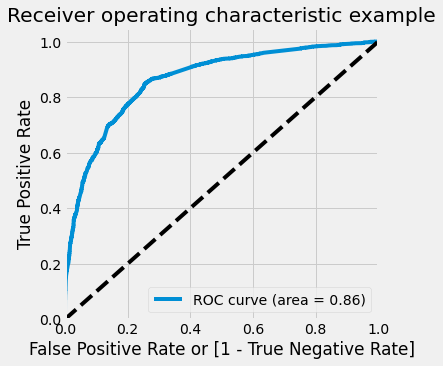

In [146]:
# Ploting the ROC Curve

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Lead_Score_Prob)

### Step 11: Finding the optimal Cutoff point

In [147]:
# Let's create columns with different probability cutoffs

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Lead_Score_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Lead_Score_Prob  Lead_Number  predicted  0.0  0.1  0.2  0.3  \
6159          0         0.061101         6159          0    1    0    0    0   
3918          1         0.607601         3918          1    1    1    1    1   
2190          0         0.089558         2190          0    1    0    0    0   
4281          1         0.849957         4281          1    1    1    1    1   
8886          1         0.417784         8886          0    1    1    1    1   

      0.4  0.5  0.6  0.7  0.8  0.9  
6159    0    0    0    0    0    0  
3918    1    1    1    0    0    0  
2190    0    0    0    0    0    0  
4281    1    1    1    1    1    0  
8886    1    0    0    0    0    0

In [148]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy   sensi     speci
0.0   0.0  0.387357  1.0000  0.000000
0.1   0.1  0.523706  0.9772  0.236975
0.2   0.2  0.749303  0.8832  0.664643
0.3   0.3  0.784320  0.8496  0.743045
0.4   0.4  0.790672  0.7672  0.805513
0.5   0.5  0.789278  0.6516  0.876328
0.6   0.6  0.781841  0.5616  0.921093
0.7   0.7  0.763403  0.4748  0.945878
0.8   0.8  0.737217  0.3716  0.968386
0.9   0.9  0.693833  0.2316  0.986090


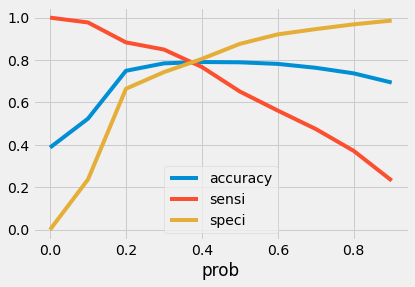

In [149]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [150]:
# From the curve above, 0.38 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_predicted'] = y_train_pred_final.Lead_Score_Prob.map( lambda x: 1 if x > 0.38 else 0)
y_train_pred_final.head()

Converted  Lead_Score_Prob  Lead_Number  predicted  0.0  0.1  0.2  0.3  \
6159          0         0.061101         6159          0    1    0    0    0   
3918          1         0.607601         3918          1    1    1    1    1   
2190          0         0.089558         2190          0    1    0    0    0   
4281          1         0.849957         4281          1    1    1    1    1   
8886          1         0.417784         8886          0    1    1    1    1   

      0.4  0.5  0.6  0.7  0.8  0.9  final_predicted  
6159    0    0    0    0    0    0                0  
3918    1    1    1    0    0    0                1  
2190    0    0    0    0    0    0                0  
4281    1    1    1    1    1    0                1  
8886    1    0    0    0    0    0                1

In [151]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7877285404400372

In [152]:
# Creating Confusion Matrix

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3125,  829],
       [ 541, 1959]], dtype=int64)

In [153]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [154]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.7836

In [155]:
# Let us calculate specificity

TN / float(TN+FP)

0.7903388973191705

In [156]:
# Calculate false postive rate - predicting churn when customer does not have churned

print(FP/ float(TN+FP))

0.20966110268082955


In [157]:
# Positive predictive value 

print (TP / float(TP+FP))

0.7026542324246772


In [158]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8524277141298418


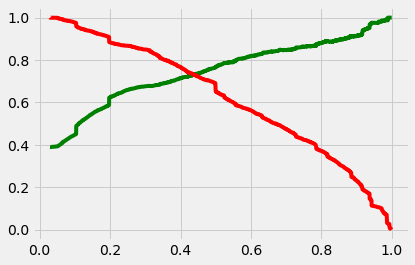

In [159]:
from sklearn.metrics import precision_recall_curve

p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Lead_Score_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Predicting on Test Data Frame

In [160]:
# Storing the features which are used on the model

X_test = X_test[col]
X_test.head()

Total Time Spent on Website  A free copy of Mastering The Interview  \
1764                          0.0                                       0   
4873                        128.0                                       1   
5052                          0.0                                       0   
4899                        246.0                                       1   
6858                        943.0                                       0   

      Lead Origin_Landing Page Submission  Lead Source_Olark Chat  \
1764                                    0                       1   
4873                                    1                       0   
5052                                    0                       1   
4899                                    1                       0   
6858                                    1                       0   

      Lead Source_Reference  Lead Source_Welingak Website  \
1764                      0                             0   
4873                      0                             0   
5052                      0                             0   
4899                      0                             0   
6858                      0                             0   

      Specialization_Hospitality Management  \
1764                                      0   
4873                                      0   
5052                                      0   
4899                                      0   
6858                                      0   

      Specialization_International Business  Specialization_Others  \
1764                                      0                      1   
4873                                      0                      0   
5052                                      0                      1   
4899                                      0                      0   
6858                                      0                      0   

      Last Notable Activity_Had a Phone Conversation  \
1764                                               0   
4873                                               0   
5052                                               0   
4899                                               0   
6858                                               0   

      Last Notable Activity_Modified  \
1764                               1   
4873                               0   
5052                               0   
4899                               0   
6858                               0   

      Last Notable Activity_Olark Chat Conversation  \
1764                                              0   
4873                                              0   
5052                                              0   
4899                                              0   
6858                                              0   

      Last Notable Activity_Page Visited on Website  \
1764                                              0   
4873                                              0   
5052                                              0   
4899                                              0   
6858                                              0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  
1764                               0                                  0  
4873                               1                                  0  
5052                               1                                  0  
4899                               0                                  0  
6858                               1                                  0

In [161]:
# Adding constant to the fit

X_test_sm = sm.add_constant(X_test)

In [162]:
# Predicting the value of y on the basis of test data Frame 

y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

1764    0.232971
4873    1.000000
5052    0.723432
4899    1.000000
6858    1.000000
1430    1.000000
2046    1.000000
4885    1.000000
7045    0.997179
7703    1.000000
dtype: float64

In [163]:
# Converting y_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

0
1764  0.232971
4873  1.000000
5052  0.723432
4899  1.000000
6858  1.000000

In [164]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [165]:
# Putting Lead Number to index

y_test_df['Lead_ID'] = y_test_df.index

In [166]:
# Removing index for both dataframes to append them side by side

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [167]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

Converted  Lead_ID         0
0          1     1764  0.232971
1          1     4873  1.000000
2          1     5052  0.723432
3          1     4899  1.000000
4          0     6858  1.000000

In [168]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})
y_pred_final.head()

Converted  Lead_ID  Converted_Prob
0          1     1764        0.232971
1          1     4873        1.000000
2          1     5052        0.723432
3          1     4899        1.000000
4          0     6858        1.000000

In [169]:
# Rearranging the columns

y_pred_final = y_pred_final.reindex(['Lead_ID','Converted','Converted_Prob'], axis=1)
y_pred_final.head()

Lead_ID  Converted  Converted_Prob
0     1764          1        0.232971
1     4873          1        1.000000
2     5052          1        0.723432
3     4899          1        1.000000
4     6858          0        1.000000

In [170]:
# We are taking the value of cut off as 0.38 as we want to invrease the value of Recall

y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.38 else 0)
y_pred_final.head()

Lead_ID  Converted  Converted_Prob  final_predicted
0     1764          1        0.232971                0
1     4873          1        1.000000                1
2     5052          1        0.723432                1
3     4899          1        1.000000                1
4     6858          0        1.000000                1

In [171]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.470354302241504

In [172]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[ 268, 1446],
       [  19, 1033]], dtype=int64)

In [173]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [174]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9819391634980988

In [175]:
# Converting the probability score(probability for conversion) to percentage which will be lead score for respected leads

y_pred_final["Lead_Score"] = y_pred_final.Converted_Prob.map( lambda x: round(x*100))

# Classifying which are hot leads
# Condition for hot leads as per Analysis: Leads having lead score more than 38 are hot leads

hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"] > 38]
hot_leads.head()

Lead_ID  Converted  Converted_Prob  final_predicted  Lead_Score
1     4873          1        1.000000                1         100
2     5052          1        0.723432                1          72
3     4899          1        1.000000                1         100
4     6858          0        1.000000                1         100
5     1430          0        1.000000                1         100

In [176]:
# Fetching only the lead ids of hot leads

hot_lead_id = hot_leads["Lead_ID"].values.reshape(-1)
print("Lead Ids of Hot leads Customers are: ")
print(hot_lead_id)

Lead Ids of Hot leads Customers are: 
[4873 5052 4899 ... 6970 5789 2861]


#### Conclusion
- Our conversion rate has come out to be 98% ,we are focusing on "Sensitivity" as it focuses on the accuracy of predicting the Positive value and our target is that only like aim at identifying the lead who have most probabilty to take courses if  ignite a bit by the sales person.
- Also our model seems to be well versed with the capturing most of the customers.

#### Recommendation
- By looking into the amount of time spent by the customer on the website and once that customer is identified send the SMS regarding the courses , also try to reach them through Welingak Website, Olark Chat.
- Connect with the customer through a call and try to explain the importance and the ROI of the course
- Try to ask your current student for the reference and for that try to lure the current student with some sort of referral bonus for getting a new customer